# Comparative Analysis of Machine Learning and Deep Learning Models in Football Player Valuation
              Author: Sandor Daniel Varsanyi
              Module: CAPB352 Business Data Analytics_Project (CNS)
              Date: 19/12/2025




```
# Ez kódként van formázva
```


# **Introduction**

This Jupyter Notebook discusses the practical part of the project named as ***Comparative Analysis of Machine Learning and Deep Learning Models in Football Player Valuation***. The objective of the notebook is to present the data preparation, explorative data analysis (EDA), and the implementation of classical machine learning and deep learning for predicting football player's transfer market value.

The main focus of the project is the comparison of  model performane based on real football statistics. Several individual and team statistics will be used to train the models (including standard, shooting, goalkeeping, passing, defensive actions, and miscallenaoeus stats). The target value is the estimated value of football player (market value).

The following models will be implemented and evaluated:

* Linear regression
* Random Forest
* XGBoost
* Multi-Layer-Perceptron (MLP)








# **Creating the final table - player_market_value_final_20-25**

From the files which can be found on github only the ***market_value*** folder contained data on transfer market values separately based on 5 different seasons. Therefore it was essential to unify the files together. Due to the fact that these files were made by myself, and I created the final structure of the files, the merging is needed only.



In [2]:
# import pandas
import pandas as pd

# define raw file urls
file_urls = [
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%201.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%202.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%203.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%204.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%205.csv"
]

dfs = [pd.read_csv(url) for url in file_urls]

In [3]:
# Merge files
combined = pd.concat(dfs, ignore_index=True)

In [4]:
# See the shape of the dataframe.
combined.shape

(102776, 5)

In [5]:
# See the head of the dataframe
combined.head()

,market_value_id,player_id,team_id,season_id,player_market_value
0,1,6,PL_BUR_21,1,1066667
1,3,4305,PL_CRY_7,1,7166667
2,8,2325,PL_LIV_12,1,2666667
3,9,2325,PL_LIV_12,1,2666667
4,10,2325,PL_LIV_12,1,2666667


In [6]:
# Create a downloadable CSV
combined.to_csv("player_market_value_final_20-25.csv", index=False)

In [7]:
# Read the merged player_market_value fiel into a dataframe
market_value_url = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/player_market_value_final_20-25.csv"

df_market_value = pd.read_csv(market_value_url)

In [8]:
# Check whether the head is the same
df_market_value. head()

,market_value_id,player_id,team_id,season_id,player_market_value
0,1,6,PL_BUR_21,1,1066667
1,3,4305,PL_CRY_7,1,7166667
2,8,2325,PL_LIV_12,1,2666667
3,9,2325,PL_LIV_12,1,2666667
4,10,2325,PL_LIV_12,1,2666667


In [9]:
# Check the shape of the dataframe
df_market_value.shape

# Note: the shape is to same, therefore we can move with creating defining the urls and create the dataframes:

(102776, 5)

## **Defining Url variables**

The url variables were defined based on tables names. In the following step the separate dataframes will be created, and a general EDA will be carried out on them.

In [10]:
# Urls of connection tables and market value tables

team_table_url_1 =   "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/Teams_table.csv"

league_table_url_2 =  "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/league_table.csv"

season_table_url_3 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/Season_table.csv"

nation_table_url_4 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/Nation_table_final.csv"

player_table_url_5 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/player_table_finalv2.csv"

market_value_url_6 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/player_market_value_final_20-25.csv"


In [11]:
# Urls of Squad Statistics tables

squad_standard_url_7 =    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_StandardStats_2020-2025.csv"

squad_goalkeeping_url_8 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_Goalkeeping_Stats_final_2020-2025.csv"

squad_misc_url_9 =        "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_Misc_Stats_final_20-25.csv"

squad_passing_url_10 =    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_PassingStats_final_20-25.csv"

squad_defensive_actions_url_11 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_DefensiveActions_Stats_final_2020-2025.csv"

squad_shooting_url_12 =   "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_ShootingStats_final_20-25.csv"

In [12]:
# Urls of Player Statistics tables

player_standard_url_13 =           "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Standard_Stats_final_20-25.csv"

player_goalkeeping_url_14 =        "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Goalkeeping_Stats_final_20-25.csv"

player_misc_url_15 =               "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Misc_Stats_final_20-25.csv"

player_passing_url_16 =            "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Passing_Stats_final_20-25.csv"

player_defensive_actions_url_17 =  "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_DefensiveActions_Stats_final_20-25.csv"

player_shooting_url_18 =           "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Shooting_stats_20-25.csv"

## **Create separate Dataframes**



In [13]:
# Creating dataframes for metadata and market value tables

df_team = pd.read_csv(team_table_url_1, sep = ';')
df_league = pd.read_csv(league_table_url_2, sep =";")
df_season = pd.read_csv(season_table_url_3 , sep =';')
df_nation = pd.read_csv(nation_table_url_4)
df_player = pd.read_csv(player_table_url_5)
df_market_value = pd.read_csv(market_value_url_6)



# Creating dataframes for squad statistics

df_squad_standard = pd.read_csv(squad_standard_url_7, sep =";")
df_squad_goalkeeping = pd.read_csv(squad_goalkeeping_url_8)
df_squad_misc = pd.read_csv(squad_misc_url_9)
df_squad_passing = pd.read_csv(squad_passing_url_10)
df_squad_defact = pd.read_csv(squad_defensive_actions_url_11)
df_squad_shooting = pd.read_csv(squad_shooting_url_12)


# Creating dataframes for player statistics

df_player_standard = pd.read_csv(player_standard_url_13)
df_player_goalkeeping = pd.read_csv(player_goalkeeping_url_14)
df_player_misc = pd.read_csv(player_misc_url_15)
df_player_passing = pd.read_csv(player_passing_url_16)
df_player_defact = pd.read_csv(player_defensive_actions_url_17)
df_player_shooting = pd.read_csv(player_shooting_url_18)

# **Small EDA and data preprocessing on separate tables**


In this section,  a general EDA will be carried out on separate tables to understand what kind of data does the tables, what is the meaning of the data and identify the errors and missing values that might contain.

Before starting the EDA process, it is important to mention that data was oragnized and cleaned in Power BI earlier to create consistent structure of tables. Moreover, the ID-s which will facilitate the merge of tables were added as well. However, there might be errors,  missing values or inconsistencies to capture.

A description of attributes will be added here as well, to understand the meaning of each attribute.


A deeper analysis will be carried out on dataframes which are containing actuals statistics including all player, squad and market value dataframes:

General checking for tables:

* df.head ()
* df.info ()
* df.describe ()
* df.isna().sum()


## **Team - df_team**

In [14]:
# See the head
df_team.head()

,team_id,team_name,league_id
0,BL_ARM_1,Arminia,BL_1
1,BL_AUG_2,Augsburg,BL_1
2,BL_BAY_3,Bayern Munich,BL_1
3,BL_BVB_4,Dortmund,BL_1
4,BL_FRA_5,Eint Frankfurt,BL_1


#### Team - Column names

The `df_team` dataframe contains three columns which can be described as the following:

* **team_id** = *This is the primary identifier of a team.*
* **team_name** = *The name of the football team.*
* **league_id** =  *This is the primary identifier of the league, where the team is playing.*



In [15]:
# See information about the df_team
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team_id    132 non-null    object
 1   team_name  132 non-null    object
 2   league_id  132 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


The dataframe contains object type values, and there is 132 values is each column, there are no missing values. Based on this missing values will not be checked.


In [16]:
df_team.describe()

,team_id,team_name,league_id
count,132,132,132
unique,132,132,5
top,BL_ARM_1,Arminia,SA_1
freq,1,1,28


It can be seen that there are 132 unique values in the team_id and team_name column and 5 in the league_id one.

## **League - df_league**

In [17]:
# See the head

df_league.head()

,league_id,league_name,league_country
0,BL_1,Bundesliga,Germany
1,LL_1,LaLiga,Spain
2,SA_1,Serie A,Italy
3,L1_1,Ligue1,France
4,PL_1,Premier League,England


### League - Column names

The `df_league` dataframe contains three columns which can be described as the following:

* **league_id** =  *This is the primary identifier of the league, where the team is playing.*
* **league_name** = *The name of the league where the football team is playing.*
* **league_country** = *This is the name of the country where the particular league is located.*



In [18]:
# See information about df_league
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   league_id       5 non-null      object
 1   league_name     5 non-null      object
 2   league_country  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


The dataframe contains object type values, and there 5 values is each column, there are no missing values. Based on this missing values will not be checked.

In [19]:
df_league.describe()

,league_id,league_name,league_country
count,5,5,5
unique,5,5,5
top,BL_1,Bundesliga,Germany
freq,1,1,1


It can be seen that there are 5 unqiue values in each columns and they appear only once in each.

## **Season - df_season**

In [20]:
#See the head

df_season.head()

,season_id,season_name,season_start,season_end
0,1,2020-2021,2020,2021
1,2,2021-2022,2021,2022
2,3,2022-2023,2022,2023
3,4,2023-2024,2023,2024
4,5,2024-2025,2024,2025


It can be seen that there is a typo here, so we will replace it.

In [21]:
# replace mistyped value
df_season["season_name"] = df_season["season_name"].replace ("2022-20223", "2022-2023")

df_season.head()

,season_id,season_name,season_start,season_end
0,1,2020-2021,2020,2021
1,2,2021-2022,2021,2022
2,3,2022-2023,2022,2023
3,4,2023-2024,2023,2024
4,5,2024-2025,2024,2025


### Season - Column names

The `df_season` dataframe contains three columns which can be described as the following:

* **season_id** = *The unique identifier of the season, used to reference a specific season.*
* **season_name** = *The name of the season (e.g."2020-2021") describing the league year.*
* **season_start** = *The official start year of the season.*
* **season_end** = *The official end year of the season.*


In [22]:
# See the info
df_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season_id     5 non-null      int64 
 1   season_name   5 non-null      object
 2   season_start  5 non-null      int64 
 3   season_end    5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


The dataframe contains object and integer type values, and there 5 values in each column, there are no missing values. Based on this missing values will not be checked.

In [23]:
df_season.describe()

,season_id,season_start,season_end
count,5.000000,5.000000,5.000000
mean,3.000000,2022.000000,2023.000000
std,1.581139,1.581139,1.581139
min,1.000000,2020.000000,2021.000000
25%,2.000000,2021.000000,2022.000000
50%,3.000000,2022.000000,2023.000000
75%,4.000000,2023.000000,2024.000000
max,5.000000,2024.000000,2025.000000


## **Nation - df_nation**

In [24]:
#See the head
df_nation.head()

,nation_id,nation_name
0,1,al ALB
1,2,am ARM
2,3,ao ANG
3,4,ar ARG
4,5,at AUT


### Nation - Column names

Only two columns are in this dataframe:

* **nation_id** = *A unique identifier referencing the player’s nationality.*
* **nation_name** = *This the name of the nation, which is a combinatipn of a two character lower case format and a 3 character long upper case format.*

In [25]:
df_nation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nation_id    128 non-null    int64 
 1   nation_name  128 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


There are no missing values and there is a combintion of integers and object types.

In [26]:
df_nation. describe()

,nation_id
count,128.000000
mean,64.500000
std,37.094474
min,1.000000
25%,32.750000
50%,64.500000
75%,96.250000
max,128.000000


# **Player Statistics tables**

## **Player - df_player**



In [27]:
# See the head of df_player
df_player.head()

,player_id,player_name,position,nation_id,born
0,1,Aaron Ciammaglichella,MF,63.0,2005.0
1,2,Aaron Connolly,FW,58.0,2000.0
2,3,Aaron Cresswell,DF,37.0,1989.0
3,4,Aarón Escandell,GK,38.0,1995.0
4,5,Aaron Hickey,DF,106.0,2002.0


### Player - Column names

5 columns can be seen in this dataframe, which can be described as:

* **player_id** = A unique identifier assigned to each player.
* **player_name** = The full name of the player.
* **position** = The player’s on-field playing role ( GK = Goalkeeper, MF = midfielder, DF = defender, FW = forward).
* **nation_id** = A unique identifier referencing the player’s nationality.
* **born** = The player’s date of birth.


There are other factors which could be identified and will be checked. It seems **`position`** is in an `object` type format and in some places contains, two characters. This need to be encoded for machine learning tasks.

On the other hand **`nation_id`** and **`born`** seems as a `float` type values. **`nation_id`** might be converted into integer, to be able to merge it correctly with nation table.



In [28]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5597 non-null   int64  
 1   player_name  5597 non-null   object 
 2   position     5596 non-null   object 
 3   nation_id    5590 non-null   float64
 4   born         5593 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 218.8+ KB


Based on the information **7635** should be in each column, however it can be seen that **`born`** table contains **7633** non-null values and ** `nation_id`** contains **7630** non null values. Moreover, as it was predicted these two columns are in `float64` type format, which needs to be converted into `integer`

#### df_player_ missing values

In [29]:
# Check out the missing values

df_player[df_player.isna().any(axis=1)]

,player_id,player_name,position,nation_id,born
2460,2461,Jeremy Ngakia,DF,NaN,2000.0
3351,3352,Mahmut Kücüksahin,MF,NaN,2004.0
4151,4152,Olabade Aluko,DF,NaN,NaN
4275,4276,Pape Daouda Diongue,"MF,FW",111.0,NaN
4424,4425,Plamedi Nsingi,MF,NaN,2000.0
4425,4426,Player,Pos,NaN,NaN
4426,4427,player_name,NaN,NaN,NaN
4932,4933,Sidnei Tavares,MF,NaN,2001.0


Due to the reason that I do not want to drop these values, I will expand them and assign `nation_id` = 5, which is AUT (Austria) to each player and `born` missing values will be filled with the means of the columns.

In [30]:
# Add missing values to the nation_id and born columns

# nation_id replaced missing value with 5

df_player["nation_id"] = df_player["nation_id"].fillna(5)

# born missing values replaced with the mean of the columns

df_player["born"] = df_player["born"].fillna(df_player["born"].mean())


#




In [31]:
# Check the columns
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5597 non-null   int64  
 1   player_name  5597 non-null   object 
 2   position     5596 non-null   object 
 3   nation_id    5597 non-null   float64
 4   born         5597 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 218.8+ KB


Now it can be seen that the missing values were replaced success

#### df_player floats to integers

In [32]:
# Convert floats to integers

df_player["nation_id"] = df_player["nation_id"].astype(int)
df_player["born"] = df_player["born"].astype(int)

df_player.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    5597 non-null   int64 
 1   player_name  5597 non-null   object
 2   position     5596 non-null   object
 3   nation_id    5597 non-null   int64 
 4   born         5597 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 218.8+ KB


In [33]:
# Checking nation_id

if df_player["nation_id"].dtype == "int64" or str(df_player["nation_id"].dtype).startswith("Int"):
  print(f"Conversion was successful. 'nation_id' is now {df_player["nation_id"].dtype}")

else:
  print ("Conversion failed")


Conversion was successful. 'nation_id' is now int64


In [34]:
# Checking born

if df_player["born"].dtype == "int64" or str(df_player["born"].dtype).startswith("Int"):
  print(f"Conversion was successful. 'born' is now {df_player["born"].dtype}")

else:
  print ("Conversion failed")


Conversion was successful. 'born' is now int64


The conversion was successul as well, the **`df_player`** contains, `int64` and `object` type values.

In [35]:
# To see the unique values in positions column
df_player['position'].unique()

array(['MF', 'FW', 'DF', 'GK', 'MF,FW', 'DF,FW', 'FW,MF', 'MF,DF',
       'DF,MF', 'FW,DF', 'Pos', nan], dtype=object)

#### df_player_encoding positions

To prepare the model for machine learning tasks position might be essential as it is suggested that an influential factor in determining player market data, Therefore it needs to be converted to integers.

Four positions is mentioned in the table:

* **GK** = Goalkeeper
* **DF** = Defender
* **MF** = Midfielder
* **FW** = Forward

When the head of the dataframe was examined, it could be seen that there were player where two position appeared as a value. This is a unique fact as these players are capable to play in multiple positions. It is supposed that this is a valuable asset of the player and an increasing factor in player market value. Therfore it needs to be decided whether to keep both positions or remove them and keep only the first one. From the task perspective it would be easier to keep only the main position, however this project aims to present the real world sceanrios, therefore keeping both positions and encode them would be essential.

However, it is decision to encode now or later, when the data will be merged. In my opinion, it will be better, if the the encoding part of this task would be in the EDA of the merged table.








### df_player_EDA

In [36]:
df_player.describe()

,player_id,nation_id,born
count,5597.000000,5597.000000,5597.000000
mean,2799.000000,50.650884,1997.129891
std,1615.859059,31.159536,5.284416
min,1.000000,1.000000,1977.000000
25%,1400.000000,30.000000,1993.000000
50%,2799.000000,40.000000,1998.000000
75%,4198.000000,63.000000,2001.000000
max,5597.000000,128.000000,2009.000000


From the description above it could be seen that player who will be examined were born between 1977 and 2009.

Also it can be seen that:

* 25% of the player were born before 1994.
* 50% = is the median value 1998.
* 75% of the players were born before 2001 one.




In [37]:
# See how on histogram how our data is distributed
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Distribution of birth year'}, xlabel='Birth year', ylabel='Frequency'>

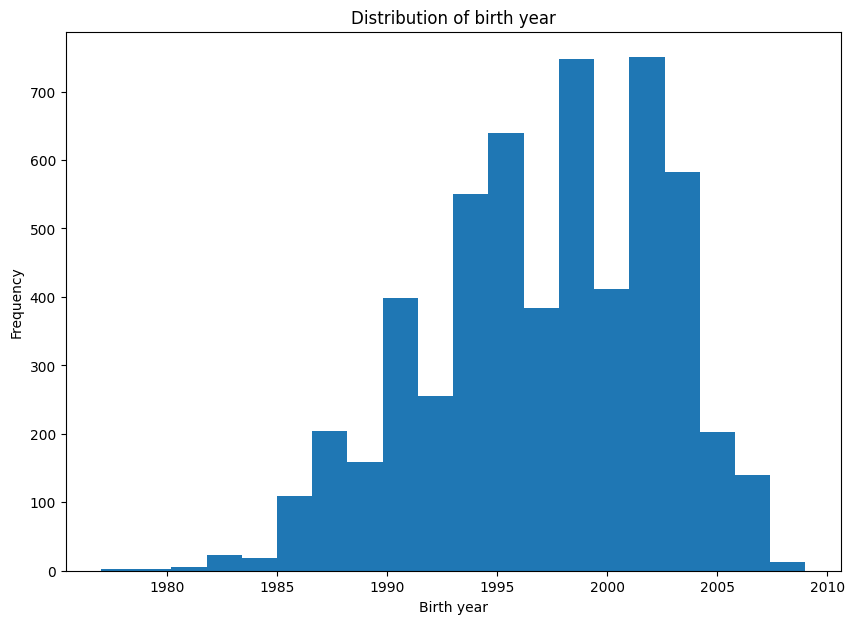

In [38]:
# create the histogram

df_player['born'].plot(kind='hist', bins=20, figsize=(10,7), title='Distribution of birth year', xlabel='Birth year', ylabel='Frequency')

#

<Axes: >

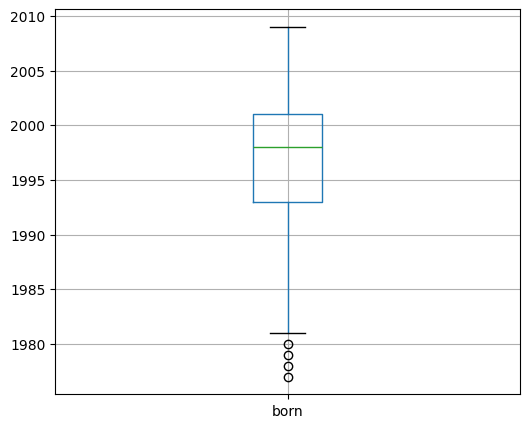

In [39]:
df_player.boxplot(column='born', figsize=(6,5))

From the grahs above, but especially from the boxplotit can be seen that, half of the players were born around 1997-1998.

The Quartiles are between 1994 (Q1) and 2001 (Q3)  which means that 50% of the player were born between this period.

The whiskers shows at the top that the youngest players in the dataset were born around 2009. At the bottom those players can be seen who were born before 1985.

## **Market Value - df_market_value**

In [40]:
df_market_value.head()

,market_value_id,player_id,team_id,season_id,player_market_value
0,1,6,PL_BUR_21,1,1066667
1,3,4305,PL_CRY_7,1,7166667
2,8,2325,PL_LIV_12,1,2666667
3,9,2325,PL_LIV_12,1,2666667
4,10,2325,PL_LIV_12,1,2666667


### Market Value - Column names

The market value dataframe contains 5 columns. Due to the reason that player_id , team_id and season_id were already defined, we will not mention them again. The other two columns are:

* **`market_value_id`**: A unique identifier assigned to each player market value record, allowing it to be referenced unambiguously.

* **`player_market_value`**: The estimated monetary worth of a player at a given time.




In [41]:
# See the head
df_market_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102776 entries, 0 to 102775
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   market_value_id      102776 non-null  int64 
 1   player_id            102776 non-null  int64 
 2   team_id              102776 non-null  object
 3   season_id            102776 non-null  int64 
 4   player_market_value  102776 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.9+ MB


From the df.info() it can be declared that there are 102776 values in each column and the columns containing no missing values.

In [42]:
#Describe the dataframe
df_market_value.describe()

,market_value_id,player_id,season_id,player_market_value
count,102776.00000,102776.000000,102776.000000,1.027760e+05
mean,51388.50000,2776.714505,3.015072,1.016619e+07
std,29669.01997,1591.346060,1.400232,1.627642e+07
min,1.00000,1.000000,1.000000,0.000000e+00
25%,25694.75000,1389.000000,2.000000,1.200000e+06
50%,51388.50000,2748.000000,3.000000,4.000000e+06
75%,77082.25000,4179.000000,4.000000,1.200000e+07
max,102776.00000,5597.000000,5.000000,2.000000e+08


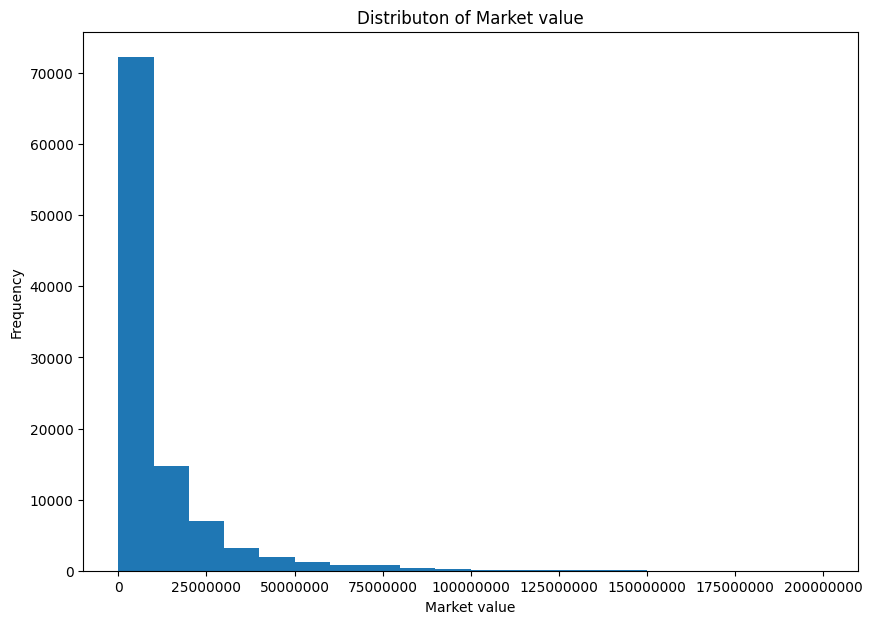

In [43]:
df_market_value['player_market_value'].plot (kind='hist', bins=20, figsize=(10,7), title='Distributon of Market value', xlabel='Market value', ylabel='Frequency')
plt.ticklabel_format(style='plain', axis='x')

### Market value - distribution

The histogram illsutrates the distribution of player market values in the dataset. The data show a strong right-skewed distribution. The vast majority of player have relatively low market values concentrated between 0 - 25 million euros. This dense cluster reflects that most professional football players have modest market valuation compared to elite players.

Morever as the market value increases the Frequency drops sharply meaning that high-value player (above 50 millio euro and especially 100 million euros) represent a very small proportion of the datasat. The long tail extends towards 200 million, but in this area only few players can be found.

Because this is only the table values, and a bigger EDA will be carried out on the merged Master table, some players might won't be included, due to the fact that they might not be in the dataset, however it is expected that this distribution of the market value data will be remained on the merged dataset too.

## **Player Standard Stats - df_player_standard**

In [44]:
# See the head

df_player_standard.head()

,player_standard_stats_id,player_id,team_id,league_id,season_id,nation_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,player_playtime_Starts,...,player_perform_PK,player_perfrom_PKatt,player_per90min_Gls,player_per90min_Ast,player_per90min_G-PK,player_per90min_G+A,player_per90min_G+A-PK,player_progression_PrgC,player_progression_PrgP,player__perform_G-PK
0,1,2204,L1_STR_20,L1_1,1,41.0,0.12,11,2,0,...,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0
1,2,4305,PL_CRY_7,PL_1,1,91.0,19.74,1777,22,20,...,0,0,0.00,0.05,0.00,0.05,0.05,38,103,0
2,3,5565,L1_REI_17,L1_1,1,75.0,32.10,2889,33,33,...,0,0,0.09,0.00,0.09,0.09,0.09,18,99,3
3,4,4726,LL_GET_10,LL_1,1,46.0,0.67,60,3,0,...,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0
4,5,3744,L1_NAN_13,L1_1,1,33.0,1.47,132,18,15,...,0,0,0.00,0.00,0.00,0.00,0.00,32,65,0


In [45]:
df_player_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14339 entries, 0 to 14338
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_standard_stats_id   14339 non-null  int64  
 1   player_id                  14339 non-null  int64  
 2   team_id                    14339 non-null  object 
 3   league_id                  14339 non-null  object 
 4   season_id                  14339 non-null  int64  
 5   nation_id                  14334 non-null  float64
 6   player_playtime_90s_new    14339 non-null  float64
 7   player_playtime_Min        14339 non-null  int64  
 8   player_playtime_MP         14339 non-null  int64  
 9   player_playtime_Starts     14339 non-null  int64  
 10  player_perform_Gls         14339 non-null  int64  
 11  Sum of player_perform_Ast  14339 non-null  int64  
 12  player_perform_G+A         14339 non-null  int64  
 13  player_perform_CrdY        14339 non-null  int

In [46]:
df_player_standard.shape

(14339, 25)

### Player Standard Stats - Column names


By calling the shape function, it can be seen that 25 columns are in the dataframe and 14339 rows. And there are various types of data in thsi dataset, due to the fact that some of the values are calculated values, which indicates their data type.

The dataframe involves 5 already mentioned columns e.g. `player_id` ,` team_id`, `season_id` , `league_id`, `nation_id`, which were previously defined.

The following attributes are in this dataframe:

* **`player_standard_stats_id`**: ID which idnetitifes one players standard stats in a particluar season in a particular team.

* **`player_playtime_MP `**: Number of matches in which the player made at least one appearance (Matches Played).

* **`player_playtime_Starts`**: Number of matches the player started in the starting eleven.

* **`player_playtime_Min `**: Total minutes played by the player across all appearances.

* **`player_playtime_90s_new`**: Total minutes played divided by 90; an estimate of how many full 90-minute matches the player effectively played.

* **`player_perform_Gls `**: Total number of non-penalty and penalty goals scored (Goals).

* **`Sum of player_perform_Ast `**: Total number of assists provided by the player.

* **`player_perform_G+A `**: Combined total of goals and assists (Goals + Assists).

* **`player_perform_G-PK`**: Non-penalty goals scored (Goals minus Penalty Goals).

* **`player_perform_PK `**: Penalty goals scored by the player.

* **`player_perform_PKatt `**: Total number of penalty attempts (both scored and missed).

* **`player_perform_CrdY `**: Total number of yellow cards received.

* **`player_perform_CrdR `**: Total number of red cards received.

* **`player_progression_PrgC `**: Progressive carries: the number of times the player carried the ball forward at least 5 meters in the attacking direction, excluding defensive third carries.

* **`player_progression_PrgP`**: Progressive passes: completed passes that move the ball significantly forward toward the opponent’s goal.

* **`player_per90min_Gls`**: Goals scored per 90 minutes of play.

* **`player_perform_per90min_Ast`**: Assists per 90 minutes of play.

* **`player_per90min_G+A `**: Combined goals and assists per 90 minutes.

* **`player_per90min_G-PK`**: Non-penalty goals per 90 minutes.

* **`player_per90min_G+A-PK`**: Non-penalty goals plus assists per 90 minutes.







In [47]:
# Explore the features of this df
df_player_standard.describe()

,player_standard_stats_id,player_id,season_id,nation_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,player_playtime_Starts,player_perform_Gls,Sum of player_perform_Ast,...,player_perform_PK,player_perfrom_PKatt,player_per90min_Gls,player_per90min_Ast,player_per90min_G-PK,player_per90min_G+A,player_per90min_G+A-PK,player_progression_PrgC,player_progression_PrgP,player__perform_G-PK
count,14339.00000,14339.000000,14339.000000,14334.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.00000,14339.000000,...,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000
mean,7170.00000,2804.287259,2.999582,50.399400,11.949517,1075.457633,19.096659,13.780877,1.71051,2.165632,...,0.161239,0.202943,0.234714,0.193414,0.219609,0.428118,0.413016,21.467676,47.030476,1.549271
std,4139.45709,1606.458752,1.409323,31.091803,10.478347,943.051484,11.617822,11.394979,3.21802,4.172020,...,0.736397,0.857932,2.247965,2.652911,2.223092,4.514716,4.495506,26.852955,51.853476,2.821761
min,1.00000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3585.50000,1420.000000,2.000000,30.000000,2.390000,215.000000,8.000000,3.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000
50%,7170.00000,2798.000000,3.000000,38.000000,9.280000,835.000000,20.000000,12.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.090000,12.000000,30.000000,0.000000
75%,10754.50000,4189.000000,4.000000,63.000000,20.290000,1826.000000,30.000000,23.000000,2.00000,2.000000,...,0.000000,0.000000,0.170000,0.130000,0.160000,0.330000,0.310000,31.000000,73.000000,2.000000
max,14339.00000,5597.000000,5.000000,128.000000,37.990000,3419.000000,38.000000,38.000000,41.00000,57.000000,...,11.000000,13.000000,200.000000,200.000000,200.000000,400.000000,400.000000,225.000000,392.000000,33.000000


The descriptive statistics indicates that most variables follow a heavily right-skewed distribtuion. Playin time metrics (minutes, matches played, starts) show that the majority of player get limited playing opportunities, while the elite appear in almost very match. Goal scoring data indicates confirms the fact that in football relatively small amount of goals are scored for example compared to handball. The median numbe rof goals is zero, while few player can achieve a high number of goals.

The Histogram below demonstrates that as well.

<Axes: title={'center': 'Distribution of Goals scored among players between 2020-2025'}, xlabel='Goals scored', ylabel='Frequency'>

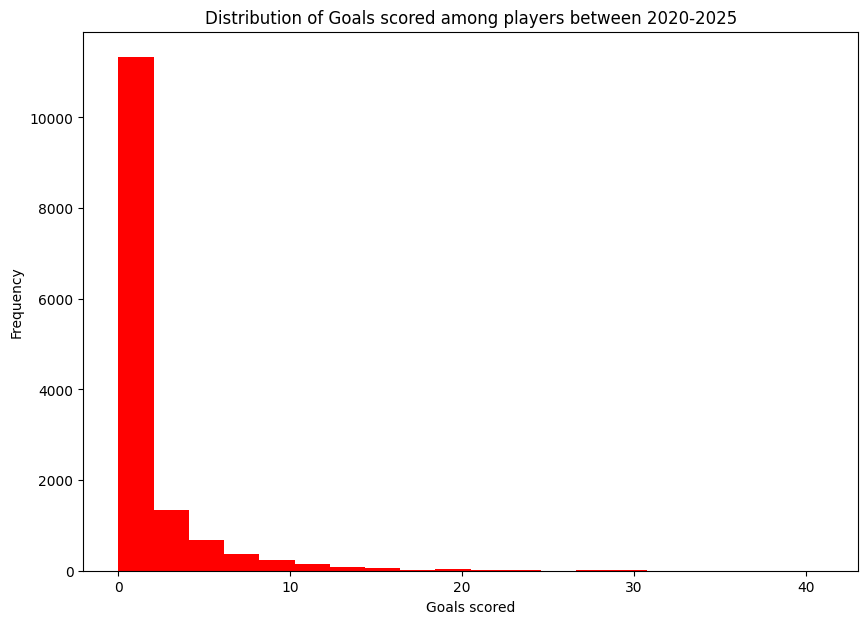

In [48]:
df_player_standard['player_perform_Gls'].plot(kind='hist', bins=20, figsize=(10,7), title='Distribution of Goals scored among players between 2020-2025', ylabel='Frequency', xlabel='Goals scored', color = 'red')

## **Player Goalkeeping Stats - df_player_goalkeeping**

In [49]:
df_player_goalkeeping.head()

,player_goalkeeping_stats_id,player_id,team_id,league_id,season_id,player_performGK_CS,player_performGK_CS%,player_performGK_GA,player_performGK_GA90_new,player_performGK_Save%_new,player_performGK_SoTA,player_performGK_Saves,player_penaltyGK_PKA,player_penaltyGK_PKatt,player_penaltyGK_PKm,player_penaltyGK_PKsv,player_penaltyGK_Save%_new
0,1,92,LL_BET_5,LL_1,5,3,0.157895,27.0,14.210526,0.355263,76.0,49.0,1,1,0.0,0.0,0.000000
1,2,1764,LL_BET_5,LL_1,5,0,0.000000,5.0,1.250000,0.454545,11.0,6.0,0,0,0.0,0.0,NaN
2,3,10,PL_SOU_17,PL_1,5,3,0.100000,66.0,220.000000,0.361702,188.0,120.0,5,7,0.0,2.0,0.285714
3,4,241,PL_SOU_17,PL_1,5,0,0.000000,13.0,2.600000,0.351351,37.0,24.0,2,2,0.0,0.0,0.000000
4,5,2537,PL_SOU_17,PL_1,5,0,0.000000,7.0,2.333333,0.350000,20.0,13.0,0,0,0.0,0.0,NaN


In [50]:
df_player_goalkeeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_goalkeeping_stats_id  1061 non-null   int64  
 1   player_id                    1061 non-null   int64  
 2   team_id                      1061 non-null   object 
 3   league_id                    1061 non-null   object 
 4   season_id                    1061 non-null   int64  
 5   player_performGK_CS          1061 non-null   int64  
 6   player_performGK_CS%         1061 non-null   float64
 7   player_performGK_GA          1059 non-null   float64
 8   player_performGK_GA90_new    1059 non-null   float64
 9   player_performGK_Save%_new   1041 non-null   float64
 10  player_performGK_SoTA        1060 non-null   float64
 11  player_performGK_Saves       1060 non-null   float64
 12  player_penaltyGK_PKA         1061 non-null   int64  
 13  player_penaltyGK_P

In [51]:
df_player_goalkeeping.shape

(1061, 17)

### Player Goalkeeping Stats - Column names

In [52]:
df_player_goalkeeping.columns

Index(['player_goalkeeping_stats_id', 'player_id', 'team_id', 'league_id',
       'season_id', 'player_performGK_CS', 'player_performGK_CS%',
       'player_performGK_GA', 'player_performGK_GA90_new',
       'player_performGK_Save%_new', 'player_performGK_SoTA',
       'player_performGK_Saves', 'player_penaltyGK_PKA',
       'player_penaltyGK_PKatt', 'player_penaltyGK_PKm',
       'player_penaltyGK_PKsv', 'player_penaltyGK_Save%_new'],
      dtype='object')

This dataframe contains 17 columns with 1061 records, per each column. The dataframe contains the follwing attributes which are mentioned below. The already mentioned Id-s will not be mentioned again (player_id, team_id, season_id, league_id). In terms of data types, despite the ID-s everything is in `int64 `or `float64` type, therefor it is not necessary to change these.

* **player_goalkeeping_stats_id**: A unique identifier for each player’s goalkeeping statistics record for a given season.
* **player_performGK_CS**: Clean sheets: the number of matches in which the goalkeeper conceded zero goals.
* **player_performGK_CS%**: Clean sheet percentage: the proportion of matches played in which the goalkeeper kept a clean sheet.
* **player_performGK_GA**: Goals against: the total number of goals conceded by the goalkeeper while on the pitch.
* **player_performGK_GA90_new**: Goals conceded per 90 minutes: the average number of goals allowed per full match equivalent (Goals Against divided by 90s played).
* **player_performGK_Save%_new**: Save percentage: the proportion of shots on target faced that were successfully saved by the goalkeeper.
* **player_performGK_SoTA**: Shots on target against: the total number of shots on target faced by the goalkeeper.
* **player_performGK_Saves**: Total number of saves made by the goalkeeper.
* **player_penaltyGK_PKA**: Penalty kicks against: the total number of penalty kicks faced by the goalkeeper.
* **player_penaltyGK_PKatt**: Penalty kick attempts against: the number of penalty kicks taken against the goalkeeper, including goals and saves.
* **player_penaltyGK_PKm**: Penalty kicks missed by the opponent while the goalkeeper was on the field (penalties not resulting in a goal).
* **player_penaltyGK_PKsv**: Penalty kicks saved by the goalkeeper.
* **player_penaltyGK_Save%_new**: Penalty save percentage: the proportion of penalty kicks faced that were saved by the goalkeeper.

In [53]:
df_player_goalkeeping.describe()

,player_goalkeeping_stats_id,player_id,season_id,player_performGK_CS,player_performGK_CS%,player_performGK_GA,player_performGK_GA90_new,player_performGK_Save%_new,player_performGK_SoTA,player_performGK_Saves,player_penaltyGK_PKA,player_penaltyGK_PKatt,player_penaltyGK_PKm,player_penaltyGK_PKsv,player_penaltyGK_Save%_new
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1059.000000,1059.000000,1041.000000,1060.000000,1060.000000,1061.000000,1061.000000,1059.000000,1059.000000,738.000000
mean,531.000000,2757.605090,2.989632,4.398680,0.226679,24.157696,8.297127,0.345642,73.032075,49.211321,2.194156,2.763431,0.153919,0.416431,0.141844
std,306.428621,1648.729126,1.411839,4.580347,0.213795,20.084666,18.854512,0.148142,60.928966,41.947274,2.356845,2.845987,0.423675,0.746355,0.209880
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,266.000000,1330.000000,2.000000,0.000000,0.000000,5.000000,1.309567,0.280000,14.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,531.000000,2751.000000,3.000000,3.000000,0.210526,21.000000,2.250000,0.333333,62.000000,40.500000,2.000000,2.000000,0.000000,0.000000,0.000000
75%,796.000000,4313.000000,4.000000,8.000000,0.333333,40.000000,12.576037,0.390805,127.250000,86.000000,4.000000,4.000000,0.000000,1.000000,0.250000
max,1061.000000,5593.000000,5.000000,26.000000,1.000000,91.000000,226.666667,1.000000,234.000000,162.000000,13.000000,15.000000,3.000000,4.000000,1.000000


<Axes: title={'center': 'Distribution of Clean sheets'}, xlabel='Number of cleansheets', ylabel='Frequency'>

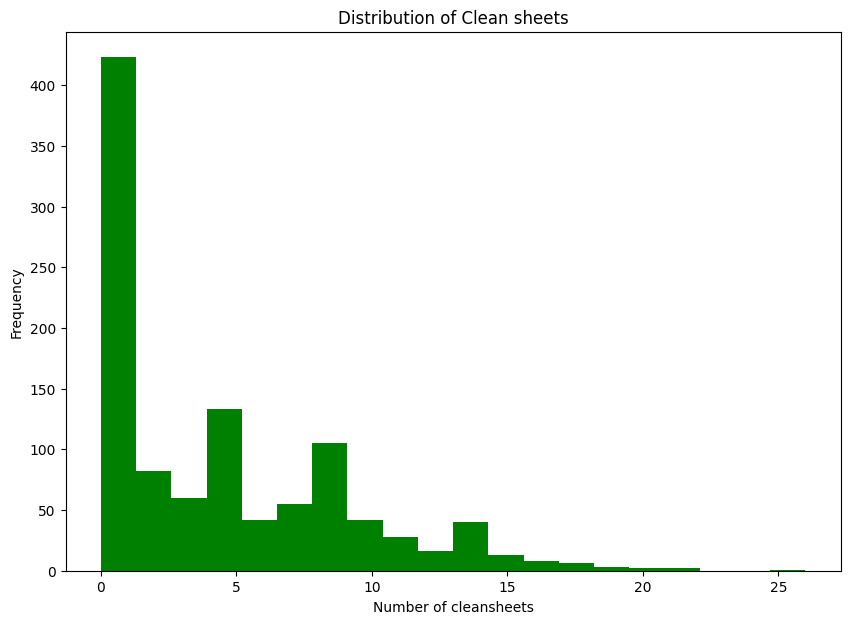

In [54]:
df_player_goalkeeping['player_performGK_CS'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Clean sheets', color = 'green', xlabel= "Number of cleansheets", ylabel= "Frequency")

The descriptive statistics of goalkeeping varibales indicate that these features could be only interpeted to goalkeepers. There is a large number of zero values, which are not reflecting data quality issues. Several goalkeeping statistics exhibiti extreme outliers, especially in Shot on Target  and goals conceded, which is mainly driven by differences in playing time. Moreover, percentage based statistics can be higher in cases where the goalkeeper played less than its counterparts. Overall, goalkeepign statistics might need special filtering and normalization before any predictive modelling techniques applied.

### df_player_goalkeeping_missing values





It could be seen that there are several missing values in this dataframe. We will reveal them.

In [55]:
df_player_goalkeeping[df_player_goalkeeping.isna().any(axis=1)]

,player_goalkeeping_stats_id,player_id,team_id,league_id,season_id,player_performGK_CS,player_performGK_CS%,player_performGK_GA,player_performGK_GA90_new,player_performGK_Save%_new,player_performGK_SoTA,player_performGK_Saves,player_penaltyGK_PKA,player_penaltyGK_PKatt,player_penaltyGK_PKm,player_penaltyGK_PKsv,player_penaltyGK_Save%_new
1,2,1764,LL_BET_5,LL_1,5,0,0.00,5.0,1.250000,0.454545,11.0,6.0,0,0,0.0,0.0,NaN
4,5,2537,PL_SOU_17,PL_1,5,0,0.00,7.0,2.333333,0.350000,20.0,13.0,0,0,0.0,0.0,NaN
6,7,137,LL_OSA_14,LL_1,5,1,1.00,0.0,0.000000,0.000000,5.0,5.0,0,0,0.0,0.0,NaN
7,8,1148,BL_BAY_3,BL_1,5,0,0.00,5.0,1.666667,0.714286,7.0,2.0,0,0,0.0,0.0,NaN
8,9,2603,BL_BAY_3,BL_1,5,2,0.25,12.0,1.500000,0.428571,28.0,16.0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1047,5225,BL_AUG_2,BL_1,4,0,0.00,8.0,2.666667,0.320000,25.0,17.0,0,0,0.0,0.0,NaN
1047,1048,5243,SA_FIR_6,SA_1,4,0,0.00,2.0,2.000000,0.666667,3.0,1.0,0,0,0.0,0.0,NaN
1052,1053,5371,SA_SAL_22,SA_1,4,0,0.00,8.0,2.000000,0.307692,26.0,18.0,0,0,0.0,0.0,NaN
1053,1054,5384,L1_LIL_6,L1_1,4,0,0.00,2.0,1.980198,0.400000,5.0,3.0,0,0,0.0,0.0,NaN


There are a high number of missing values, in the especially in the **`player_penaltyGK_Save%_new`** column which might be converted to zero as these keepers, either not saved any penalties or they did not have chance to do that because of playing time. It will be replaced when the master dataset will be merged and other variables which might influence this decision can be seen.

## **Miscellaneous - df_player_misc**

In [56]:
df_player_misc.head()

,player_Misc_stats_id,player_id,team_id,league_id,season_id,player_Misc_perform_2CrdY,player_Misc_perform_CrdR,player_Misc_perform_CrdY,player_Misc_perform_Crs,player_Misc_perform_Fld,...,player_Misc_perform_Fls,player_Misc_perform_Off,player_Misc_perform_OG,player_Misc_perform_PKcon,player_Misc_perform_PKwon,player_Misc_perform_Recov,player_Misc_perform_TklW,player_Misc_aeriald_won%_new,player_Misc_aeriald_Won,player_Misc_aeriald_Lost
0,1,2204,L1_STR_20,L1_1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,NaN,0,0
1,2,4305,PL_CRY_7,PL_1,1,0,0,2,40,3,...,11,3,0,0,0,136,22,0.46,11,13
2,3,2,PL_BRI_5,PL_1,1,0,0,0,2,16,...,6,8,0,0,1,12,3,0.18,7,31
3,4,2,PL_BRI_5,PL_1,1,0,0,0,2,16,...,6,8,0,0,1,12,3,0.18,7,31
4,5,2,PL_BRI_5,PL_1,2,0,0,0,0,6,...,0,0,0,0,0,7,0,0.29,2,5


In [57]:
df_player_misc.shape

(22461, 21)

In [58]:
df_player_misc.columns

Index(['player_Misc_stats_id', 'player_id', 'team_id', 'league_id',
       'season_id', 'player_Misc_perform_2CrdY', 'player_Misc_perform_CrdR',
       'player_Misc_perform_CrdY', 'player_Misc_perform_Crs',
       'player_Misc_perform_Fld', 'player_Misc_perform_Int',
       'player_Misc_perform_Fls', 'player_Misc_perform_Off',
       'player_Misc_perform_OG', 'player_Misc_perform_PKcon',
       'player_Misc_perform_PKwon', 'player_Misc_perform_Recov',
       'player_Misc_perform_TklW', 'player_Misc_aeriald_won%_new',
       'player_Misc_aeriald_Won', 'player_Misc_aeriald_Lost'],
      dtype='object')

In [59]:
df_player_misc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22461 entries, 0 to 22460
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   player_Misc_stats_id          22461 non-null  int64  
 1   player_id                     22461 non-null  int64  
 2   team_id                       22461 non-null  object 
 3   league_id                     22461 non-null  object 
 4   season_id                     22461 non-null  int64  
 5   player_Misc_perform_2CrdY     22461 non-null  int64  
 6   player_Misc_perform_CrdR      22461 non-null  int64  
 7   player_Misc_perform_CrdY      22461 non-null  int64  
 8   player_Misc_perform_Crs       22461 non-null  int64  
 9   player_Misc_perform_Fld       22461 non-null  int64  
 10  player_Misc_perform_Int       22461 non-null  int64  
 11  player_Misc_perform_Fls       22461 non-null  int64  
 12  player_Misc_perform_Off       22461 non-null  int64  
 13  p

### Misc Stats - Column names

The df_player_misc dataframe 21 columns with 22461 records in each columns. There various datatypesin this dataframe, most of it are int64 types and only a small portion is flot64 and object types.

As just in the previous sections the already mentioned columns will not be defined again. The columns which are in this dataframe are the following:

* **`player_Misc_stats_id`**: A unique identifier for each player’s miscellaneous statistics record for a given season.
* **`player_Misc_perform_2CrdY`**: Second yellow cards: the number of times a player received a second yellow card in a match, resulting in a red card.
* **`player_Misc_perform_CrdR`**: Red cards: the total number of red cards received by the player.
* **`player_Misc_perform_CrdY`**: Yellow cards: the total number of yellow cards received by the player.
* **`player_Misc_perform_Crs`**: Crosses: the total number of crosses attempted by the player.
* **`player_Misc_perform_Fld`**: Fouls drawn: the number of fouls committed against the player by opponents.
* **`player_Misc_perform_Int`**: Interceptions: the number of times the player intercepted an opponent’s pass.
* **`player_Misc_perform_Fls`**: Fouls committed: the total number of fouls committed by the player.
* **`player_Misc_perform_Off`**: Offsides: the number of times the player was caught offside.
* **`player_Misc_perform_OG `**: Own goals: the number of goals scored by the player into their own net.
* **`player_Misc_perform_PKcon`**: Penalties conceded: the number of penalty kicks conceded by the player.
* **`player_Misc_perform_PKwon`**: Penalties won: the number of penalty kicks awarded to the player’s team as a result of fouls committed against the player.
* **`player_Misc_perform_Recov`**: Ball recoveries: the number of times the player recovered possession of the ball.
* **`player_Misc_perform_TklW`**: Tackles won: the number of successful tackles made by the player.
* **`player_Misc_aeriald_won%_new`**: Aerial duel win percentage: the proportion of aerial duels won by the player.
* **`player_Misc_aeriald_Won`**: Aerial duels won: the total number of aerial duels successfully won by the player.
* **`player_Misc_aeriald_Lost`**: Aerial duels lost: the total number of aerial duels lost by the player.




In [60]:
df_player_misc.describe()

,player_Misc_stats_id,player_id,season_id,player_Misc_perform_2CrdY,player_Misc_perform_CrdR,player_Misc_perform_CrdY,player_Misc_perform_Crs,player_Misc_perform_Fld,player_Misc_perform_Int,player_Misc_perform_Fls,player_Misc_perform_Off,player_Misc_perform_OG,player_Misc_perform_PKcon,player_Misc_perform_PKwon,player_Misc_perform_Recov,player_Misc_perform_TklW,player_Misc_aeriald_won%_new,player_Misc_aeriald_Won,player_Misc_aeriald_Lost
count,22461.000000,22461.000000,22461.00000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.00000,22461.000000,20874.000000,22461.000000,22461.000000
mean,11231.000000,2786.452162,2.99488,0.048306,0.116023,2.537732,26.055162,15.387872,11.194292,15.407818,2.487556,0.044076,0.179689,0.170206,62.75384,12.100218,0.453693,16.671653,17.971818
std,6484.076534,1596.184539,1.39600,0.222368,0.355070,2.636862,40.285540,16.030265,13.097797,14.087455,4.341868,0.217895,0.464442,0.487616,56.73374,12.215309,0.219894,21.561112,19.753085
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5616.000000,1423.000000,2.00000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,14.00000,2.000000,0.330000,3.000000,3.000000
50%,11231.000000,2762.000000,3.00000,0.000000,0.000000,2.000000,9.000000,11.000000,6.000000,12.000000,1.000000,0.000000,0.000000,0.000000,49.00000,9.000000,0.450000,9.000000,13.000000
75%,16846.000000,4169.000000,4.00000,0.000000,0.000000,4.000000,34.000000,23.000000,17.000000,24.000000,3.000000,0.000000,0.000000,0.000000,98.00000,19.000000,0.570000,23.000000,26.000000
max,22461.000000,5597.000000,5.00000,2.000000,3.000000,17.000000,393.000000,135.000000,112.000000,95.000000,57.000000,3.000000,4.000000,6.000000,336.00000,84.000000,1.000000,281.000000,203.000000


As this is a dataframe which contains mixed stats, it can happen that some of the statistics were already created in other dataframes, for example, the number of `CrdY` pr `CrdR ` has been already included in standard stats table, which suggest that these columns might be eliminated, however I would leave them or now, to discover all other dataframes as other feature could appear in other columns as well.




<Axes: title={'center': 'Distribution of Ball Recoveries'}, ylabel='Frequency'>

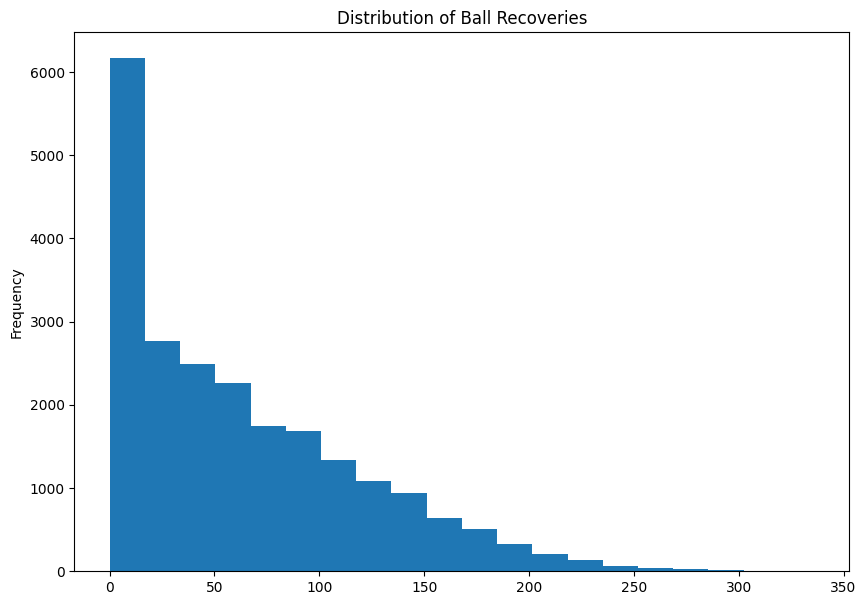

In [61]:
df_player_misc['player_Misc_perform_Recov'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Ball Recoveries')

<Axes: title={'center': 'Distribution of Aerial duels won'}, ylabel='Frequency'>

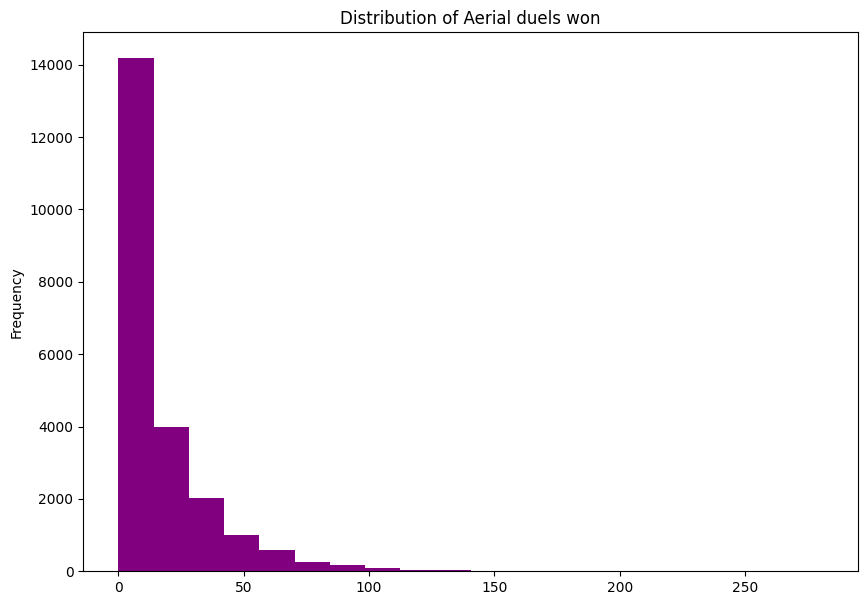

In [62]:
df_player_misc['player_Misc_aeriald_Won'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Aerial duels won', color = 'purple')

The descriptive statistics show that the data in case of many attributes is rightly skewed, there are lot of zero values, which can be explained by the limited playtime,  the psoition in which the player plays. The outliers suggest the elite players in certain statistical feautres.

### df_player_misc - missing values

In [63]:
df_player_misc[df_player_misc.isna().any(axis=1)]

,player_Misc_stats_id,player_id,team_id,league_id,season_id,player_Misc_perform_2CrdY,player_Misc_perform_CrdR,player_Misc_perform_CrdY,player_Misc_perform_Crs,player_Misc_perform_Fld,...,player_Misc_perform_Fls,player_Misc_perform_Off,player_Misc_perform_OG,player_Misc_perform_PKcon,player_Misc_perform_PKwon,player_Misc_perform_Recov,player_Misc_perform_TklW,player_Misc_aeriald_won%_new,player_Misc_aeriald_Won,player_Misc_aeriald_Lost
0,1,2204,L1_STR_20,L1_1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,NaN,0,0
32,33,16,BL_MAI_13,BL_1,1,0,0,0,0,0,...,1,0,0,0,0,2,0,NaN,0,0
48,49,4,LL_GRA_11,LL_1,2,0,1,1,0,1,...,0,0,0,0,0,4,0,NaN,0,0
51,52,925,L1_SAI_19,L1_1,2,0,0,0,1,0,...,1,0,0,0,0,1,0,NaN,0,0
52,53,925,L1_SAI_19,L1_1,2,0,0,0,1,0,...,1,0,0,0,0,1,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22252,22253,4142,PL_NOT_16,PL_1,4,0,0,0,0,1,...,0,0,0,0,0,4,0,NaN,0,0
22280,22281,3137,PL_EVE_8,PL_1,4,0,0,0,0,0,...,0,0,0,0,0,1,0,NaN,0,0
22281,22282,1264,PL_CHE_6,PL_1,4,0,0,0,0,0,...,0,0,0,0,0,0,1,NaN,0,0
22313,22314,1573,PL_MUN_14,PL_1,4,0,0,0,0,0,...,3,0,0,0,0,1,1,NaN,0,0


There are a high number of null values in the `arieal_duels_won%`. It is predicted that these numbers belongs to goalkeepers as they tend to particpate much less in aerial duels than the outfiled players. It would not be wise to to decide the method about this column currently, therefore it will be reexamine dagain in the merged dataset.



## **Defensive Actions - df_player_defact**



In [64]:
# See the head
df_player_defact.head()

,player_defactions_stats_id,player_id,team_id,league_id,season_id,player_Tackles,player_Tackles_Att 3rd,player_Tackles_Def 3rd,player_Tackles_Mid 3rd,player_Tackles_TklW,...,player_Cha_Att,player_Cha_Tkl%_new,player_Cha_Lost,player_Blocks,player_Blocks_Clr,player_Blocks_Err,player_Blocks_Int,player_Blocks_Pass,player_Blocks_Sh,player_Blocks_Tkl+Int
0,1,2.0,PL_BRI_5,PL_1,1,6.0,2.0,1.0,3.0,3.0,...,2.0,0.000000,2.0,4.0,2.0,0.0,0.0,4.0,0.0,6.0
1,2,2.0,PL_BRI_5,PL_1,1,6.0,2.0,1.0,3.0,3.0,...,2.0,0.000000,2.0,4.0,2.0,0.0,0.0,4.0,0.0,6.0
2,3,67.0,PL_BRI_5,PL_1,1,28.0,4.0,11.0,13.0,13.0,...,39.0,0.205128,31.0,18.0,13.0,0.0,15.0,15.0,3.0,43.0
3,4,67.0,PL_BRI_5,PL_1,1,28.0,4.0,11.0,13.0,13.0,...,39.0,0.205128,31.0,18.0,13.0,0.0,15.0,15.0,3.0,43.0
4,5,74.0,PL_BRI_5,PL_1,1,29.0,4.0,15.0,10.0,16.0,...,25.0,0.480000,13.0,29.0,92.0,3.0,47.0,13.0,16.0,76.0


In [65]:
df_player_defact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22531 entries, 0 to 22530
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_defactions_stats_id  22531 non-null  int64  
 1   player_id                   22461 non-null  float64
 2   team_id                     22461 non-null  object 
 3   league_id                   22461 non-null  object 
 4   season_id                   22531 non-null  int64  
 5   player_Tackles              22461 non-null  float64
 6   player_Tackles_Att 3rd      22461 non-null  float64
 7   player_Tackles_Def 3rd      22461 non-null  float64
 8   player_Tackles_Mid 3rd      22461 non-null  float64
 9   player_Tackles_TklW         22461 non-null  float64
 10  player_Cha_Tkl_             22461 non-null  float64
 11  player_Cha_Att              22461 non-null  float64
 12  player_Cha_Tkl%_new         20096 non-null  float64
 13  player_Cha_Lost             224

In [66]:
df_player_defact.shape

(22531, 21)

In [67]:
df_player_defact.columns

Index(['player_defactions_stats_id', 'player_id', 'team_id', 'league_id',
       'season_id', 'player_Tackles', 'player_Tackles_Att 3rd',
       'player_Tackles_Def 3rd', 'player_Tackles_Mid 3rd',
       'player_Tackles_TklW', 'player_Cha_Tkl_', 'player_Cha_Att',
       'player_Cha_Tkl%_new', 'player_Cha_Lost', 'player_Blocks',
       'player_Blocks_Clr', 'player_Blocks_Err', 'player_Blocks_Int',
       'player_Blocks_Pass', 'player_Blocks_Sh', 'player_Blocks_Tkl+Int'],
      dtype='object')

### Defensive Actions- Column names

The Defensive Actions datafram contains three types of statisics referring to Tackles, Challenges and Blocks. There various datatypes included, thoug from the head, it can be seen that many of the `float64 `should be integeres, and these would be converted.

Morover it can be seen that some of the columns contains missing values, therefore it is essentail to handle them either now or in a later phase.

The following columns can be found in this dataframe:

* **`player_defactions_stats_id`**: A unique identifier for each player’s defensive actions statistics record for a given season.
* **`player_Tackles`**: Total number of tackles made by the player.
* **`player_Tackles_Att 3rd`**: Tackles made in the attacking third of the pitch.
* **`player_Tackles_Def 3rd`**: Tackles made in the defensive third of the pitch.
* **`player_Tackles_Mid 3rd`**: Tackles made in the middle third of the pitch.
* **`player_Tackles_TklW`**: Tackles won: the number of tackles in which the player successfully gained possession.
* **`player_Cha_Tkl_`**: Successful challenges: the number of times the player successfully dispossessed an opponent during a challenge.
* **`player_Cha_Att`**: Challenges attempted: the total number of defensive challenges attempted by the player.
* **`player_Cha_Tkl%_new`**: Challenge success percentage: the proportion of successful challenges relative to total challenges attempted.
* **`player_Cha_Lost`**: Challenges lost: the number of defensive challenges in which the player failed to win possession.
* **`player_Blocks`**: Total number of blocking actions performed by the player.
* **`player_Blocks_Clr`**: Clearances: the number of times the player cleared the ball away from the defensive area.
* **`player_Blocks_Err`**: Errors leading to shots: defensive mistakes by the player that directly resulted in an opponent’s shot.
* **`player_Blocks_Int`**: Interceptions: the number of opponent passes intercepted by the player.
* **`player_Blocks_Pass`**: Pass blocks: the number of opponent passes blocked by the player.
* **`player_Blocks_Sh`**: Shot blocks: the number of opponent shots blocked by the player.
* **`player_Blocks_Tkl+Int`**: Combined defensive actions: the total number of tackles and interceptions made by the player.

### df_player_deafact_handling missing values

In [68]:
## Missing values
df_player_defact[df_player_defact.isna().any(axis=1)]

,player_defactions_stats_id,player_id,team_id,league_id,season_id,player_Tackles,player_Tackles_Att 3rd,player_Tackles_Def 3rd,player_Tackles_Mid 3rd,player_Tackles_TklW,...,player_Cha_Att,player_Cha_Tkl%_new,player_Cha_Lost,player_Blocks,player_Blocks_Clr,player_Blocks_Err,player_Blocks_Int,player_Blocks_Pass,player_Blocks_Sh,player_Blocks_Tkl+Int
7,8,1663.0,PL_WES_19,PL_1,1,1.0,0.0,0.0,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9,1663.0,PL_WES_19,PL_1,1,1.0,0.0,0.0,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,13,461.0,LL_GRA_11,LL_1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,21,367.0,BL_FRE_6,BL_1,1,1.0,0.0,1.0,0.0,1.0,...,0.0,NaN,0.0,1.0,1.0,0.0,2.0,0.0,1.0,3.0
26,27,289.0,LL_CEL_7,LL_1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22460,22461,5499.0,SA_INT_9,SA_1,5,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0
22467,22468,5505.0,BL_BVB_4,BL_1,5,1.0,0.0,1.0,0.0,1.0,...,0.0,NaN,0.0,0.0,4.0,0.0,2.0,0.0,0.0,3.0
22486,22487,5530.0,SA_HEL_8,SA_1,5,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22489,22490,5533.0,L1_AUX_24,L1_1,5,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


From the above it can be seen that the `Tkl%`, which contains most ott the NaN values. As the definition says is the Successful Challenges/Challenges attempted. So I will take a closer look to these columns.

In [69]:
###Lets take a closer look at the three columns we are talking about

df_defact_selected = df_player_defact[['player_Cha_Tkl_','player_Cha_Att', 'player_Cha_Tkl%_new']]

print(df_defact_selected)

       player_Cha_Tkl_  player_Cha_Att  player_Cha_Tkl%_new
0                  0.0             2.0             0.000000
1                  0.0             2.0             0.000000
2                  8.0            39.0             0.205128
3                  8.0            39.0             0.205128
4                 12.0            25.0             0.480000
...                ...             ...                  ...
22526              2.0            13.0             0.153846
22527              2.0            13.0             0.153846
22528              1.0             2.0             0.500000
22529              6.0            19.0             0.315789
22530             15.0            49.0             0.306122

[22531 rows x 3 columns]


In [70]:
df_defact_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22531 entries, 0 to 22530
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_Cha_Tkl_      22461 non-null  float64
 1   player_Cha_Att       22461 non-null  float64
 2   player_Cha_Tkl%_new  20096 non-null  float64
dtypes: float64(3)
memory usage: 528.2 KB


In [71]:
df_defact_selected[df_defact_selected.isna().any(axis=1)]

,player_Cha_Tkl_,player_Cha_Att,player_Cha_Tkl%_new
7,0.0,0.0,NaN
8,0.0,0.0,NaN
12,0.0,0.0,NaN
20,0.0,0.0,NaN
26,0.0,0.0,NaN
...,...,...,...
22460,0.0,0.0,NaN
22467,0.0,0.0,NaN
22486,0.0,0.0,NaN
22489,0.0,0.0,NaN


The Tkl% can contian lot of null values due to the fact that the player have not even attmepted a tackle. The reason of this can be explaine dby the limited playtime or might be the position in that he plays, though in modern football where everybody on pitch have defensive duties, it cannot be imagined, so I will replace NaN with 0 as it will be much easier and give a real picture.

In [72]:
# replace NaN with zeros
df_player_defact['player_Cha_Tkl%_new'] = df_player_defact['player_Cha_Tkl%_new'].fillna(0)

In [73]:
df_player_defact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22531 entries, 0 to 22530
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_defactions_stats_id  22531 non-null  int64  
 1   player_id                   22461 non-null  float64
 2   team_id                     22461 non-null  object 
 3   league_id                   22461 non-null  object 
 4   season_id                   22531 non-null  int64  
 5   player_Tackles              22461 non-null  float64
 6   player_Tackles_Att 3rd      22461 non-null  float64
 7   player_Tackles_Def 3rd      22461 non-null  float64
 8   player_Tackles_Mid 3rd      22461 non-null  float64
 9   player_Tackles_TklW         22461 non-null  float64
 10  player_Cha_Tkl_             22461 non-null  float64
 11  player_Cha_Att              22461 non-null  float64
 12  player_Cha_Tkl%_new         22531 non-null  float64
 13  player_Cha_Lost             224

Moreover it can be seen that the ID columns are  missing some records, this would be adequte to disover why. It might happen that those rows remained in the table and they are full of with zero values. In the next step this will be revealed

In [74]:
# Where are the missing values in player_id columns

df_player_defact[df_player_defact['player_id'].isna()]



,player_defactions_stats_id,player_id,team_id,league_id,season_id,player_Tackles,player_Tackles_Att 3rd,player_Tackles_Def 3rd,player_Tackles_Mid 3rd,player_Tackles_TklW,...,player_Cha_Att,player_Cha_Tkl%_new,player_Cha_Lost,player_Blocks,player_Blocks_Clr,player_Blocks_Err,player_Blocks_Int,player_Blocks_Pass,player_Blocks_Sh,player_Blocks_Tkl+Int
13624,13625,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,13626,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,13627,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13627,13628,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13628,13629,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,18191,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18191,18192,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18192,18193,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18193,18194,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_player_defact[df_player_defact['team_id'].isna()]

,player_defactions_stats_id,player_id,team_id,league_id,season_id,player_Tackles,player_Tackles_Att 3rd,player_Tackles_Def 3rd,player_Tackles_Mid 3rd,player_Tackles_TklW,...,player_Cha_Att,player_Cha_Tkl%_new,player_Cha_Lost,player_Blocks,player_Blocks_Clr,player_Blocks_Err,player_Blocks_Int,player_Blocks_Pass,player_Blocks_Sh,player_Blocks_Tkl+Int
13624,13625,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,13626,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,13627,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13627,13628,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13628,13629,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,18191,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18191,18192,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18192,18193,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18193,18194,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_player_defact[df_player_defact['league_id'].isna()]

,player_defactions_stats_id,player_id,team_id,league_id,season_id,player_Tackles,player_Tackles_Att 3rd,player_Tackles_Def 3rd,player_Tackles_Mid 3rd,player_Tackles_TklW,...,player_Cha_Att,player_Cha_Tkl%_new,player_Cha_Lost,player_Blocks,player_Blocks_Clr,player_Blocks_Err,player_Blocks_Int,player_Blocks_Pass,player_Blocks_Sh,player_Blocks_Tkl+Int
13624,13625,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,13626,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,13627,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13627,13628,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13628,13629,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,18191,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18191,18192,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18192,18193,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18193,18194,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Due the row indexes, there I suppose that these row were somehow remained in the dataset and as they are containing null values, it might be adequate to delete them.

In [77]:
# define id_cols
id_cols = [ 'player_id', 'team_id', 'league_id']

#Delete rows, which are containing either 0 or NaN
df_player_defact = df_player_defact[df_player_defact[id_cols].notna().all(axis=1) & (df_player_defact[id_cols] != 0).all(axis=1)]

In [78]:
# Check whehter the deletion were successful

df_player_defact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22461 entries, 0 to 22530
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_defactions_stats_id  22461 non-null  int64  
 1   player_id                   22461 non-null  float64
 2   team_id                     22461 non-null  object 
 3   league_id                   22461 non-null  object 
 4   season_id                   22461 non-null  int64  
 5   player_Tackles              22461 non-null  float64
 6   player_Tackles_Att 3rd      22461 non-null  float64
 7   player_Tackles_Def 3rd      22461 non-null  float64
 8   player_Tackles_Mid 3rd      22461 non-null  float64
 9   player_Tackles_TklW         22461 non-null  float64
 10  player_Cha_Tkl_             22461 non-null  float64
 11  player_Cha_Att              22461 non-null  float64
 12  player_Cha_Tkl%_new         22461 non-null  float64
 13  player_Cha_Lost             22461 no

Now it can be seen every filed is filled out with data. The only remaining step is to convert float columns except Tkl% to integeres as a Tackle can only be an integer and it was planne dto an integer too.

### Convert floats to integers

In [79]:
defact_cols = ['player_id', 'player_Tackles', 'player_Tackles_Att 3rd',
       'player_Tackles_Def 3rd', 'player_Tackles_Mid 3rd',
       'player_Tackles_TklW', 'player_Cha_Tkl_', 'player_Cha_Att', 'player_Cha_Lost', 'player_Blocks',
       'player_Blocks_Clr', 'player_Blocks_Err', 'player_Blocks_Int',
       'player_Blocks_Pass', 'player_Blocks_Sh', 'player_Blocks_Tkl+Int']

df_player_defact[defact_cols] = df_player_defact[defact_cols].astype(int)

if df_player_defact['player_id'].dtype == "int64" or str(df_player_defact["player_id"].dtype).startswith("Int"):
  print(f"Conversion was successful. 'player_id' is now {df_player_defact["player_id"].dtype}")

else:
  print ("Conversion failed")

Conversion was successful. 'player_id' is now int64


In [80]:
df_player_defact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22461 entries, 0 to 22530
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_defactions_stats_id  22461 non-null  int64  
 1   player_id                   22461 non-null  int64  
 2   team_id                     22461 non-null  object 
 3   league_id                   22461 non-null  object 
 4   season_id                   22461 non-null  int64  
 5   player_Tackles              22461 non-null  int64  
 6   player_Tackles_Att 3rd      22461 non-null  int64  
 7   player_Tackles_Def 3rd      22461 non-null  int64  
 8   player_Tackles_Mid 3rd      22461 non-null  int64  
 9   player_Tackles_TklW         22461 non-null  int64  
 10  player_Cha_Tkl_             22461 non-null  int64  
 11  player_Cha_Att              22461 non-null  int64  
 12  player_Cha_Tkl%_new         22461 non-null  float64
 13  player_Cha_Lost             22461 no

The data transformation was successfull as it can be seen. Lets's discover whether defensive actions follows the distribution as the other tables.




In [81]:
df_player_defact.describe()

,player_defactions_stats_id,player_id,season_id,player_Tackles,player_Tackles_Att 3rd,player_Tackles_Def 3rd,player_Tackles_Mid 3rd,player_Tackles_TklW,player_Cha_Tkl_,player_Cha_Att,player_Cha_Tkl%_new,player_Cha_Lost,player_Blocks,player_Blocks_Clr,player_Blocks_Err,player_Blocks_Int,player_Blocks_Pass,player_Blocks_Sh,player_Blocks_Tkl+Int
count,22461.000000,22461.000000,22461.00000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000
mean,11251.126130,2786.452162,2.99488,20.501536,2.892970,9.456836,8.151730,12.100218,9.362139,20.459686,0.394349,11.097547,13.606073,21.741418,0.410356,11.194292,10.151552,3.454521,31.695828
std,6507.716106,1596.184539,1.39600,20.220973,3.347962,10.659511,8.646168,12.215309,10.056343,20.043200,0.253209,11.341433,12.913340,29.680686,0.848726,13.097797,9.832384,5.553996,31.665946
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5616.000000,1423.000000,2.00000,4.000000,0.000000,1.000000,1.000000,2.000000,1.000000,4.000000,0.241379,2.000000,2.000000,3.000000,0.000000,1.000000,2.000000,0.000000,5.000000
50%,11231.000000,2762.000000,3.00000,15.000000,2.000000,6.000000,6.000000,9.000000,6.000000,15.000000,0.416667,8.000000,10.000000,10.000000,0.000000,6.000000,8.000000,1.000000,22.000000
75%,16879.000000,4169.000000,4.00000,32.000000,4.000000,15.000000,12.000000,19.000000,14.000000,31.000000,0.555556,17.000000,22.000000,28.000000,1.000000,17.000000,16.000000,4.000000,49.000000
max,22531.000000,5597.000000,5.00000,152.000000,27.000000,81.000000,70.000000,84.000000,103.000000,166.000000,1.000000,108.000000,99.000000,249.000000,10.000000,112.000000,59.000000,78.000000,216.000000


<Axes: title={'center': 'Distribution of Tackles'}, ylabel='Frequency'>

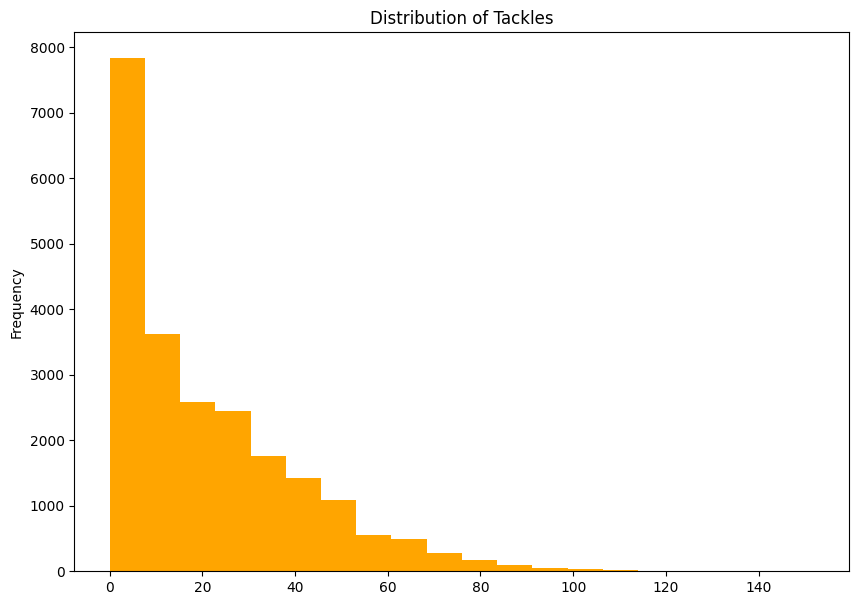

In [82]:
df_player_defact['player_Tackles'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Tackles', color= 'orange')

The smiliar pattern can be seen, players who has limited playtime dominate the distribution of tackles: As we move towards the elite the values gradually decreasing. The outliers, which almost touch the x-axis represents the elite.  

## **Passing Stats - df_player_passing**

In [83]:
# See the head
df_player_passing.head()


,player_passing_stats_id,player_id,team_id,league_id,season_id,player_total_passes_Cmp,player_total_passes_Att,player_total_passes_Cmp%_new,player_total_passes_PrgDist,player_total_passes_TotDist,...,player_medium_passes_Att,player_medium_passes_Cmp%_new,player_long_passes_Cmp,player_long_passes_Att,player_long_passes_Cmp%_new,player_passes_CrsPA,player_passes_into_finalthird,player_passes_KP,player_passes_PPA,player_passes_PrgP
0,1,2.0,PL_BRI_5,PL_1,1,72.0,94.0,0.765957,176.0,844.0,...,16.0,0.88,0.0,1.0,0.00,0.0,3.0,6.0,1.0,4.0
1,2,2.0,PL_BRI_5,PL_1,1,72.0,94.0,0.765957,176.0,844.0,...,16.0,0.88,0.0,1.0,0.00,0.0,3.0,6.0,1.0,4.0
2,3,67.0,PL_BRI_5,PL_1,1,792.0,944.0,0.838983,2987.0,11000.0,...,281.0,0.85,35.0,55.0,0.64,2.0,61.0,25.0,26.0,109.0
3,4,67.0,PL_BRI_5,PL_1,1,792.0,944.0,0.838983,2987.0,11000.0,...,281.0,0.85,35.0,55.0,0.64,2.0,61.0,25.0,26.0,109.0
4,5,74.0,PL_BRI_5,PL_1,1,1508.0,1866.0,0.808146,10639.0,28793.0,...,912.0,0.88,153.0,277.0,0.55,0.0,125.0,5.0,7.0,133.0


In [84]:
df_player_passing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22494 entries, 0 to 22493
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   player_passing_stats_id        22494 non-null  int64  
 1   player_id                      22461 non-null  float64
 2   team_id                        22461 non-null  object 
 3   league_id                      22461 non-null  object 
 4   season_id                      22494 non-null  int64  
 5   player_total_passes_Cmp        22461 non-null  float64
 6   player_total_passes_Att        22461 non-null  float64
 7   player_total_passes_Cmp%_new   22335 non-null  float64
 8   player_total_passes_PrgDist    22461 non-null  float64
 9   player_total_passes_TotDist    22461 non-null  float64
 10  player_short_passes_Cmp        22461 non-null  float64
 11  player_short_passes_Att        22461 non-null  float64
 12  player_short_passes_Cmp%_new   22154 non-null 

In [85]:
df_player_passing.shape

(22494, 24)

In [86]:
df_player_passing.columns

Index(['player_passing_stats_id', 'player_id', 'team_id', 'league_id',
       'season_id', 'player_total_passes_Cmp', 'player_total_passes_Att',
       'player_total_passes_Cmp%_new', 'player_total_passes_PrgDist',
       'player_total_passes_TotDist', 'player_short_passes_Cmp',
       'player_short_passes_Att', 'player_short_passes_Cmp%_new',
       'player_medium_passes_Cmp', 'player_medium_passes_Att',
       'player_medium_passes_Cmp%_new', 'player_long_passes_Cmp',
       'player_long_passes_Att', 'player_long_passes_Cmp%_new',
       'player_passes_CrsPA', 'player_passes_into_finalthird',
       'player_passes_KP', 'player_passes_PPA', 'player_passes_PrgP'],
      dtype='object')

### Player Passing - Columns Names

This dataframe contains 24 columns. The columns which need to merge the dataset are already there as well. Again as in the previous cases there are various datatypes in this dataframe, it looks like some of the colums might be converted to integers. We will keep the other columns.

The dataset contains the columns below:

* **`player_passing_stats_id`**: A unique identifier for each player’s passing statistics record for a given season.
* **`player_total_passes_Cmp`**: Completed passes: the total number of passes successfully completed by the player.
* **`player_total_passes_Att`**: Attempted passes: the total number of passes attempted by the player.
* **`player_total_passes_Cmp%_new`**: Pass completion percentage: the proportion of attempted passes that were successfully completed.
* **`player_total_passes_PrgDist`**: Progressive passing distance: the total distance (in meters) that completed passes moved the ball toward the opponent’s goal.
* **`player_total_passes_TotDist`**: Total passing distance: the cumulative distance (in meters) covered by all completed passes.
* **`player_short_passes_Cmp`**: Completed short passes: the number of successfully completed short-distance passes.
* **`player_short_passes_Att`**:Attempted short passes: the total number of short-distance passes attempted.
* **`player_short_passes_Cmp%_new`**:Short pass completion percentage.
* **`player_medium_passes_Cmp`**: Completed medium-distance passes.
* **`player_medium_passes_Att`**: Attempted medium-distance passes.
* **`player_medium_passes_Cmp%_new`**: Medium pass completion percentage.
* **`player_long_passes_Cmp`**: Completed long passes.
* **`player_long_passes_Att`**: Attempted long passes.
* **`player_long_passes_Cmp%_new`**: Long pass completion percentage.
* **`player_passes_CrsPA`**: Crosses into the penalty area: the number of completed crosses delivered into the opponent penalty area.
* **`player_passes_into_finalthird`**: Passes into the final third: completed passes that entered the attacking third of the pitch.
* **`player_passes_KP`**: Key passes: passes that directly led to a teammate taking a shot.
* **`player_passes_PPA`**: Passes into the penalty area: completed passes that entered the opponents penalty area (excluding crosses).
* **`player_passes_PrgP`**: Progressive passes: completed passes that significantly advanced the ball toward the opponent’s goal.



### df_player_passing_handling Missing values

From the `df.info()` it turns out that some ID-s probably missing. As in the previous case, handling these rows are quite important.

In [87]:
#See the missing values in player_id columns
df_player_passing[df_player_passing['player_id'].isna()]

,player_passing_stats_id,player_id,team_id,league_id,season_id,player_total_passes_Cmp,player_total_passes_Att,player_total_passes_Cmp%_new,player_total_passes_PrgDist,player_total_passes_TotDist,...,player_medium_passes_Att,player_medium_passes_Cmp%_new,player_long_passes_Cmp,player_long_passes_Att,player_long_passes_Cmp%_new,player_passes_CrsPA,player_passes_into_finalthird,player_passes_KP,player_passes_PPA,player_passes_PrgP
13624,13625,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,13626,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,13627,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13627,13628,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13628,13629,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13629,13630,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13630,13631,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13631,13632,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13632,13633,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13633,13634,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#See the missing values in team_id columns
df_player_passing[df_player_passing['team_id'].isna()]

,player_passing_stats_id,player_id,team_id,league_id,season_id,player_total_passes_Cmp,player_total_passes_Att,player_total_passes_Cmp%_new,player_total_passes_PrgDist,player_total_passes_TotDist,...,player_medium_passes_Att,player_medium_passes_Cmp%_new,player_long_passes_Cmp,player_long_passes_Att,player_long_passes_Cmp%_new,player_passes_CrsPA,player_passes_into_finalthird,player_passes_KP,player_passes_PPA,player_passes_PrgP
13624,13625,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,13626,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,13627,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13627,13628,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13628,13629,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13629,13630,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13630,13631,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13631,13632,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13632,13633,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13633,13634,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#See the missing values in team_id columns
df_player_passing[df_player_passing['league_id'].isna()]

,player_passing_stats_id,player_id,team_id,league_id,season_id,player_total_passes_Cmp,player_total_passes_Att,player_total_passes_Cmp%_new,player_total_passes_PrgDist,player_total_passes_TotDist,...,player_medium_passes_Att,player_medium_passes_Cmp%_new,player_long_passes_Cmp,player_long_passes_Att,player_long_passes_Cmp%_new,player_passes_CrsPA,player_passes_into_finalthird,player_passes_KP,player_passes_PPA,player_passes_PrgP
13624,13625,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,13626,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,13627,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13627,13628,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13628,13629,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13629,13630,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13630,13631,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13631,13632,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13632,13633,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13633,13634,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#Delete rows, which are containing either 0 or NaN
df_player_passing = df_player_passing[df_player_passing[id_cols].notna().all(axis=1) & (df_player_passing[id_cols] != 0).all(axis=1)]

In [91]:
df_player_passing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22461 entries, 0 to 22493
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   player_passing_stats_id        22461 non-null  int64  
 1   player_id                      22461 non-null  float64
 2   team_id                        22461 non-null  object 
 3   league_id                      22461 non-null  object 
 4   season_id                      22461 non-null  int64  
 5   player_total_passes_Cmp        22461 non-null  float64
 6   player_total_passes_Att        22461 non-null  float64
 7   player_total_passes_Cmp%_new   22335 non-null  float64
 8   player_total_passes_PrgDist    22461 non-null  float64
 9   player_total_passes_TotDist    22461 non-null  float64
 10  player_short_passes_Cmp        22461 non-null  float64
 11  player_short_passes_Att        22461 non-null  float64
 12  player_short_passes_Cmp%_new   22154 non-null  floa

On the ID level the columns are fine now, but there are still missing values in the `CMP%` columns. As by definition these columns are calculated in the same way, it assumed that they behave the same, especially beacuse the data were already processed in Power BI before.

The `total_passes_CMP/total_passes_Att` and `total_passes_CMP%_new` will be examined only.



In [92]:
# Define these columns
df_passing_selected = df_player_passing[['player_total_passes_Cmp', 'player_total_passes_Att', 'player_total_passes_Cmp%_new']]
print(df_passing_selected)

       player_total_passes_Cmp  player_total_passes_Att  \
0                         72.0                     94.0   
1                         72.0                     94.0   
2                        792.0                    944.0   
3                        792.0                    944.0   
4                       1508.0                   1866.0   
...                        ...                      ...   
22489                    112.0                    123.0   
22490                    112.0                    123.0   
22491                   1008.0                   1496.0   
22492                    181.0                    302.0   
22493                    737.0                    938.0   

       player_total_passes_Cmp%_new  
0                          0.765957  
1                          0.765957  
2                          0.838983  
3                          0.838983  
4                          0.808146  
...                             ...  
22489                    

In [93]:
df_passing_selected.isna().sum()

,0
player_total_passes_Cmp,0
player_total_passes_Att,0
player_total_passes_Cmp%_new,126


In [94]:
# Lets see the NaN value in a subset of the dataframe
df_passing_selected[df_passing_selected['player_total_passes_Cmp%_new'].isna()]

,player_total_passes_Cmp,player_total_passes_Att,player_total_passes_Cmp%_new
589,0.0,0.0,NaN
1246,0.0,0.0,NaN
1247,0.0,0.0,NaN
1248,0.0,0.0,NaN
1373,0.0,0.0,NaN
...,...,...,...
21729,0.0,0.0,NaN
21731,0.0,0.0,NaN
21740,0.0,0.0,NaN
21889,0.0,0.0,NaN


As it was supposed NaN values in the Cmp% columns are cause the columns which supposed to calculate this value are filled with 0. Thee player might not getting enough playtime, therefore it will be filled with zeros for now.

In [95]:
# replace NaN with zeros
Cmp_cols = ['player_total_passes_Cmp%_new', 'player_short_passes_Cmp%_new', 'player_medium_passes_Cmp%_new', 'player_long_passes_Cmp%_new']
df_player_passing[Cmp_cols] = df_player_passing[Cmp_cols].fillna(0)

In [96]:
df_player_passing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22461 entries, 0 to 22493
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   player_passing_stats_id        22461 non-null  int64  
 1   player_id                      22461 non-null  float64
 2   team_id                        22461 non-null  object 
 3   league_id                      22461 non-null  object 
 4   season_id                      22461 non-null  int64  
 5   player_total_passes_Cmp        22461 non-null  float64
 6   player_total_passes_Att        22461 non-null  float64
 7   player_total_passes_Cmp%_new   22461 non-null  float64
 8   player_total_passes_PrgDist    22461 non-null  float64
 9   player_total_passes_TotDist    22461 non-null  float64
 10  player_short_passes_Cmp        22461 non-null  float64
 11  player_short_passes_Att        22461 non-null  float64
 12  player_short_passes_Cmp%_new   22461 non-null  floa

Every columns is filled for now. Finally, we have to convert floats to integers.

### Convert floats to integers

In [97]:
# Except the CMP% and team and league_id columns, all tohetr columns should be converted to integers

passing_icols = ['player_id', 'player_total_passes_Cmp', 'player_total_passes_Att', 'player_total_passes_PrgDist',
       'player_total_passes_TotDist', 'player_short_passes_Cmp',
       'player_short_passes_Att', 'player_medium_passes_Cmp', 'player_medium_passes_Att', 'player_long_passes_Cmp', 'player_long_passes_Att',
       'player_passes_CrsPA', 'player_passes_into_finalthird',
       'player_passes_KP', 'player_passes_PPA', 'player_passes_PrgP']

df_player_passing[passing_icols] = df_player_passing[passing_icols].astype(int)

if df_player_passing['player_id'].dtype == "int64" or str(df_player_passing["player_id"].dtype).startswith("Int"):
  print(f"Conversion was successful. 'player_id' is now {df_player_passing["player_id"].dtype}")

else:
  print ("Conversion failed")

Conversion was successful. 'player_id' is now int64


In [98]:
df_player_passing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22461 entries, 0 to 22493
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   player_passing_stats_id        22461 non-null  int64  
 1   player_id                      22461 non-null  int64  
 2   team_id                        22461 non-null  object 
 3   league_id                      22461 non-null  object 
 4   season_id                      22461 non-null  int64  
 5   player_total_passes_Cmp        22461 non-null  int64  
 6   player_total_passes_Att        22461 non-null  int64  
 7   player_total_passes_Cmp%_new   22461 non-null  float64
 8   player_total_passes_PrgDist    22461 non-null  int64  
 9   player_total_passes_TotDist    22461 non-null  int64  
 10  player_short_passes_Cmp        22461 non-null  int64  
 11  player_short_passes_Att        22461 non-null  int64  
 12  player_short_passes_Cmp%_new   22461 non-null  floa

All selected columns were converted successfully.

In [99]:
df_player_passing.describe()

,player_passing_stats_id,player_id,season_id,player_total_passes_Cmp,player_total_passes_Att,player_total_passes_Cmp%_new,player_total_passes_PrgDist,player_total_passes_TotDist,player_short_passes_Cmp,player_short_passes_Att,...,player_medium_passes_Att,player_medium_passes_Cmp%_new,player_long_passes_Cmp,player_long_passes_Att,player_long_passes_Cmp%_new,player_passes_CrsPA,player_passes_into_finalthird,player_passes_KP,player_passes_PPA,player_passes_PrgP
count,22461.000000,22461.000000,22461.00000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,...,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000,22461.000000
mean,11243.983438,2786.452162,2.99488,470.634388,596.159922,0.757241,2770.873069,8086.774810,221.275188,252.634923,...,224.644050,0.785356,44.814033,82.196385,0.514838,3.002315,36.402832,13.115623,11.092293,47.879257
std,6497.722880,1596.184539,1.39600,464.259864,554.784154,0.124338,3472.868165,8430.355574,215.384259,237.450008,...,235.817889,0.181268,58.618892,109.992717,0.224382,4.843443,43.028270,15.647936,13.736986,51.023642
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5616.000000,1423.000000,2.00000,94.000000,127.000000,0.703608,375.000000,1458.000000,47.000000,55.000000,...,40.000000,0.730000,5.000000,11.000000,0.420000,0.000000,5.000000,2.000000,1.000000,7.000000
50%,11231.000000,2762.000000,3.00000,333.000000,450.000000,0.770213,1513.000000,5341.000000,162.000000,190.000000,...,151.000000,0.810000,24.000000,44.000000,0.530000,1.000000,22.000000,8.000000,6.000000,33.000000
75%,16879.000000,4169.000000,4.00000,713.000000,929.000000,0.831169,3879.000000,12123.000000,335.000000,386.000000,...,335.000000,0.890000,61.000000,113.000000,0.650000,4.000000,52.000000,19.000000,16.000000,73.000000
max,22494.000000,5597.000000,5.00000,3365.000000,3656.000000,1.000000,36334.000000,58907.000000,1681.000000,1777.000000,...,1624.000000,1.000000,677.000000,1348.000000,1.000000,51.000000,437.000000,127.000000,131.000000,392.000000


<Axes: title={'center': 'Distribution of Completed passes'}, ylabel='Frequency'>

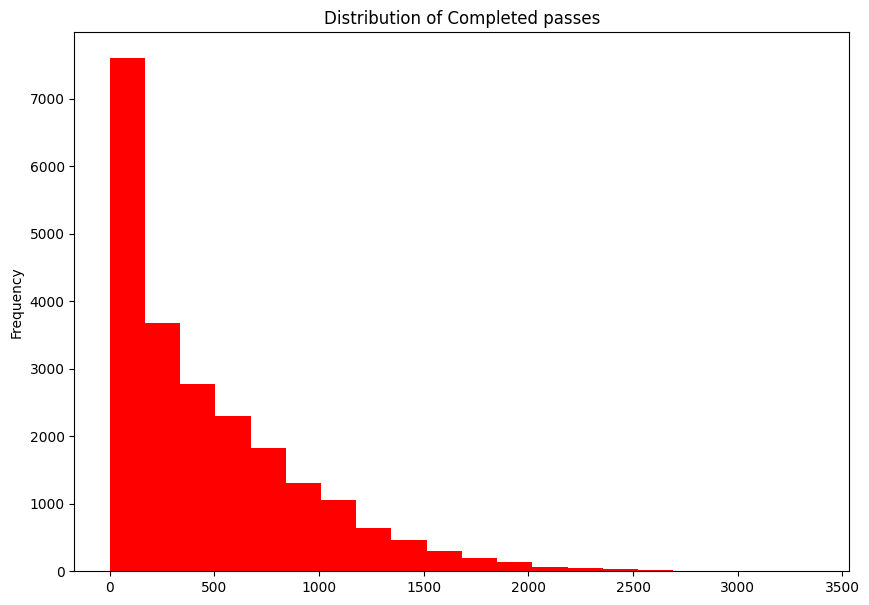

In [100]:
df_player_passing['player_total_passes_Cmp'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Completed passes', color= 'red')

Descriptive statistics of the passing variables reveal a strongly right-skewed distribution, with most players recording relatively low passing volumes and a small subset exhibiting extremely high values. Zero values are common and reflect limited playing time rather than data quality issues. Percentage-based passing accuracy metrics show potential inflation for players with few pass attempts, indicating the need for minimum playing-time thresholds and normalization prior to modeling.

## **Shooting Stats - df_player_shooting**

In [101]:
df_player_shooting.head()

,player_shooting_stats_id,player_id,team_id,league_id,season_id,player_shooting_FK,player_shooting_G/Sh_new,player_shooting_Gls,player_shooting_G/SoT_new,player_shooting_PK,player_shooting_Sh,player_shooting_Sh/90_new,player_shooting_SoT,player_shooting_SoT/90_new,player_shooting_SoT%
0,1,2,PL_BRI_5,PL_1,1,0,0.09,2,0.25,0,23,2.62,8,0.91,0.35
1,1,2,PL_BRI_5,PL_1,1,0,0.09,2,0.25,0,23,13.29,8,4.62,0.35
2,2,2,PL_BRI_5,PL_1,1,0,0.09,2,0.25,0,23,2.62,8,0.91,0.35
3,2,2,PL_BRI_5,PL_1,1,0,0.09,2,0.25,0,23,13.29,8,4.62,0.35
4,3,67,PL_BRI_5,PL_1,1,0,0.05,1,0.20,0,22,1.24,5,0.28,0.23


In [102]:
df_player_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_shooting_stats_id    30000 non-null  int64  
 1   player_id                   30000 non-null  int64  
 2   team_id                     30000 non-null  object 
 3   league_id                   30000 non-null  object 
 4   season_id                   30000 non-null  int64  
 5   player_shooting_FK          30000 non-null  int64  
 6   player_shooting_G/Sh_new    28631 non-null  float64
 7   player_shooting_Gls         30000 non-null  int64  
 8   player_shooting_G/SoT_new   25323 non-null  float64
 9   player_shooting_PK          30000 non-null  int64  
 10  player_shooting_Sh          30000 non-null  int64  
 11  player_shooting_Sh/90_new   30000 non-null  float64
 12  player_shooting_SoT         30000 non-null  int64  
 13  player_shooting_SoT/90_new  300

In [103]:
df_player_shooting.shape

(30000, 15)

In [104]:
df_player_shooting.columns

Index(['player_shooting_stats_id', 'player_id', 'team_id', 'league_id',
       'season_id', 'player_shooting_FK', 'player_shooting_G/Sh_new',
       'player_shooting_Gls', 'player_shooting_G/SoT_new',
       'player_shooting_PK', 'player_shooting_Sh', 'player_shooting_Sh/90_new',
       'player_shooting_SoT', 'player_shooting_SoT/90_new',
       'player_shooting_SoT%'],
      dtype='object')

### Player Shooting - Column names

There are 15 columns with approximately 30 000 recors in this dataframe. On ID wise it is complete and the datatypes seems perfec too. Missing values must be handled.

The folowing columns are in the dataframe:

* **`player_shooting_stats_id`**: A unique identifier for each player’s shooting statistics record for a given season.
* **`player_shooting_FK`**: Shots from free kicks
* **`player_shooting_G/Sh_new`**: Goals per shot: the ratio of goals scored to total shots taken.
* **`player_shooting_Gls`**: Goals scored: the total number of goals scored by the player.
* **`player_shooting_G/SoT_new`**: Goals per shot on target: the ratio of goals scored to shots on target.
* **`player_shooting_PK`**: Penalty kicks made.
* **`player_shooting_Sh`**: Shots: the total number of shots attempted by the player.
* **`player_shooting_Sh/90_new`**: Shots per 90 minutes: the average number of shots attempted per full match equivalent.
* **`player_shooting_SoT`**:Shots on target: the number of shots that were on target, including goals.
* **`player_shooting_SoT/90_new`**: Shots on target per 90 minutes: the average number of shots on target per full match equivalent.
* **`player_shooting_SoT%`**: Shots on target percentage: the proportion of total shots that were on target.

### df_player_shooting - handling missing values

It can be seen that missing values are represented in the calculated columns, which has `float64` datatype. As in the previous sections, it might be good to fill the with zero values.

In [105]:
# Handling missin gvalues
df_player_shooting[df_player_shooting.isna().any(axis=1)]

,player_shooting_stats_id,player_id,team_id,league_id,season_id,player_shooting_FK,player_shooting_G/Sh_new,player_shooting_Gls,player_shooting_G/SoT_new,player_shooting_PK,player_shooting_Sh,player_shooting_Sh/90_new,player_shooting_SoT,player_shooting_SoT/90_new,player_shooting_SoT%
29,8,1663,PL_WES_19,PL_1,1,0,NaN,0,NaN,0,0,0.00,0,0.0,NaN
30,9,1663,PL_WES_19,PL_1,1,0,NaN,0,NaN,0,0,0.00,0,0.0,NaN
41,12,4,LL_GRA_11,LL_1,1,0,NaN,0,NaN,0,0,0.00,0,0.0,NaN
42,13,461,LL_GRA_11,LL_1,1,0,NaN,0,NaN,0,0,0.00,0,0.0,NaN
43,14,101,LL_GRA_11,LL_1,1,0,0.0,0,NaN,0,1,0.33,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,8516,4985,BL_LEI_14,BL_1,2,0,NaN,0,NaN,0,0,0.00,0,0.0,NaN
29977,8526,4990,PL_WES_19,PL_1,2,0,NaN,0,NaN,0,0,0.00,0,0.0,NaN
29987,8530,5006,L1_SAI_19,L1_1,2,0,NaN,0,NaN,0,0,0.00,0,0.0,NaN
29998,8533,5010,BL_FRA_5,BL_1,2,0,0.0,0,NaN,0,4,0.23,0,0.0,0.0


These NaN values based on the extract can be replaced by zeroes. It can be clearly seen that these are NaN becuase the orginal columns from which the calculations are made of contains zero values. The limited playing time could cause this.

In [106]:
shooting_cols = ['player_shooting_G/Sh_new', 'player_shooting_G/SoT_new', 'player_shooting_SoT/90_new', 'player_shooting_Sh/90_new', 'player_shooting_SoT%']
df_player_shooting[shooting_cols] = df_player_shooting[shooting_cols].fillna(0)


In [107]:
df_player_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_shooting_stats_id    30000 non-null  int64  
 1   player_id                   30000 non-null  int64  
 2   team_id                     30000 non-null  object 
 3   league_id                   30000 non-null  object 
 4   season_id                   30000 non-null  int64  
 5   player_shooting_FK          30000 non-null  int64  
 6   player_shooting_G/Sh_new    30000 non-null  float64
 7   player_shooting_Gls         30000 non-null  int64  
 8   player_shooting_G/SoT_new   30000 non-null  float64
 9   player_shooting_PK          30000 non-null  int64  
 10  player_shooting_Sh          30000 non-null  int64  
 11  player_shooting_Sh/90_new   30000 non-null  float64
 12  player_shooting_SoT         30000 non-null  int64  
 13  player_shooting_SoT/90_new  300

All the columns are filled, this is ready for merging.

In [108]:
df_player_shooting.describe()

,player_shooting_stats_id,player_id,season_id,player_shooting_FK,player_shooting_G/Sh_new,player_shooting_Gls,player_shooting_G/SoT_new,player_shooting_PK,player_shooting_Sh,player_shooting_Sh/90_new,player_shooting_SoT,player_shooting_SoT/90_new,player_shooting_SoT%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4307.432867,2681.256933,1.503433,0.807433,inf,2.479767,inf,0.230500,21.326067,11.107022,7.297367,3.729902,0.299931
std,2473.033402,1524.191400,0.499997,2.175770,NaN,3.593748,NaN,0.877836,21.037518,106.171302,8.345945,38.412296,0.196679
min,1.000000,2.000000,1.000000,0.000000,0.00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2159.750000,1391.000000,1.000000,0.000000,0.00,0.000000,0.000000e+00,0.000000,5.000000,0.550000,1.000000,0.110000,0.190000
50%,4355.000000,2630.000000,2.000000,0.000000,0.07,1.000000,2.380952e-01,0.000000,15.000000,1.420000,4.000000,0.410000,0.310000
75%,6443.000000,3997.000000,2.000000,0.000000,0.14,3.000000,4.166667e-01,0.000000,31.000000,3.232500,11.000000,1.090000,0.400000
max,8533.000000,5595.000000,2.000000,40.000000,inf,41.000000,inf,11.000000,191.000000,5200.000000,85.000000,2400.000000,1.000000


<Axes: title={'center': 'Distribution of Goals'}, ylabel='Frequency'>

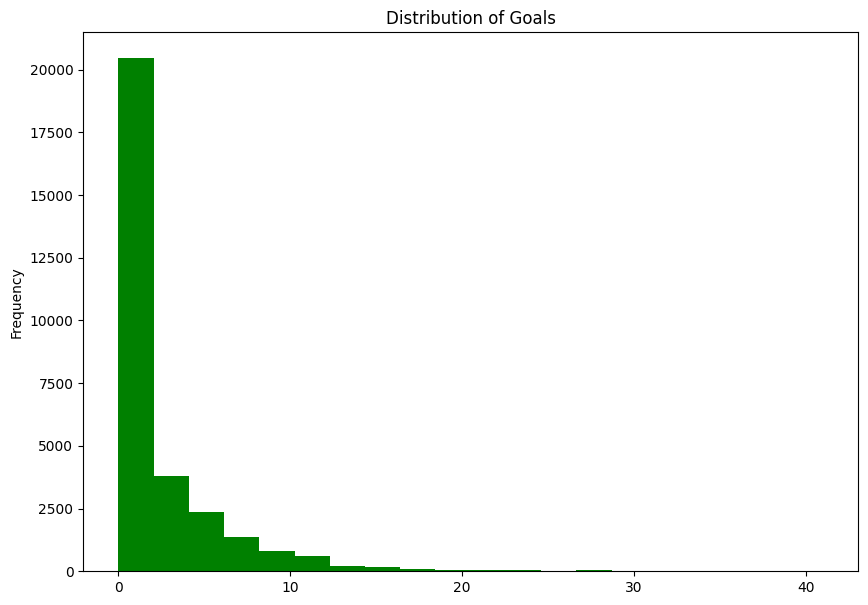

In [109]:
df_player_shooting['player_shooting_Gls'].plot(kind='hist', bins=20, figsize=(10,7), title='Distribution of Goals', color= 'green')

The descriptive statistics of shooting revealed that some of the columns are containing infinite values. These data should be handled prior to to modelling.

# Team statistics Tables


In this section Team statistics tables will be reviewed and checked based on quality and some basics methods.

## **Team Standard Stats -df_squad_standard**

In [110]:
## See the head
df_squad_standard.head()

,team_id,league_id,season_id,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper
0,L1_PSG_16,L1_1,5,1,Paris S-G,fr FRA,1,34,26,6,2,92,35,57,84,2.47,"47,413",Ousmane Dembélé - 21,Gianluigi Donnarumma
1,BL_BAY_3,BL_1,5,2,Bayern Munich,de GER,1,34,25,7,2,99,32,67,82,2.41,75,Harry Kane - 26,Manuel Neuer
2,LL_BAR_4,LL_1,5,3,Barcelona,es ESP,1,38,28,4,6,102,39,63,88,2.32,"45,953",Robert Lewandowski - 27,Iñaki Peña
3,PL_LIV_12,PL_1,5,4,Liverpool,eng ENG,1,38,25,9,4,86,41,45,84,45709.00,"60,324",Mohamed Salah - 29,Alisson
4,LL_RMA_15,LL_1,5,5,Real Madrid,es ESP,2,38,26,6,6,78,38,40,84,45709.00,"69,807",Kylian Mbappé - 31,Thibaut Courtois


In [111]:
df_squad_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team_id          486 non-null    object 
 1   league_id        486 non-null    object 
 2   season_id        486 non-null    int64  
 3   Rk               486 non-null    int64  
 4   Squad            486 non-null    object 
 5   Country          486 non-null    object 
 6   LgRk             486 non-null    int64  
 7   MP               486 non-null    int64  
 8   W                486 non-null    int64  
 9   D                486 non-null    int64  
 10  L                486 non-null    int64  
 11  GF               486 non-null    int64  
 12  GA               486 non-null    int64  
 13  GD               486 non-null    int64  
 14  Pts              486 non-null    int64  
 15  Pts/MP           486 non-null    float64
 16  Attendance       453 non-null    object 
 17  Top Team Scorer 

In [112]:
df_squad_standard.shape

(486, 19)

In [113]:
df_squad_standard.columns

Index(['team_id', 'league_id', 'season_id', 'Rk', 'Squad', 'Country', 'LgRk',
       'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

### Team Standard Stats - Column names

The inspection of the dataframe revelaed that all competitive performance variables are fully populated. One exception is the Attendance, which is having missing values and must be converted to numeric format. Moreover the based `df.head()` the Pts/MP might contains interesting values. There is a huge differences.

The following columns are in this dataframe:

* **`team_id`**: A unique identifier referencing the team in the dataset.
* **`league_id`**: A unique identifier referencing the league in which the team participated.
* **`season_id`**: A unique identifier referencing the season in which the statistics were recorded.
* **`Rk`**: An ID of a source dataset
* **`Squad`**: The name of the team or squad being represented.
Country
* **`Country`**:
* **`LgRk`**: League Rank: the team's ranking within their league for the given season (often mirrors Rk).
* **`MP`**: Matches played: the total number of matches the team played in the season.
* **`W`**: Wins: the total number of matches won by the team.
* **`D`**: Draws: the total number of matches drawn by the team.
* **`L`**: Losses: the total number of matches lost by the team.
* **`GF`**: Goals for: the total number of goals scored by the team during the season.
* **`GA`**: Goals against: the total number of goals conceded by the team during the season.
* **`GD`**: Goal difference: the difference between goals scored (GF) and goals conceded (GA).
* **`Pts`**: Points: the total number of points accumulated by the team (3 points for a win, 1 for a draw, and 0 for a loss).
* **`Pts/MP`**: Points per match: the average number of points earned per match played by the team.
* **`Attendance`**: The total number of spectators in attendance at the team's matches during the season. This value may be missing or inconsistent in some cases.
* **`Top Team Scorer`**: The player with the most goals scored for the team during the season.
* **`Goalkeeper`**: The name of the goalkeeper of the team.


### df_squad_standard - handling missing values

Only the Attendance column contains missing values. As this column is well filled, it might not worth to delete the whole column, on the other hand upfill the missing values might be a better idea.

In [114]:
# Replace ',' from attendance
df_squad_standard['Attendance'] = (
    df_squad_standard['Attendance']
    .str.replace(',', '', regex=False)
    .astype('float')
)

In [115]:
df_squad_standard['Attendance']

,Attendance
0,47413.0
1,75.0
2,45953.0
3,60324.0
4,69807.0
...,...
481,263.0
482,53.0
483,NaN
484,158.0


In [116]:
# Fill the NaN values with 0
df_squad_standard['Attendance'] = df_squad_standard['Attendance'].fillna(df_squad_standard['Attendance'].median())

In [117]:
df_squad_standard['Attendance'].isna().sum()

np.int64(0)

Now the Attendance column has no NaN values as these were filled up with the medain value.

In [118]:
df_squad_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team_id          486 non-null    object 
 1   league_id        486 non-null    object 
 2   season_id        486 non-null    int64  
 3   Rk               486 non-null    int64  
 4   Squad            486 non-null    object 
 5   Country          486 non-null    object 
 6   LgRk             486 non-null    int64  
 7   MP               486 non-null    int64  
 8   W                486 non-null    int64  
 9   D                486 non-null    int64  
 10  L                486 non-null    int64  
 11  GF               486 non-null    int64  
 12  GA               486 non-null    int64  
 13  GD               486 non-null    int64  
 14  Pts              486 non-null    int64  
 15  Pts/MP           486 non-null    float64
 16  Attendance       486 non-null    float64
 17  Top Team Scorer 

In [119]:
# Convert Attendance value into integer
df_squad_standard['Attendance'] = df_squad_standard['Attendance'].astype(int)

In [120]:
df_squad_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team_id          486 non-null    object 
 1   league_id        486 non-null    object 
 2   season_id        486 non-null    int64  
 3   Rk               486 non-null    int64  
 4   Squad            486 non-null    object 
 5   Country          486 non-null    object 
 6   LgRk             486 non-null    int64  
 7   MP               486 non-null    int64  
 8   W                486 non-null    int64  
 9   D                486 non-null    int64  
 10  L                486 non-null    int64  
 11  GF               486 non-null    int64  
 12  GA               486 non-null    int64  
 13  GD               486 non-null    int64  
 14  Pts              486 non-null    int64  
 15  Pts/MP           486 non-null    float64
 16  Attendance       486 non-null    int64  
 17  Top Team Scorer 

In [121]:
df_squad_standard.describe()

,season_id,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2.987654,49.104938,10.240741,36.962963,13.792181,9.378601,13.792181,52.072016,52.072016,0.000000,50.703704,16167.036687,23006.718107
std,1.414160,28.095186,5.644966,1.754719,6.063242,2.864765,5.530051,16.465426,13.304404,26.022908,17.282214,21864.592179,18986.397816
min,1.000000,1.000000,1.000000,34.000000,2.000000,2.000000,0.000000,20.000000,20.000000,-69.000000,12.000000,0.320000,15.000000
25%,2.000000,25.000000,5.000000,34.000000,9.000000,7.000000,10.000000,40.000000,43.000000,-16.000000,38.250000,1.340000,8841.000000
50%,3.000000,49.000000,10.000000,38.000000,13.000000,9.000000,14.000000,50.000000,52.000000,-3.000000,48.000000,1.750000,19831.000000
75%,4.000000,73.000000,15.000000,38.000000,18.000000,11.000000,18.000000,62.000000,59.000000,17.000000,62.000000,45668.000000,32458.250000
max,5.000000,98.000000,20.000000,38.000000,29.000000,19.000000,30.000000,102.000000,104.000000,73.000000,95.000000,45714.000000,83498.000000


Based on the descriptive statistcis, the data quality looks viable, though in the Pts/MP column are having serious outliers, so this must examined appropriately.

<Axes: title={'center': 'Distribution of Points per Match'}, ylabel='Frequency'>

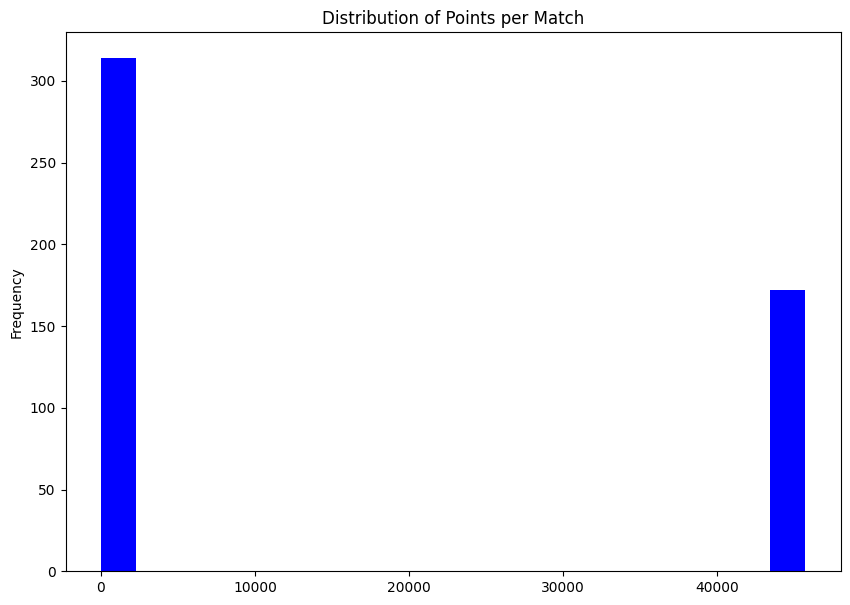

In [122]:
# Pts/MP Histogram
df_squad_standard['Pts/MP'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Points per Match', color='blue')

This distribution seems not normal. For Pts/MP a value between 0 and 3 is expected, however the Histograms shows some serious outliers over 40000 which is not normal. Though there is no problen as Pts and MP columns are filled up well, therfore this column should be deleted and new column will be created by dividing Pts/MP again.

In [123]:
df_squad_standard = df_squad_standard.drop(columns= 'Pts/MP')

In [124]:
df_squad_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team_id          486 non-null    object
 1   league_id        486 non-null    object
 2   season_id        486 non-null    int64 
 3   Rk               486 non-null    int64 
 4   Squad            486 non-null    object
 5   Country          486 non-null    object
 6   LgRk             486 non-null    int64 
 7   MP               486 non-null    int64 
 8   W                486 non-null    int64 
 9   D                486 non-null    int64 
 10  L                486 non-null    int64 
 11  GF               486 non-null    int64 
 12  GA               486 non-null    int64 
 13  GD               486 non-null    int64 
 14  Pts              486 non-null    int64 
 15  Attendance       486 non-null    int64 
 16  Top Team Scorer  486 non-null    object
 17  Goalkeeper       486 non-null    ob

In [125]:
#Create the new column
df_squad_standard['Pts/MP'] = df_squad_standard['Pts'] / df_squad_standard['MP']
df_squad_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team_id          486 non-null    object 
 1   league_id        486 non-null    object 
 2   season_id        486 non-null    int64  
 3   Rk               486 non-null    int64  
 4   Squad            486 non-null    object 
 5   Country          486 non-null    object 
 6   LgRk             486 non-null    int64  
 7   MP               486 non-null    int64  
 8   W                486 non-null    int64  
 9   D                486 non-null    int64  
 10  L                486 non-null    int64  
 11  GF               486 non-null    int64  
 12  GA               486 non-null    int64  
 13  GD               486 non-null    int64  
 14  Pts              486 non-null    int64  
 15  Attendance       486 non-null    int64  
 16  Top Team Scorer  486 non-null    object 
 17  Goalkeeper      

In [126]:
df_squad_standard.head()

,team_id,league_id,season_id,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Pts/MP
0,L1_PSG_16,L1_1,5,1,Paris S-G,fr FRA,1,34,26,6,2,92,35,57,84,47413,Ousmane Dembélé - 21,Gianluigi Donnarumma,2.470588
1,BL_BAY_3,BL_1,5,2,Bayern Munich,de GER,1,34,25,7,2,99,32,67,82,75,Harry Kane - 26,Manuel Neuer,2.411765
2,LL_BAR_4,LL_1,5,3,Barcelona,es ESP,1,38,28,4,6,102,39,63,88,45953,Robert Lewandowski - 27,Iñaki Peña,2.315789
3,PL_LIV_12,PL_1,5,4,Liverpool,eng ENG,1,38,25,9,4,86,41,45,84,60324,Mohamed Salah - 29,Alisson,2.210526
4,LL_RMA_15,LL_1,5,5,Real Madrid,es ESP,2,38,26,6,6,78,38,40,84,69807,Kylian Mbappé - 31,Thibaut Courtois,2.210526


Now the Pts/MP column is perfect and there is no missing values there. The other values which have object datatypes will be encoded after the merge of the different dataframes.

## **Team Goalkeeping Stats**

In [127]:
df_squad_goalkeeping.head()

,team_id,league_id,season_id,team_name,Comp,# Pl,90s,team_Min,W,D,...,team_Saves,team_SoTA,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new
0,BL_ARM_1,BL_1,1,Arminia,Bundesliga,1,34,3060,9,8,...,118,170,0.694118,11,0.323529,6,5,0,1,0.166667
1,BL_ARM_1,BL_1,2,Arminia,Bundesliga,2,34,3060,5,13,...,129,180,0.705556,7,0.205882,7,7,0,0,0.000000
2,BL_AUG_2,BL_1,1,Augsburg,Bundesliga,1,34,3060,10,6,...,126,178,0.696629,7,0.205882,9,6,2,1,0.111111
3,BL_AUG_2,BL_1,2,Augsburg,Bundesliga,1,34,3060,10,8,...,102,156,0.641026,9,0.264706,5,5,0,0,0.000000
4,BL_AUG_2,BL_1,3,Augsburg,Bundesliga,2,34,3060,9,7,...,138,201,0.686567,6,0.176471,4,1,1,2,0.500000


In [128]:
df_squad_goalkeeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_id                 486 non-null    object 
 1   league_id               486 non-null    object 
 2   season_id               486 non-null    int64  
 3   team_name               486 non-null    object 
 4   Comp                    486 non-null    object 
 5   # Pl                    486 non-null    int64  
 6   90s                     486 non-null    int64  
 7   team_Min                486 non-null    int64  
 8   W                       486 non-null    int64  
 9   D                       486 non-null    int64  
 10  L                       486 non-null    int64  
 11  team_Starts             486 non-null    int64  
 12  team_GA                 486 non-null    int64  
 13  team_GA90_new           486 non-null    float64
 14  team_Saves              486 non-null    in

In [129]:
df_squad_goalkeeping.shape

(486, 24)

In [130]:
df_squad_goalkeeping.columns

Index(['team_id', 'league_id', 'season_id', 'team_name', 'Comp', '# Pl', '90s',
       'team_Min', 'W', 'D', 'L', 'team_Starts', 'team_GA', 'team_GA90_new',
       'team_Saves', 'team_SoTA', 'team_Save%_new', 'team_CS', 'team_CS%_new',
       'team_penalty_Katt', 'team_penalty_PKA', 'team_penalty_PKm',
       'team_penalty_PKsv', 'team_penalty_Save%_new'],
      dtype='object')

Some of the columns were not included in the planned database therefore, those wil be dropped. Moreover, the primary key of the table cannot be seen, this will be added now and will be integeres in an incremental order starting from 1.

The columns which will be dropped:

`team_name`, `Comp` , `W` , `D` , `L` , `team_Starts`

In [131]:
df_squad_goalkeeping = df_squad_goalkeeping.drop(columns= ['team_name', 'Comp', 'W', 'D', 'L', 'team_Starts', '90s'])

In [132]:
df_squad_goalkeeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_id                 486 non-null    object 
 1   league_id               486 non-null    object 
 2   season_id               486 non-null    int64  
 3   # Pl                    486 non-null    int64  
 4   team_Min                486 non-null    int64  
 5   team_GA                 486 non-null    int64  
 6   team_GA90_new           486 non-null    float64
 7   team_Saves              486 non-null    int64  
 8   team_SoTA               486 non-null    int64  
 9   team_Save%_new          486 non-null    float64
 10  team_CS                 486 non-null    int64  
 11  team_CS%_new            486 non-null    float64
 12  team_penalty_Katt       486 non-null    int64  
 13  team_penalty_PKA        486 non-null    int64  
 14  team_penalty_PKm        486 non-null    in

In [133]:
# Add the new ID column to the dataframe
df_squad_goalkeeping['squad_goalkeeping_stats_id'] = range(1, len(df_squad_goalkeeping) + 1)

In [134]:
df_squad_goalkeeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team_id                     486 non-null    object 
 1   league_id                   486 non-null    object 
 2   season_id                   486 non-null    int64  
 3   # Pl                        486 non-null    int64  
 4   team_Min                    486 non-null    int64  
 5   team_GA                     486 non-null    int64  
 6   team_GA90_new               486 non-null    float64
 7   team_Saves                  486 non-null    int64  
 8   team_SoTA                   486 non-null    int64  
 9   team_Save%_new              486 non-null    float64
 10  team_CS                     486 non-null    int64  
 11  team_CS%_new                486 non-null    float64
 12  team_penalty_Katt           486 non-null    int64  
 13  team_penalty_PKA            486 non

In [135]:
df_squad_goalkeeping = df_squad_goalkeeping.rename(columns = {'# Pl': 'team_gk_Pl'})

In [136]:
df_squad_goalkeeping.columns

Index(['team_id', 'league_id', 'season_id', 'team_gk_Pl', 'team_Min',
       'team_GA', 'team_GA90_new', 'team_Saves', 'team_SoTA', 'team_Save%_new',
       'team_CS', 'team_CS%_new', 'team_penalty_Katt', 'team_penalty_PKA',
       'team_penalty_PKm', 'team_penalty_PKsv', 'team_penalty_Save%_new',
       'squad_goalkeeping_stats_id'],
      dtype='object')

### Team Goalkeeping Stats - Column Names



* **`team_id`**: A unique identifier referencing the team.
* **`league_id`**: A unique identifier referencing the league in which the team competed.
* **`season_id`**: A unique identifier referencing the season of the recorded statistics.
* **`team_gk_Pl`**: Goalkeepers played: the number of different goalkeepers who appeared for the team during the season.
* **`team_Min`**: Total minutes played by the teams goalkeepers.
* **`team_GA`**: Goals against: the total number of goals conceded by the team.
* **`team_GA90_new`**: Goals against per 90 minutes: the average number of goals conceded per full match.
* **`team_Saves`**: Total number of saves made by the teams goalkeepers.
* **`team_SoTA`**:Shots on target against: the total number of shots on target faced by the team.
* **`team_Save%_new`**: Save percentage: the proportion of shots on target that were saved by the team’s goalkeepers.
* **`team_CS`**: Clean sheets: the number of matches in which the team conceded no goals.
* **`team_CS%_new`**: Clean sheet percentage: the proportion of matches played in which the team kept a clean sheet.
* **`team_penalty_Katt`**:Penalty kicks attempted against the teams goalkeepers.
* **`team_penalty_PKA`**: Penalty kicks against: the total number of penalty kicks conceded by the team.
* **`team_penalty_PKm`**: Penalty kicks missed by the opponent against the team.
* **`team_penalty_PKsv`**: Penalty kicks saved by the teams goalkeepers.
* **`team_penalty_Save%_new`**: Penalty save percentage: the proportion of penalty kicks faced that were saved by the teams goalkeepers.
* **`squad_goalkeeping_stats_id`**: A unique identifier for each team-level goalkeeping statistics record for a given season.


In [137]:
df_squad_goalkeeping.describe()

,season_id,team_gk_Pl,team_Min,team_GA,team_GA90_new,team_Saves,team_SoTA,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2.987654,2.158436,3326.323045,52.072016,1.411934,106.207819,157.602881,0.670701,9.551440,0.257807,5.987654,4.757202,0.327160,0.903292,0.155395,243.500000
std,1.414160,0.724818,157.840885,13.307039,0.365332,20.688161,29.984682,0.049711,4.032909,0.106580,2.739526,2.455942,0.586764,0.976481,0.172754,140.440379
min,1.000000,1.000000,3056.000000,20.000000,0.530000,48.000000,80.000000,0.513333,1.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,3060.000000,43.000000,1.160000,92.000000,136.000000,0.635344,7.000000,0.184211,4.000000,3.000000,0.000000,0.000000,0.000000,122.250000
50%,3.000000,2.000000,3420.000000,52.000000,1.390000,105.000000,156.000000,0.677178,9.000000,0.236842,6.000000,5.000000,0.000000,1.000000,0.125000,243.500000
75%,4.000000,3.000000,3420.000000,59.000000,1.630000,119.000000,178.000000,0.702819,12.000000,0.323529,8.000000,6.000000,1.000000,1.000000,0.250000,364.750000
max,5.000000,4.000000,3420.000000,104.000000,2.740000,169.000000,263.000000,0.805310,26.000000,0.684211,15.000000,14.000000,3.000000,5.000000,1.000000,486.000000


<Axes: title={'center': 'Distribution of Goals Against'}, ylabel='Frequency'>

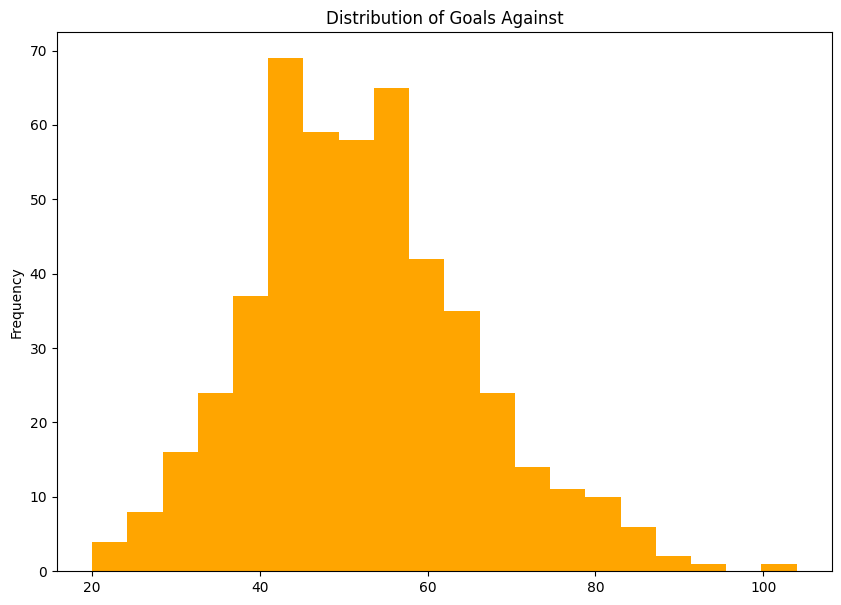

In [138]:
df_squad_goalkeeping['team_GA'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Goals Against', color= 'orange')

<Axes: title={'center': 'Distribution of Goals Against per 90)'}, ylabel='Frequency'>

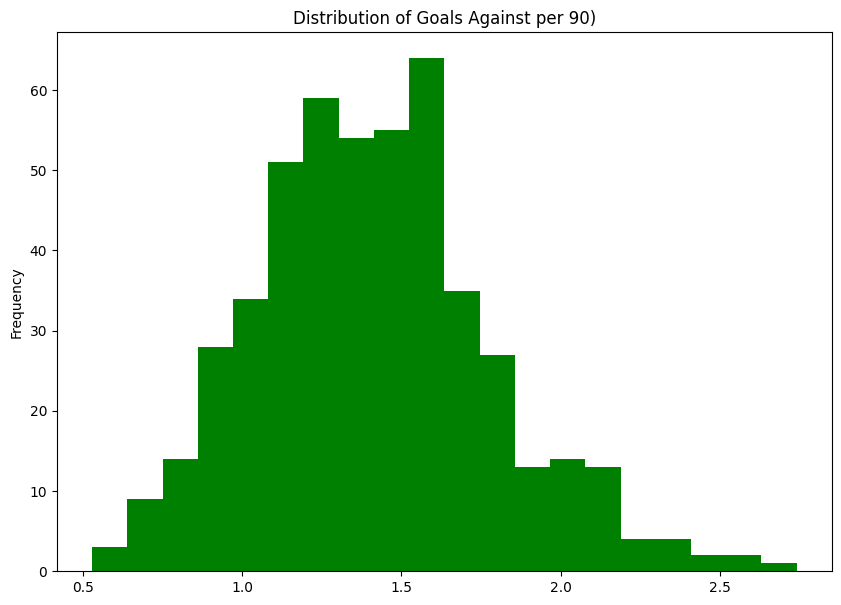

In [139]:
df_squad_goalkeeping['team_GA90_new'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Goals Against per 90)', color= 'green')

Descriptive statistics of the team goalkeeping variables reveal variability in performance across teams, with goalkeepers facing an average of 6 penalty kicks per season and maintaining an average of 9.5 clean sheets. The distribution of goals conceded per 90 minutes suggests a significant variation in defensive strength, with some teams struggling to maintain solid defensive performances. These metrics were considered in subsequent modeling to assess the impact of team defensive capabilities on market value.

## **Team Miscellaneous Stats - df_squad_misc**


In [140]:
df_squad_misc.head()

,team_id,league_id,season_id,team_name,Comp,# team_Pl,team_Misc_perform_90s,team_Misc_perform_CrdY,team_Misc_perform_CrdR,team_Misc_perfrom_2CrdY,...,team_Misc_perform_Int,team_Misc_perform_Off,team_Misc_perform_Recov,team_Misc_perform_TklW,team_Misc_perfrom_OG,team_Misc_perfrom_PKcon,team_Misc_perofrm_PKwon,team_Misc_aeriald_Won,team_Misc_aeriald_Lost,team_Misc_aeriald_Won%_new
0,BL_ARM_1,BL_1,1,Arminia,Bundesliga,26,34,52,1,0,...,418,49,1725,328,1,6,2,740,711,0.509993
1,BL_ARM_1,BL_1,2,Arminia,Bundesliga,26,34,55,2,1,...,421,54,1907,311,2,7,2,658,734,0.472701
2,BL_AUG_2,BL_1,1,Augsburg,Bundesliga,25,34,71,4,3,...,454,67,1802,308,3,9,3,559,688,0.448276
3,BL_AUG_2,BL_1,2,Augsburg,Bundesliga,26,34,74,0,0,...,363,73,1927,335,2,5,4,557,604,0.479759
4,BL_AUG_2,BL_1,3,Augsburg,Bundesliga,34,34,96,5,2,...,286,58,1792,299,2,4,3,640,777,0.451658


In [141]:
df_squad_misc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team_id                     486 non-null    object 
 1   league_id                   486 non-null    object 
 2   season_id                   486 non-null    int64  
 3   team_name                   486 non-null    object 
 4   Comp                        486 non-null    object 
 5   # team_Pl                   486 non-null    int64  
 6   team_Misc_perform_90s       486 non-null    int64  
 7   team_Misc_perform_CrdY      486 non-null    int64  
 8   team_Misc_perform_CrdR      486 non-null    int64  
 9   team_Misc_perfrom_2CrdY     486 non-null    int64  
 10  team_Misc_perform_Fls       486 non-null    int64  
 11  team_Misc_perform_Fld       486 non-null    int64  
 12  team_Misc_perform_Crs       486 non-null    int64  
 13  team_Misc_perform_Int       486 non

In [142]:
# See the shape
df_squad_misc.shape

(486, 23)

In [143]:
# column name
df_squad_misc.columns

Index(['team_id', 'league_id', 'season_id', 'team_name', 'Comp', '# team_Pl',
       'team_Misc_perform_90s', 'team_Misc_perform_CrdY',
       'team_Misc_perform_CrdR', 'team_Misc_perfrom_2CrdY',
       'team_Misc_perform_Fls', 'team_Misc_perform_Fld',
       'team_Misc_perform_Crs', 'team_Misc_perform_Int',
       'team_Misc_perform_Off', 'team_Misc_perform_Recov',
       'team_Misc_perform_TklW', 'team_Misc_perfrom_OG',
       'team_Misc_perfrom_PKcon', 'team_Misc_perofrm_PKwon',
       'team_Misc_aeriald_Won', 'team_Misc_aeriald_Lost',
       'team_Misc_aeriald_Won%_new'],
      dtype='object')

In the planned database the follwoing columns were not included, therefore they will be deleted `team_name` , `Comp` ,` team_PL,` `team_Misc_perform_90s`. Also the primary identifier of the dataset is missing, so, they will be added to the dataframe.

In [144]:
#Drop columns
df_squad_misc = df_squad_misc.drop(columns= ['team_name', 'Comp', '# team_Pl', 'team_Misc_perform_90s'])

In [145]:
# Add id
df_squad_misc['squad_misc_stats_id'] = range(1, len(df_squad_misc) + 1)

In [146]:
df_squad_misc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team_id                     486 non-null    object 
 1   league_id                   486 non-null    object 
 2   season_id                   486 non-null    int64  
 3   team_Misc_perform_CrdY      486 non-null    int64  
 4   team_Misc_perform_CrdR      486 non-null    int64  
 5   team_Misc_perfrom_2CrdY     486 non-null    int64  
 6   team_Misc_perform_Fls       486 non-null    int64  
 7   team_Misc_perform_Fld       486 non-null    int64  
 8   team_Misc_perform_Crs       486 non-null    int64  
 9   team_Misc_perform_Int       486 non-null    int64  
 10  team_Misc_perform_Off       486 non-null    int64  
 11  team_Misc_perform_Recov     486 non-null    int64  
 12  team_Misc_perform_TklW      486 non-null    int64  
 13  team_Misc_perfrom_OG        486 non

In [147]:
#See the columns
df_squad_misc.columns

Index(['team_id', 'league_id', 'season_id', 'team_Misc_perform_CrdY',
       'team_Misc_perform_CrdR', 'team_Misc_perfrom_2CrdY',
       'team_Misc_perform_Fls', 'team_Misc_perform_Fld',
       'team_Misc_perform_Crs', 'team_Misc_perform_Int',
       'team_Misc_perform_Off', 'team_Misc_perform_Recov',
       'team_Misc_perform_TklW', 'team_Misc_perfrom_OG',
       'team_Misc_perfrom_PKcon', 'team_Misc_perofrm_PKwon',
       'team_Misc_aeriald_Won', 'team_Misc_aeriald_Lost',
       'team_Misc_aeriald_Won%_new', 'squad_misc_stats_id'],
      dtype='object')

In [148]:
df_squad_misc.shape

(486, 20)

### Team Misc Stats - Column names

This dataframe contains 20 columns with  486 values in each column. It is fully filled, therefore no other transformation needed.

The following atrributes are in the dataset:

* **`team_id `**: A unique identifier referencing the team.
* **`league_id`**: A unique identifier referencing the league in which the team competed.
* **`season_id`**: A unique identifier referencing the season of the recorded statistics.
* **`team_Misc_perform_CrdY`**: Yellow cards: the total number of yellow cards received by the team during the season.
* **`team_Misc_perform_CrdR`**: Red cards: the total number of red cards received by the team during the season.
* **`team_Misc_perfrom_2CrdY`**: Second yellow cards: the number of times a player from the team received a second yellow card in a match, resulting in a red card.
* **`team_Misc_perform_Fls`**: Fouls committed: the total number of fouls committed by the team.
* **`team_Misc_perform_Fld`**: Fouls drawn: the total number of fouls drawn by the team.
* **`team_Misc_perform_Crs`**: Crosses: the total number of crosses attempted by the team.
* **`team_Misc_perform_Int`**: Interceptions: the total number of opponent passes intercepted by the team.
* **`team_Misc_perform_Off`**: Offsides: the total number of times the team was caught offside.
* **`team_Misc_perform_Recov`**: Ball recoveries: the total number of times the team regained possession of the ball.
* **`team_Misc_perform_TklW`**: Tackles won: the total number of successful tackles made by the team.
* **`team_Misc_perfrom_OG`**: Own goals: the total number of goals scored by the team into their own net.
* **`team_Misc_perfrom_PKcon`**: Penalties conceded: the total number of penalty kicks conceded by the team.
* **`team_Misc_perofrm_PKwon`**: Penalties won: the total number of penalty kicks awarded to the team.
* **`team_Misc_aeriald_Won`**: Aerial duels won: the total number of aerial duels won by the team.
* **`team_Misc_aeriald_Lost`**: Aerial duels lost: the total number of aerial duels lost by the team.
* **`team_Misc_aeriald_Won%_new`**: Aerial duel win percentage: the proportion of aerial duels won by the team.
* **`squad_misc_stats_id`**: A unique identifier for each team-level miscellaneous statistics record for a given season.

In [149]:
df_squad_misc.describe()

,season_id,team_Misc_perform_CrdY,team_Misc_perform_CrdR,team_Misc_perfrom_2CrdY,team_Misc_perform_Fls,team_Misc_perform_Fld,team_Misc_perform_Crs,team_Misc_perform_Int,team_Misc_perform_Off,team_Misc_perform_Recov,team_Misc_perform_TklW,team_Misc_perfrom_OG,team_Misc_perfrom_PKcon,team_Misc_perofrm_PKwon,team_Misc_aeriald_Won,team_Misc_aeriald_Lost,team_Misc_aeriald_Won%_new,squad_misc_stats_id
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2.987654,76.211934,3.565844,1.469136,447.543210,425.399177,652.872428,346.141975,65.858025,1852.508230,353.090535,1.598765,5.989712,4.489712,531.355967,531.360082,0.501236,243.500000
std,1.414160,16.714903,2.353060,1.272255,65.374805,58.103969,98.072202,65.435688,14.877313,232.356585,44.219556,1.237523,2.742167,2.344306,111.521709,120.653888,0.032502,140.440379
min,1.000000,34.000000,0.000000,0.000000,287.000000,276.000000,399.000000,215.000000,26.000000,1267.000000,247.000000,0.000000,0.000000,0.000000,245.000000,201.000000,0.422078,1.000000
25%,2.000000,64.000000,2.000000,0.000000,404.000000,383.000000,585.250000,296.000000,55.000000,1709.750000,321.250000,1.000000,4.000000,3.000000,452.000000,440.250000,0.479467,122.250000
50%,3.000000,76.000000,3.000000,1.000000,443.000000,421.000000,649.000000,338.500000,65.000000,1901.000000,352.000000,1.000000,6.000000,4.000000,526.500000,528.000000,0.501700,243.500000
75%,4.000000,87.000000,5.000000,2.000000,493.500000,469.000000,711.750000,392.000000,76.000000,2021.750000,382.000000,2.000000,8.000000,6.000000,603.750000,610.500000,0.523534,364.750000
max,5.000000,135.000000,15.000000,6.000000,648.000000,604.000000,1052.000000,572.000000,123.000000,2472.000000,493.000000,7.000000,15.000000,15.000000,996.000000,946.000000,0.594737,486.000000


<Axes: title={'center': 'Distribution of Yellow Cards'}, ylabel='Frequency'>

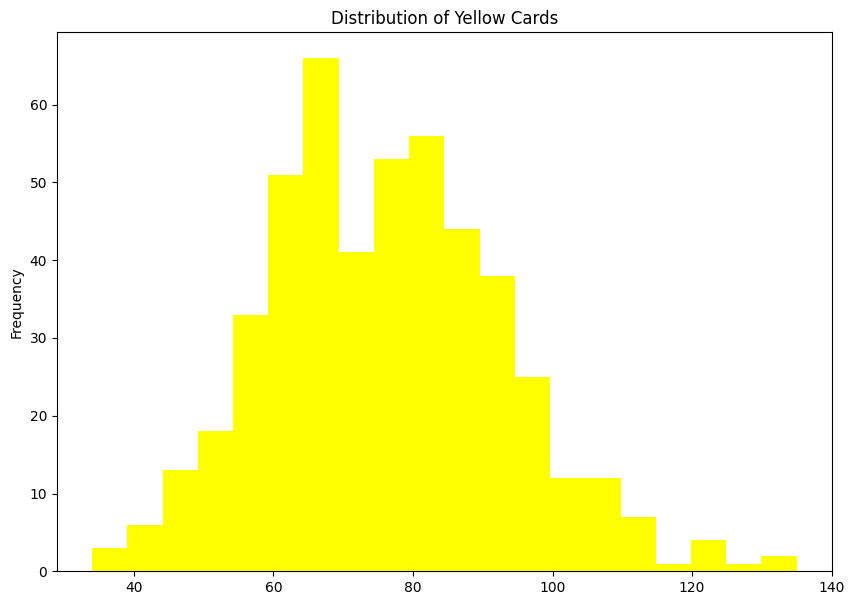

In [150]:
#See the distribution of yellow cards
df_squad_misc['team_Misc_perform_CrdY'].plot (kind='hist', bins=20, figsize=(10,7), title='Distribution of Yellow Cards', color= 'yellow')


Descriptive statistics of the team-level miscellaneous variables indicate substantial variation in disciplinary behavior, physical intensity, and defensive activity across teams. While fouls, interceptions, and tackles exhibit relatively stable distributions, card-related and rare-event variables display higher variance and potential outliers. These metrics primarily capture team playing style rather than direct performance outcomes and were therefore treated as contextual control variables in subsequent analyses.

## **Team Defensivive Actions - df_squad_defact**



In [151]:
#  See the head
df_squad_defact.head()

,team_id,league_id,season_id,team_name,# Pl,Comp,90s,team_Tackles,team_Tackles_TklW,team_Tackles_Def_3rd,...,team_Cha_Att,team_Cha_Tkl%_new,team_Cha_Lost,team_Blocks,team_Blocks_Sh,team_Blocks_Pass,team_Blocks_Int,team_Blocks_Tkl+Int,team_Blocks_Clr,team_Blocks_Err
0,BL_ARM_1,BL_1,1,Arminia,26,Bundesliga,34,552,328,268,...,536,0.399254,322,393,122,271,418,970,739,9
1,BL_ARM_1,BL_1,2,Arminia,26,Bundesliga,340,549,311,270,...,543,0.438306,305,395,110,285,421,970,770,7
2,BL_AUG_2,BL_1,1,Augsburg,25,Bundesliga,34,509,308,251,...,503,0.399602,302,395,116,279,454,963,852,8
3,BL_AUG_2,BL_1,2,Augsburg,26,Bundesliga,340,561,335,254,...,584,0.428082,334,397,116,281,363,924,769,12
4,BL_AUG_2,BL_1,3,Augsburg,34,Bundesliga,34,522,299,251,...,479,0.484342,247,428,125,303,286,808,755,14


In [152]:
# See the basic information
df_squad_defact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_id                486 non-null    object 
 1   league_id              486 non-null    object 
 2   season_id              486 non-null    int64  
 3   team_name              486 non-null    object 
 4   # Pl                   486 non-null    int64  
 5   Comp                   486 non-null    object 
 6    90s                   486 non-null    int64  
 7    team_Tackles          486 non-null    int64  
 8    team_Tackles_TklW     486 non-null    int64  
 9    team_Tackles_Def_3rd  486 non-null    int64  
 10   team_Tackles_Mid_3rd  486 non-null    int64  
 11   team_Tackles_Att_3rd  486 non-null    int64  
 12   team_Cha_Tkl          486 non-null    int64  
 13   team_Cha_Att          486 non-null    int64  
 14   team_Cha_Tkl%_new     486 non-null    float64
 15   team_

In [153]:
# See the shape
df_squad_defact.shape

(486, 23)

In [154]:
df_squad_defact.columns

Index(['team_id', 'league_id', 'season_id', 'team_name', '# Pl', 'Comp',
       ' 90s', ' team_Tackles', ' team_Tackles_TklW', ' team_Tackles_Def_3rd',
       ' team_Tackles_Mid_3rd', ' team_Tackles_Att_3rd', ' team_Cha_Tkl',
       ' team_Cha_Att', ' team_Cha_Tkl%_new', ' team_Cha_Lost', ' team_Blocks',
       ' team_Blocks_Sh', ' team_Blocks_Pass', ' team_Blocks_Int',
       ' team_Blocks_Tkl+Int', ' team_Blocks_Clr', ' team_Blocks_Err'],
      dtype='object')

The column names indicate that some of the columns are not in the original dataset, therefore those needs to be dropped. `team_name` , `Comp` ,` # PL,` `90s`. Moreover the primary key has not been added, so it will be added now.

In [155]:
# Drop unnecessary columns
df_squad_defact = df_squad_defact.drop( columns = ['team_name', '# Pl', 'Comp',
       ' 90s'])

In [156]:
## Check whether they were already dropped
df_squad_defact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_id                486 non-null    object 
 1   league_id              486 non-null    object 
 2   season_id              486 non-null    int64  
 3    team_Tackles          486 non-null    int64  
 4    team_Tackles_TklW     486 non-null    int64  
 5    team_Tackles_Def_3rd  486 non-null    int64  
 6    team_Tackles_Mid_3rd  486 non-null    int64  
 7    team_Tackles_Att_3rd  486 non-null    int64  
 8    team_Cha_Tkl          486 non-null    int64  
 9    team_Cha_Att          486 non-null    int64  
 10   team_Cha_Tkl%_new     486 non-null    float64
 11   team_Cha_Lost         486 non-null    int64  
 12   team_Blocks           486 non-null    int64  
 13   team_Blocks_Sh        486 non-null    int64  
 14   team_Blocks_Pass      486 non-null    int64  
 15   team_

In [157]:
# Add new column
df_squad_defact['squad_defact_stats_id'] = range(1, len(df_squad_defact) + 1)

In [158]:
# info
df_squad_defact.head()

,team_id,league_id,season_id,team_Tackles,team_Tackles_TklW,team_Tackles_Def_3rd,team_Tackles_Mid_3rd,team_Tackles_Att_3rd,team_Cha_Tkl,team_Cha_Att,team_Cha_Tkl%_new,team_Cha_Lost,team_Blocks,team_Blocks_Sh,team_Blocks_Pass,team_Blocks_Int,team_Blocks_Tkl+Int,team_Blocks_Clr,team_Blocks_Err,squad_defact_stats_id
0,BL_ARM_1,BL_1,1,552,328,268,229,55,214,536,0.399254,322,393,122,271,418,970,739,9,1
1,BL_ARM_1,BL_1,2,549,311,270,235,44,238,543,0.438306,305,395,110,285,421,970,770,7,2
2,BL_AUG_2,BL_1,1,509,308,251,211,47,201,503,0.399602,302,395,116,279,454,963,852,8,3
3,BL_AUG_2,BL_1,2,561,335,254,236,71,250,584,0.428082,334,397,116,281,363,924,769,12,4
4,BL_AUG_2,BL_1,3,522,299,251,202,69,232,479,0.484342,247,428,125,303,286,808,755,14,5


In [159]:
df_squad_defact.columns

Index(['team_id', 'league_id', 'season_id', ' team_Tackles',
       ' team_Tackles_TklW', ' team_Tackles_Def_3rd', ' team_Tackles_Mid_3rd',
       ' team_Tackles_Att_3rd', ' team_Cha_Tkl', ' team_Cha_Att',
       ' team_Cha_Tkl%_new', ' team_Cha_Lost', ' team_Blocks',
       ' team_Blocks_Sh', ' team_Blocks_Pass', ' team_Blocks_Int',
       ' team_Blocks_Tkl+Int', ' team_Blocks_Clr', ' team_Blocks_Err',
       'squad_defact_stats_id'],
      dtype='object')

### Team Defensive Actions - Column names

This dataframe contains 23 columns with  486 values in each column. It is fully filled, therefore no other transformation needed.

The following atrributes are in the dataset:

* **`team_id:**: A unique identifier referencing the team.
* **`league_id`**: A unique identifier referencing the league in which the team competed.
* **`season_id`**: A unique identifier referencing the season of the recorded statistics.
* **`team_Tackles`**: Total number of tackles made by the team during the season.
* **`team_Tackles_TklW`**: Tackles won: the number of tackles in which the team successfully regained possession.
* **`team_Tackles_Def_3rd`**: Tackles made in the defensive third of the pitch.
* **`team_Tackles_Mid_3rd`**: Tackles made in the middle third of the pitch.
* **`team_Tackles_Att_3rd`**: Tackles made in the attacking third of the pitch.
* **`team_Cha_Tkl`**: Successful challenges: the number of defensive challenges in which the team won possession.
* **`team_Cha_Att`**: Challenges attempted: the total number of defensive challenges attempted by the team.
* **`team_Cha_Tkl%_new`**: Challenge success percentage: the proportion of successful challenges relative to total challenges attempted.
* **`team_Cha_Lost`**: Challenges lost: the number of defensive challenges in which the team failed to regain possession.
* **`team_Blocks`**: Total number of blocking actions performed by the team.
* **`team_Blocks_Sh`**: Shot blocks: the number of opponent shots blocked by the team.
* **`team_Blocks_Pass`**: Pass blocks: the number of opponent passes blocked by the team.
* **`team_Blocks_Int`**: Interceptions: the total number of opponent passes intercepted by the team.
* **`team_Blocks_Tkl+Int`**: Combined tackles and interceptions: the total number of tackles and interceptions made by the team.
* **`team_Blocks_Clr`**: Clearances: the number of times the team cleared the ball away from defensive danger.
* **`team_Blocks_Err`**: Errors leading to shots: defensive errors by the team that directly resulted in an opponents shot.
* **`squad_defact_stats_id`**: A unique identifier for each team-level defensive actions statistics record for a given season.

In [160]:
df_squad_defact.describe()

,season_id,team_Tackles,team_Tackles_TklW,team_Tackles_Def_3rd,team_Tackles_Mid_3rd,team_Tackles_Att_3rd,team_Cha_Tkl,team_Cha_Att,team_Cha_Tkl%_new,team_Cha_Lost,team_Blocks,team_Blocks_Sh,team_Blocks_Pass,team_Blocks_Int,team_Blocks_Tkl+Int,team_Blocks_Clr,team_Blocks_Err,squad_defact_stats_id
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2.987654,597.512346,353.090535,285.236626,235.331276,76.944444,276.711934,588.703704,0.471528,311.991770,401.185185,117.993827,283.191358,346.141975,943.654321,724.271605,13.862140,243.500000
std,1.414160,69.485049,44.219556,47.601607,31.268431,17.384405,40.813775,79.155873,0.047493,55.132268,46.645346,27.732856,34.182868,65.435688,103.930011,147.620328,7.083852,140.440379
min,1.000000,395.000000,247.000000,153.000000,163.000000,38.000000,167.000000,357.000000,0.324272,168.000000,263.000000,52.000000,197.000000,215.000000,629.000000,398.000000,1.000000,1.000000
25%,2.000000,546.000000,321.250000,253.250000,213.000000,65.000000,249.000000,534.250000,0.439048,272.500000,368.000000,99.000000,260.000000,296.000000,874.000000,628.250000,9.000000,122.250000
50%,3.000000,594.000000,352.000000,282.000000,236.000000,76.000000,277.000000,583.000000,0.473454,310.000000,398.500000,115.000000,282.000000,338.500000,934.500000,717.000000,12.000000,243.500000
75%,4.000000,640.000000,382.000000,317.750000,253.000000,88.000000,304.750000,634.000000,0.507280,344.750000,434.000000,134.000000,307.000000,392.000000,1009.750000,805.750000,17.000000,364.750000
max,5.000000,840.000000,493.000000,437.000000,368.000000,135.000000,412.000000,886.000000,0.593258,479.000000,542.000000,211.000000,405.000000,572.000000,1257.000000,1220.000000,51.000000,486.000000


Descriptive statistics of team-level defensive actions reveal substantial variation in defensive intensity, spatial distribution of tackles, and success rates in one-on-one challenges. Tackles and interceptions are primarily concentrated in the defensive and middle thirds, while attacking-third tackles serve as a proxy for pressing behavior. Error-related variables are rare but highly impactful and were treated as auxiliary control features in subsequent analyses.

## **Team Passing Stats - df_squad_passing**

In [161]:
# See the head
df_squad_passing.head()

,team_id,league_id,season_id,team_name,Comp,# Pl,90s,team_total_passes_Cmp,team_total_passes_Att,team_total_passes_Cmp%_new,...,team_medium_passes_Cmp%_new,team_long_passes_Cmp,team_long_passes_Att,team_long_passes_Cmp%_new,team_Ast,team_passes_KP,team_passes_PPA,team_passes_into_finalthird,team_passes_CrsPA,team_passes_PrgP
0,BL_ARM_1,BL_1,1,Arminia,Bundesliga,26,34,10582,14604,0.724596,...,0.817486,1610,3097,0.519858,16,229,172,795,50,880
1,BL_ARM_1,BL_1,2,Arminia,Bundesliga,26,34,9382,13511,0.694397,...,0.781808,1305,2712,0.481195,18,247,195,763,55,887
2,BL_AUG_2,BL_1,1,Augsburg,Bundesliga,25,34,10257,14168,0.723955,...,0.825562,1322,2716,0.486745,23,245,182,691,56,987
3,BL_AUG_2,BL_1,2,Augsburg,Bundesliga,26,34,9181,13035,0.704334,...,0.788652,1455,2827,0.514680,26,264,218,657,85,895
4,BL_AUG_2,BL_1,3,Augsburg,Bundesliga,34,34,8422,12742,0.660964,...,0.761188,1253,2819,0.444484,29,240,191,662,44,847


In [162]:
# See the head
df_squad_passing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      486 non-null    object 
 1   league_id                    486 non-null    object 
 2   season_id                    486 non-null    int64  
 3   team_name                    486 non-null    object 
 4   Comp                         486 non-null    object 
 5   # Pl                         486 non-null    int64  
 6   90s                          486 non-null    int64  
 7   team_total_passes_Cmp        486 non-null    int64  
 8   team_total_passes_Att        486 non-null    int64  
 9   team_total_passes_Cmp%_new   486 non-null    float64
 10  team_total_passes_TotDist    486 non-null    int64  
 11  team_total_passes_PrgDist    486 non-null    int64  
 12  team_short_passes_Cmp        486 non-null    int64  
 13  team_short_passes_At

In [163]:
# See the shape
df_squad_passing.shape

(486, 27)

In [164]:
# Reveal the column names
df_squad_passing.columns


Index(['team_id', 'league_id', 'season_id', 'team_name', 'Comp', '# Pl', '90s',
       'team_total_passes_Cmp', 'team_total_passes_Att',
       'team_total_passes_Cmp%_new', 'team_total_passes_TotDist',
       'team_total_passes_PrgDist', 'team_short_passes_Cmp',
       'team_short_passes_Att', 'team_short_passes_Cmp%_new',
       'team_medium_passes_Cmp', 'team_medium_passes_Att',
       'team_medium_passes_Cmp%_new', 'team_long_passes_Cmp',
       'team_long_passes_Att', 'team_long_passes_Cmp%_new', 'team_Ast',
       'team_passes_KP', 'team_passes_PPA', 'team_passes_into_finalthird',
       'team_passes_CrsPA', 'team_passes_PrgP'],
      dtype='object')

The column names indicate that some of the columns are not in the original dataset, therefore those needs to be dropped. `team_name` , `Comp` ,` # PL,` `90s`. Moreover the primary key has not been added, so it will be added now.

In [165]:
# Dropping columns
df_squad_passing = df_squad_passing.drop (columns = ['team_name', '# Pl', 'Comp',
       '90s'])

In [166]:
# Add new columns
df_squad_passing['squad_passing_stats_id'] = range(1, len(df_squad_passing) + 1)

In [167]:
df_squad_passing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      486 non-null    object 
 1   league_id                    486 non-null    object 
 2   season_id                    486 non-null    int64  
 3   team_total_passes_Cmp        486 non-null    int64  
 4   team_total_passes_Att        486 non-null    int64  
 5   team_total_passes_Cmp%_new   486 non-null    float64
 6   team_total_passes_TotDist    486 non-null    int64  
 7   team_total_passes_PrgDist    486 non-null    int64  
 8   team_short_passes_Cmp        486 non-null    int64  
 9   team_short_passes_Att        486 non-null    int64  
 10  team_short_passes_Cmp%_new   486 non-null    float64
 11  team_medium_passes_Cmp       486 non-null    int64  
 12  team_medium_passes_Att       486 non-null    int64  
 13  team_medium_passes_C

In [168]:
#See the columns
df_squad_passing.columns

Index(['team_id', 'league_id', 'season_id', 'team_total_passes_Cmp',
       'team_total_passes_Att', 'team_total_passes_Cmp%_new',
       'team_total_passes_TotDist', 'team_total_passes_PrgDist',
       'team_short_passes_Cmp', 'team_short_passes_Att',
       'team_short_passes_Cmp%_new', 'team_medium_passes_Cmp',
       'team_medium_passes_Att', 'team_medium_passes_Cmp%_new',
       'team_long_passes_Cmp', 'team_long_passes_Att',
       'team_long_passes_Cmp%_new', 'team_Ast', 'team_passes_KP',
       'team_passes_PPA', 'team_passes_into_finalthird', 'team_passes_CrsPA',
       'team_passes_PrgP', 'squad_passing_stats_id'],
      dtype='object')

### Team Passing - Column names


This dataframe contains 24 columns with  486 values in each column. It is fully filled, therefore no other transformation needed.

The following atrributes are in the dataset:
* **`team_id`**: A unique identifier referencing the team.
* **`league_id`**: A unique identifier referencing the league in which the team competed.
* **`season_id`**: A unique identifier referencing the season of the recorded statistics.
* **`team_total_passes_Cmp`**: Completed passes: the total number of passes successfully completed by the team.
* **`team_total_passes_Att`**: Attempted passes: the total number of passes attempted by the team.
* **`team_total_passes_Cmp%_new`**: Pass completion percentage: the proportion of attempted passes successfully completed by the team.
* **`team_total_passes_TotDist`**: Total passing distance: the cumulative distance (in meters) covered by all completed team passes.
* **`team_total_passes_PrgDist`**: Progressive passing distance: the total distance (in meters) that completed passes moved the ball toward the opponent’s goal.
* **`team_short_passes_Cmp`**: Completed short passes by the team.
* **`team_short_passes_Att`**: Attempted short passes by the team.
* **`team_short_passes_Cmp%_new`**: Short pass completion percentage for the team.
* **`team_medium_passes_Cmp`**: Completed medium-distance passes by the team.
* **`team_medium_passes_Att`**: Attempted medium-distance passes by the team.
* **`team_medium_passes_Cmp%_new`**: Medium pass completion percentage for the team.
* **`team_long_passes_Cmp`**: Completed long passes by the team.
* **`team_long_passes_Att`**: Attempted long passes by the team.
* **`team_long_passes_Cmp%_new`**: Long pass completion percentage for the team.
* **`team_Ast`**:Assists: the total number of goals assisted by team passes.
* **`team_passes_KP`**: Key passes: passes by the team that directly led to a shot.
* **`team_passes_PPA`**: Passes into the penalty area: completed team passes that entered the opponents penalty area (excluding crosses).
* **`team_passes_into_finalthird`**: Passes into the final third: completed team passes that entered the attacking third of the pitch.
* **`team_passes_CrsPA`**: Crosses into the penalty area: completed crosses delivered by the team into the opponents penalty area.
* **`team_passes_PrgP `**: Progressive passes: completed team passes that significantly advanced the ball toward the opponents goal.
* **`squad_passing_stats_id`**:

In [169]:
df_squad_passing.describe()

,season_id,team_total_passes_Cmp,team_total_passes_Att,team_total_passes_Cmp%_new,team_total_passes_TotDist,team_total_passes_PrgDist,team_short_passes_Cmp,team_short_passes_Att,team_short_passes_Cmp%_new,team_medium_passes_Cmp,...,team_long_passes_Cmp,team_long_passes_Att,team_long_passes_Cmp%_new,team_Ast,team_passes_KP,team_passes_PPA,team_passes_into_finalthird,team_passes_CrsPA,team_passes_PrgP,squad_passing_stats_id
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2.987654,14511.024691,18233.049383,0.788759,256905.207819,92731.816872,6512.880658,7395.374486,0.874107,6096.983539,...,1492.477366,2730.664609,0.546736,35.432099,342.288066,286.746914,1103.343621,76.526749,1387.592593,243.500000
std,1.414160,3314.926728,3149.645268,0.047119,49287.381258,10800.538240,1846.167351,1856.487409,0.030866,1384.754579,...,245.990484,326.293879,0.062105,12.773947,67.445888,77.355784,269.359935,18.981877,305.505271,140.440379
min,1.000000,7949.000000,11986.000000,0.647551,158876.000000,68613.000000,3104.000000,3872.000000,0.769841,3064.000000,...,964.000000,1793.000000,0.396801,12.000000,190.000000,126.000000,650.000000,34.000000,847.000000,1.000000
25%,2.000000,12074.750000,15882.500000,0.760263,219927.000000,85056.750000,5150.000000,6020.250000,0.855744,5127.750000,...,1319.750000,2522.500000,0.500216,26.000000,295.000000,228.000000,906.000000,62.000000,1160.500000,122.250000
50%,3.000000,13962.500000,17800.500000,0.790954,249509.500000,91427.500000,6129.500000,7066.500000,0.876147,5987.000000,...,1473.500000,2745.000000,0.540190,33.000000,329.000000,269.500000,1045.000000,75.000000,1341.000000,243.500000
75%,4.000000,16475.500000,20019.000000,0.822904,288803.250000,99280.000000,7436.250000,8326.250000,0.895823,6967.500000,...,1637.750000,2917.000000,0.586346,43.000000,381.000000,337.750000,1225.250000,88.000000,1577.250000,364.750000
max,5.000000,25192.000000,28488.000000,0.898181,412596.000000,127087.000000,13304.000000,14257.000000,0.939800,10158.000000,...,2380.000000,4026.000000,0.742296,75.000000,598.000000,548.000000,2131.000000,134.000000,2421.000000,486.000000


Descriptive statistics of team-level passing variables reveal substantial variation in ball circulation, passing accuracy, and attacking progression across teams. While overall pass completion rates exhibit relatively low dispersion, progressive distance and forward-passing metrics display significantly wider distributions, reflecting distinct tactical styles. Variables related to progressive passes, key passes, and passes into the final third provide particularly strong indicators of offensive structure and creative capacity and were therefore prioritized in subsequent modeling.

# **Team Shooting Stats - df_squad_shooting**



In [170]:
df_squad_shooting.head()

,team_id,league_id,season_id,team_name,Comp,# Pl,90s,team_shooting_Gls,team_shooting_Sh,team_shooting_SoT,team_shooting_G/Sh_new,team_shooting_G/SoT_new,team_shooting_Sh/90_new,team_shooting_SoT/90_new,team_shooting_SoT%_new,team_shooting_FK,team_shooting_PK,team_shooting_PKatt
0,BL_ARM_1,BL_1,1,Arminia,Bundesliga,26,34,23,331,100,0.07,0.23,9.74,2.94,0.302115,14,1,2
1,BL_ARM_1,BL_1,2,Arminia,Bundesliga,26,34,26,361,109,0.07,0.24,10.62,3.21,0.301939,10,2,2
2,BL_AUG_2,BL_1,1,Augsburg,Bundesliga,25,34,35,332,108,0.11,0.32,9.76,3.18,0.325301,10,2,5
3,BL_AUG_2,BL_1,2,Augsburg,Bundesliga,26,34,39,362,117,0.11,0.33,10.65,3.44,0.323204,11,5,5
4,BL_AUG_2,BL_1,3,Augsburg,Bundesliga,34,34,41,354,101,0.12,0.41,10.41,2.97,0.285311,14,4,5


In [171]:
df_squad_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_id                   486 non-null    object 
 1   league_id                 486 non-null    object 
 2   season_id                 486 non-null    int64  
 3   team_name                 486 non-null    object 
 4   Comp                      486 non-null    object 
 5   # Pl                      486 non-null    int64  
 6   90s                       486 non-null    int64  
 7   team_shooting_Gls         486 non-null    int64  
 8   team_shooting_Sh          486 non-null    int64  
 9   team_shooting_SoT         486 non-null    int64  
 10  team_shooting_G/Sh_new    486 non-null    float64
 11  team_shooting_G/SoT_new   486 non-null    float64
 12  team_shooting_Sh/90_new   486 non-null    float64
 13  team_shooting_SoT/90_new  486 non-null    float64
 14  team_shoot

In [172]:
df_squad_shooting.shape

(486, 18)

In [173]:
df_squad_shooting.columns

Index(['team_id', 'league_id', 'season_id', 'team_name', 'Comp', '# Pl', '90s',
       'team_shooting_Gls', 'team_shooting_Sh', 'team_shooting_SoT',
       'team_shooting_G/Sh_new', 'team_shooting_G/SoT_new',
       'team_shooting_Sh/90_new', 'team_shooting_SoT/90_new',
       'team_shooting_SoT%_new', 'team_shooting_FK', 'team_shooting_PK',
       'team_shooting_PKatt'],
      dtype='object')

The column names indicate that some of the columns are not in the original dataset, therefore those needs to be dropped. `team_name` , `Comp` ,` # PL,` `90s`. Moreover the primary key has not been added, so it will be added now.

In [174]:
# Dropping columns
df_squad_shooting = df_squad_shooting.drop (columns = ['team_name', '# Pl', 'Comp',
       '90s'])

In [175]:
# Add new columns
df_squad_shooting['squad_shooting_stats_id'] = range(1, len(df_squad_passing) + 1)

In [176]:
# Info
df_squad_shooting.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_id                   486 non-null    object 
 1   league_id                 486 non-null    object 
 2   season_id                 486 non-null    int64  
 3   team_shooting_Gls         486 non-null    int64  
 4   team_shooting_Sh          486 non-null    int64  
 5   team_shooting_SoT         486 non-null    int64  
 6   team_shooting_G/Sh_new    486 non-null    float64
 7   team_shooting_G/SoT_new   486 non-null    float64
 8   team_shooting_Sh/90_new   486 non-null    float64
 9   team_shooting_SoT/90_new  486 non-null    float64
 10  team_shooting_SoT%_new    486 non-null    float64
 11  team_shooting_FK          486 non-null    int64  
 12  team_shooting_PK          486 non-null    int64  
 13  team_shooting_PKatt       486 non-null    int64  
 14  squad_shoo

In [177]:
df_squad_shooting.columns

Index(['team_id', 'league_id', 'season_id', 'team_shooting_Gls',
       'team_shooting_Sh', 'team_shooting_SoT', 'team_shooting_G/Sh_new',
       'team_shooting_G/SoT_new', 'team_shooting_Sh/90_new',
       'team_shooting_SoT/90_new', 'team_shooting_SoT%_new',
       'team_shooting_FK', 'team_shooting_PK', 'team_shooting_PKatt',
       'squad_shooting_stats_id'],
      dtype='object')

### Team Shooting - Column names

This dataframe contains 15 columns with  486 values in each column. It is fully filled, therefore no other transformation needed.

The columns are the following:

* **`team_id `**: A unique identifier referencing the team.
* **`league_id`**: A unique identifier referencing the league in which the team competed.
* **`season_id`**: A unique identifier referencing the season of the recorded statistics.
* **`team_shooting_Gls`**: Goals scored: the total number of goals scored by the team during the season.
* **`team_shooting_Sh`**: Shots: the total number of shots attempted by the team.
* **`team_shooting_SoT`**: Shots on target: the total number of shots on target by the team, including goals.
* **`team_shooting_G/Sh_new`**: Goals per shot: the ratio of goals scored to total shots taken by the team.
* **`team_shooting_G/SoT_new`**: Goals per shot on target: the ratio of goals scored to shots on target by the team.
* **`team_shooting_Sh/90_new`**: Shots per 90 minutes: the average number of shots attempted per full match equivalent.
* **`team_shooting_SoT/90_new`**: Shots on target per 90 minutes: the average number of shots on target per full match equivalent.
* **`team_shooting_SoT%_new`**: Shots on target percentage: the proportion of total shots that were on target.
* **`team_shooting_FK`**: Free-kick goals: the number of goals scored directly from free kicks by the team.
* **`team_shooting_PK`**: Penalty goals: the number of goals scored from penalty kicks by the team.
* **`team_shooting_PKatt`**: Penalty kick attempts: the total number of penalty kicks taken by the team.

In [178]:
df_squad_shooting.describe()

,season_id,team_shooting_Gls,team_shooting_Sh,team_shooting_SoT,team_shooting_G/Sh_new,team_shooting_G/SoT_new,team_shooting_Sh/90_new,team_shooting_SoT/90_new,team_shooting_SoT%_new,team_shooting_FK,team_shooting_PK,team_shooting_PKatt,squad_shooting_stats_id
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,2.987654,50.467078,455.205761,151.942387,0.109568,0.328333,12.326543,4.118169,0.332067,15.555556,4.757202,5.987654,243.500000
std,1.414160,16.121253,78.296653,34.058784,0.023516,0.053019,2.095360,0.938794,0.032413,5.983138,2.465159,2.779871,140.440379
min,1.000000,19.000000,265.000000,81.000000,0.060000,0.180000,6.970000,2.130000,0.252174,4.000000,0.000000,0.000000,1.000000
25%,2.000000,39.000000,400.250000,127.000000,0.090000,0.290000,10.870000,3.420000,0.310821,12.000000,3.000000,4.000000,122.250000
50%,3.000000,48.000000,442.000000,146.000000,0.110000,0.330000,12.030000,3.970000,0.329673,15.000000,4.500000,6.000000,243.500000
75%,4.000000,60.000000,503.000000,173.000000,0.130000,0.370000,13.530000,4.680000,0.355641,19.000000,6.000000,8.000000,364.750000
max,5.000000,99.000000,781.000000,272.000000,0.180000,0.490000,20.550000,8.000000,0.433121,47.000000,15.000000,20.000000,486.000000


Descriptive statistics of team-level shooting variables highlight substantial variation in attacking volume and finishing efficiency across teams. While shot and shot-on-target counts capture offensive activity, efficiency-based metrics such as goals per shot on target and shots on target percentage provide more stable indicators of finishing quality. Per-90 shooting metrics further normalize differences in match volume and enable meaningful cross-team comparisons.

# Merge the different tables

As all the tables were reviewd and preprocessed, the next step in the whole coding project is to merge all the tables.

How to merge?

Goalkeeping statistics were merged to the dataset, using player and team identifiers. However, these variables are position specific, therefore for now, it will not be merged. Though the goalkeeper stats represent  team defensive statistics too, however if every other player got these statistcs, they will have many NaN or zero value, which can distort the model and influence the value of an outfiled player.

1) First the **`player stats`** will be merged together.
2) Then we will continue with the **`Team stats`.**
3) Merge Player + Team Stats together
4) Add dimension tables
5) Finally Market value to create the final dataframe


## **Merging Player Stats**

In [180]:
# Merge 'player_stats'
player_stats = (
    df_player_standard
    .merge (df_player_shooting, on =['player_id', 'team_id', 'season_id'], how = 'left')
    .merge (df_player_passing, on =['player_id', 'team_id', 'season_id'], how = 'left')
    .merge (df_player_defact, on =['player_id', 'team_id', 'season_id'], how = 'left')
    .merge (df_player_misc, on =['player_id', 'team_id', 'season_id'], how = 'left')
)

MergeError: Passing 'suffixes' which cause duplicate columns {'league_id_x'} is not allowed.

The merge is not allowed, therefore removing the league_id column would be adequate from player statistics.

In [181]:
# Removing legaue_id from player_stats

dfs_player_stats = [
    df_player_standard,
    df_player_shooting,
    df_player_passing,
    df_player_misc,
    df_player_defact
]

for df in dfs_player_stats:
  if 'league_id' in df.columns:
    df.drop(columns=['league_id'], inplace=True)

In [182]:
# Check whether the removal was succesful
df_player_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14339 entries, 0 to 14338
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_standard_stats_id   14339 non-null  int64  
 1   player_id                  14339 non-null  int64  
 2   team_id                    14339 non-null  object 
 3   season_id                  14339 non-null  int64  
 4   nation_id                  14334 non-null  float64
 5   player_playtime_90s_new    14339 non-null  float64
 6   player_playtime_Min        14339 non-null  int64  
 7   player_playtime_MP         14339 non-null  int64  
 8   player_playtime_Starts     14339 non-null  int64  
 9   player_perform_Gls         14339 non-null  int64  
 10  Sum of player_perform_Ast  14339 non-null  int64  
 11  player_perform_G+A         14339 non-null  int64  
 12  player_perform_CrdY        14339 non-null  int64  
 13  player_perform_CrdR        14339 non-null  int

In [183]:
# Merge 'player_stats'
player_stats = (
    df_player_standard
    .merge (df_player_shooting, on =['player_id', 'team_id', 'season_id'], how = 'left')
    .merge (df_player_passing, on =['player_id', 'team_id', 'season_id'], how = 'left')
    .merge (df_player_defact, on =['player_id', 'team_id', 'season_id'], how = 'left')
    .merge (df_player_misc, on =['player_id', 'team_id', 'season_id'], how = 'left')
)

In [184]:
# See the head
player_stats.head()

,player_standard_stats_id,player_id,team_id,season_id,nation_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,player_playtime_Starts,player_perform_Gls,...,player_Misc_perform_Fls,player_Misc_perform_Off,player_Misc_perform_OG,player_Misc_perform_PKcon,player_Misc_perform_PKwon,player_Misc_perform_Recov,player_Misc_perform_TklW,player_Misc_aeriald_won%_new,player_Misc_aeriald_Won,player_Misc_aeriald_Lost
0,1,2204,L1_STR_20,1,41.0,0.12,11,2,0,0,...,1,0,0,0,0,0,0,NaN,0,0
1,2,4305,PL_CRY_7,1,91.0,19.74,1777,22,20,0,...,11,3,0,0,0,136,22,0.46,11,13
2,3,5565,L1_REI_17,1,75.0,32.10,2889,33,33,3,...,37,0,0,1,0,200,37,0.63,92,53
3,3,5565,L1_REI_17,1,75.0,32.10,2889,33,33,3,...,37,0,0,1,0,200,37,0.63,92,53
4,3,5565,L1_REI_17,1,75.0,32.10,2889,33,33,3,...,37,0,0,1,0,200,37,0.63,92,53


In [185]:
# See information about the columns
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563205 entries, 0 to 563204
Data columns (total 89 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   player_standard_stats_id       563205 non-null  int64  
 1   player_id                      563205 non-null  int64  
 2   team_id                        563205 non-null  object 
 3   season_id                      563205 non-null  int64  
 4   nation_id                      563200 non-null  float64
 5   player_playtime_90s_new        563205 non-null  float64
 6   player_playtime_Min            563205 non-null  int64  
 7   player_playtime_MP             563205 non-null  int64  
 8   player_playtime_Starts         563205 non-null  int64  
 9   player_perform_Gls             563205 non-null  int64  
 10  Sum of player_perform_Ast      563205 non-null  int64  
 11  player_perform_G+A             563205 non-null  int64  
 12  player_perform_CrdY           

In [186]:
#See the shape
player_stats.shape

(563205, 89)

In [187]:
player_stats

,player_standard_stats_id,player_id,team_id,season_id,nation_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,player_playtime_Starts,player_perform_Gls,...,player_Misc_perform_Fls,player_Misc_perform_Off,player_Misc_perform_OG,player_Misc_perform_PKcon,player_Misc_perform_PKwon,player_Misc_perform_Recov,player_Misc_perform_TklW,player_Misc_aeriald_won%_new,player_Misc_aeriald_Won,player_Misc_aeriald_Lost
0,1,2204,L1_STR_20,1,41.0,0.12,11,2,0,0,...,1,0,0,0,0,0,0,NaN,0,0
1,2,4305,PL_CRY_7,1,91.0,19.74,1777,22,20,0,...,11,3,0,0,0,136,22,0.46,11,13
2,3,5565,L1_REI_17,1,75.0,32.10,2889,33,33,3,...,37,0,0,1,0,200,37,0.63,92,53
3,3,5565,L1_REI_17,1,75.0,32.10,2889,33,33,3,...,37,0,0,1,0,200,37,0.63,92,53
4,3,5565,L1_REI_17,1,75.0,32.10,2889,33,33,3,...,37,0,0,1,0,200,37,0.63,92,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563200,14336,3549,PL_ARS_1,4,92.0,34.34,3091,35,35,8,...,30,3,0,0,1,158,17,0.25,3,9
563201,14336,3549,PL_ARS_1,4,92.0,34.34,3091,35,35,8,...,30,3,0,0,1,158,17,0.25,3,9
563202,14337,3833,SA_HEL_8,4,7.0,13.38,1204,20,13,5,...,26,6,0,0,0,25,0,0.76,135,43
563203,14338,3833,SA_MON_26,4,7.0,13.97,1257,17,13,4,...,23,1,0,0,0,29,5,0.68,86,40


### Player Stats merged

Overall it can be seen that most of the columns are fully filled. However the shooting stats has several missing values. It is supposed that this might be caused by the facts, that Goalkeepers are not having shots during the games they instantly get null values. It needs to take a closer look later on.

## **Merging Team Stats**

In [188]:
# Merge 'team_stats'
team_stats = (
    df_squad_standard
      .merge (df_squad_shooting, on =['team_id', 'season_id'], how = 'left')
        .merge (df_squad_passing, on =['team_id', 'season_id'], how = 'left')
        .merge (df_squad_defact, on =['team_id', 'season_id'], how = 'left')
        .merge (df_squad_misc, on =['team_id', 'season_id'], how = 'left')
        .merge (df_squad_goalkeeping, on= ['team_id', 'season_id', how ='left'])
)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (ipython-input-204241845.py, line 8)

In [199]:
 #Removing legaue_id from team_stats

dfs_team_stats = [
    df_squad_standard,
    df_squad_shooting,
    df_squad_passing,
    df_squad_misc,
    df_squad_defact,
    df_squad_goalkeeping
]

for df in dfs_team_stats:
  if 'league_id' in df.columns:
    df.drop(columns=['league_id'], inplace=True)

In [200]:
df_squad_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team_id          486 non-null    object 
 1   season_id        486 non-null    int64  
 2   Rk               486 non-null    int64  
 3   Squad            486 non-null    object 
 4   Country          486 non-null    object 
 5   LgRk             486 non-null    int64  
 6   MP               486 non-null    int64  
 7   W                486 non-null    int64  
 8   D                486 non-null    int64  
 9   L                486 non-null    int64  
 10  GF               486 non-null    int64  
 11  GA               486 non-null    int64  
 12  GD               486 non-null    int64  
 13  Pts              486 non-null    int64  
 14  Attendance       486 non-null    int64  
 15  Top Team Scorer  486 non-null    object 
 16  Goalkeeper       486 non-null    object 
 17  Pts/MP          

In [201]:
# Merge 'team_stats'
team_stats = (
    df_squad_standard
    .merge (df_squad_shooting, on =['team_id', 'season_id'], how = 'left')
    .merge (df_squad_passing, on =['team_id', 'season_id'], how = 'left')
    .merge (df_squad_defact, on =['team_id', 'season_id'], how = 'left')
    .merge (df_squad_misc, on =['team_id', 'season_id'], how = 'left')
    .merge (df_squad_goalkeeping, on=['team_id', 'season_id'], how ='left')
)

In [202]:
# See the head
team_stats.head()

,team_id,season_id,Rk,Squad,Country,LgRk,MP,W,D,L,...,team_SoTA,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id
0,L1_PSG_16,5,1,Paris S-G,fr FRA,1,34,26,6,2,...,103.0,0.660194,7.0,0.205882,3.0,3.0,0.0,0.0,0.0,163.0
1,BL_BAY_3,5,2,Bayern Munich,de GER,1,34,25,7,2,...,80.0,0.600000,16.0,0.470588,2.0,1.0,1.0,0.0,0.0,12.0
2,LL_BAR_4,5,3,Barcelona,es ESP,1,38,28,4,6,...,108.0,0.638889,13.0,0.342105,4.0,4.0,0.0,0.0,0.0,202.0
3,PL_LIV_12,5,4,Liverpool,eng ENG,1,38,25,9,4,...,138.0,0.702899,14.0,0.368421,2.0,1.0,0.0,1.0,0.5,343.0
4,LL_RMA_15,5,5,Real Madrid,es ESP,2,38,26,6,6,...,126.0,0.698413,15.0,0.394737,3.0,3.0,0.0,0.0,0.0,263.0


In [203]:
# See the head
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 100 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      486 non-null    object 
 1   season_id                    486 non-null    int64  
 2   Rk                           486 non-null    int64  
 3   Squad                        486 non-null    object 
 4   Country                      486 non-null    object 
 5   LgRk                         486 non-null    int64  
 6   MP                           486 non-null    int64  
 7   W                            486 non-null    int64  
 8   D                            486 non-null    int64  
 9   L                            486 non-null    int64  
 10  GF                           486 non-null    int64  
 11  GA                           486 non-null    int64  
 12  GD                           486 non-null    int64  
 13  Pts                

## Simple checks on merged tables

In [204]:
# duplicated columns for player stats
player_stats.duplicated( subset=['player_id', 'team_id', 'season_id',]).sum()
#

np.int64(548866)

In [205]:
# duplicated columns for team stats
team_stats.duplicated( subset=['team_id', 'season_id']).sum()
#

np.int64(5)

In [206]:
# Group columns by
player_stats.groupby(
    ['player_id', 'team_id', 'season_id']
).size().sort_values(ascending=False).head(100)

player_id  team_id    season_id
3738       PL_BUR_21  2            4375
4582       BL_WOL_19  1            4375
                      2            4375
3738       L1_LYO_8   1            4375
481        BL_FRA_5   2            3750
                                   ... 
1171       L1_PSG_16  1            1024
4962       SA_UDN_20  2            1024
342        PL_MUN_14  1            1024
           SA_ATL_1   1            1024
3473       L1_NAN_13  1            1024
Length: 100, dtype: int64

In [207]:
# Group columns by
team_stats.groupby(
    [ 'team_id', 'season_id']
).size().sort_values(ascending=False).head(10)

team_id    season_id
No match   4            6
PL_LEE_24  2            1
           1            1
PL_IPS_10  5            1
PL_FUL_9   5            1
           4            1
           3            1
           1            1
PL_EVE_8   5            1
           4            1
dtype: int64

Although the dataset contained approximately 2,300 players per season, the raw tables included competition-level records, resulting in several hundred thousand observations. After aggregating player statistics to season level, the final dataset contained approximately 11,000 player–season observations, aligning with expectations.

From the duplication checks above it can be seen that we have several duplications. Aggregation is required because the raw dataset contains competition-level records, while the prediction target is season-level. This makes it inevitable to summarise multiple observations into a single player-team-season- representation.

In [208]:
# List player_stats Columns
player_stats.columns

Index(['player_standard_stats_id', 'player_id', 'team_id', 'season_id',
       'nation_id', 'player_playtime_90s_new', 'player_playtime_Min',
       'player_playtime_MP', 'player_playtime_Starts', 'player_perform_Gls',
       'Sum of player_perform_Ast', 'player_perform_G+A',
       'player_perform_CrdY', 'player_perform_CrdR', 'player_perform_PK',
       'player_perfrom_PKatt', 'player_per90min_Gls', 'player_per90min_Ast',
       'player_per90min_G-PK', 'player_per90min_G+A', 'player_per90min_G+A-PK',
       'player_progression_PrgC', 'player_progression_PrgP',
       'player__perform_G-PK', 'player_shooting_stats_id',
       'player_shooting_FK', 'player_shooting_G/Sh_new', 'player_shooting_Gls',
       'player_shooting_G/SoT_new', 'player_shooting_PK', 'player_shooting_Sh',
       'player_shooting_Sh/90_new', 'player_shooting_SoT',
       'player_shooting_SoT/90_new', 'player_shooting_SoT%',
       'player_passing_stats_id', 'player_total_passes_Cmp',
       'player_total_passes_Att

In [209]:
# remove columns stat_id columns

stat_id_cols = [
    'player_standard_stats_id',
    'player_shooting_stats_id',
    'player_passing_stats_id',
    'player_defactions_stats_id',
    'player_Misc_stats_id'
]

player_stats_clean = player_stats.drop (columns= stat_id_cols , errors="ignore")

In [210]:
# Check that removing columns were successful
player_stats_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563205 entries, 0 to 563204
Data columns (total 84 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   player_id                      563205 non-null  int64  
 1   team_id                        563205 non-null  object 
 2   season_id                      563205 non-null  int64  
 3   nation_id                      563200 non-null  float64
 4   player_playtime_90s_new        563205 non-null  float64
 5   player_playtime_Min            563205 non-null  int64  
 6   player_playtime_MP             563205 non-null  int64  
 7   player_playtime_Starts         563205 non-null  int64  
 8   player_perform_Gls             563205 non-null  int64  
 9   Sum of player_perform_Ast      563205 non-null  int64  
 10  player_perform_G+A             563205 non-null  int64  
 11  player_perform_CrdY            563205 non-null  int64  
 12  player_perform_CrdR           

In [211]:
# Check weather remove of columns were successful
player_stats_clean.columns

Index(['player_id', 'team_id', 'season_id', 'nation_id',
       'player_playtime_90s_new', 'player_playtime_Min', 'player_playtime_MP',
       'player_playtime_Starts', 'player_perform_Gls',
       'Sum of player_perform_Ast', 'player_perform_G+A',
       'player_perform_CrdY', 'player_perform_CrdR', 'player_perform_PK',
       'player_perfrom_PKatt', 'player_per90min_Gls', 'player_per90min_Ast',
       'player_per90min_G-PK', 'player_per90min_G+A', 'player_per90min_G+A-PK',
       'player_progression_PrgC', 'player_progression_PrgP',
       'player__perform_G-PK', 'player_shooting_FK',
       'player_shooting_G/Sh_new', 'player_shooting_Gls',
       'player_shooting_G/SoT_new', 'player_shooting_PK', 'player_shooting_Sh',
       'player_shooting_Sh/90_new', 'player_shooting_SoT',
       'player_shooting_SoT/90_new', 'player_shooting_SoT%',
       'player_total_passes_Cmp', 'player_total_passes_Att',
       'player_total_passes_Cmp%_new', 'player_total_passes_PrgDist',
       'player_to

The ID columns were successfully removed.

### Aggregation of Player Data

In [212]:
# Aggregate Player Data

agg_dict_1 = {

    # playtime
    'player_playtime_90s_new' : 'mean',
    'player_playtime_Min' : 'sum',
    'player_playtime_MP'  : 'sum',
    'player_playtime_Starts': 'sum',

    # performance total
    'player_perform_Gls': 'sum',
    'Sum of player_perform_Ast': 'sum',
    'player_perform_G+A': 'sum',
    'player_perform_CrdY': 'sum',
    'player_perform_CrdR': 'sum',
    'player_perform_PK': 'sum',
    'player_perfrom_PKatt': 'sum',
    'player__perform_G-PK': 'sum',

    # per90
    'player_per90min_Gls' :'mean',
    'player_per90min_Ast' : 'mean',
    'player_per90min_G-PK'  : 'mean',
    'player_per90min_G+A' : 'mean',
    'player_per90min_G+A-PK' : 'mean',


    #progression
    'player_progression_PrgC' : 'sum',
    'player_progression_PrgP' : 'sum',

    #shooting:
    'player_shooting_FK' : 'sum',
    'player_shooting_G/Sh_new': 'sum',
    'player_shooting_Gls' : 'sum',
    'player_shooting_G/SoT_new' : 'mean',
    'player_shooting_PK' : 'sum',
    'player_shooting_Sh':'sum',
    'player_shooting_Sh/90_new' : 'mean',
    'player_shooting_SoT': 'sum',
    'player_shooting_SoT/90_new': 'mean',
    'player_shooting_SoT%': 'mean',



    # passing
    'player_total_passes_Cmp' : 'sum',
    'player_total_passes_Att' : 'sum',
    'player_total_passes_Cmp%_new': 'mean',
    'player_total_passes_PrgDist' : 'sum',
    'player_total_passes_TotDist' : 'sum',
    'player_short_passes_Cmp' : 'sum',
    'player_short_passes_Att' : 'sum',
    'player_short_passes_Cmp%_new' : 'mean',
    'player_medium_passes_Cmp' : 'sum',
    'player_medium_passes_Att': 'sum',
    'player_medium_passes_Cmp%_new': 'mean',
    'player_long_passes_Cmp': 'sum',
    'player_long_passes_Att' : 'sum',
    'player_long_passes_Cmp%_new' : 'mean',
    'player_passes_into_finalthird': 'sum',
    'player_passes_KP' : 'sum',
    'player_passes_PPA' : 'sum',
    'player_passes_PrgP' : 'sum',

    #Defensive actions
    'player_Tackles' : 'sum',
    'player_Tackles_Att 3rd': 'sum',
    'player_Tackles_Def 3rd' : 'sum',
    'player_Tackles_Mid 3rd': 'sum',
    'player_Tackles_TklW': 'sum',
    'player_Cha_Tkl_' : 'sum',
    'player_Cha_Att': 'sum',
    'player_Cha_Tkl%_new': 'mean',
    'player_Cha_Lost': 'sum',
    'player_Blocks': 'sum',
    'player_Blocks_Clr': 'sum',
    'player_Blocks_Err': 'sum',
    'player_Blocks_Int' : 'sum',
    'player_Blocks_Pass': 'sum',
    'player_Blocks_Sh': 'sum',
    'player_Blocks_Tkl+Int': 'sum',


    #Misc
    'player_Misc_perform_2CrdY' : 'sum',
    'player_Misc_perform_CrdR' : 'sum',
    'player_Misc_perform_CrdY': 'sum',
    'player_Misc_perform_Crs': 'sum',
    'player_Misc_perform_Fld': 'sum',
    'player_Misc_perform_Int':  'sum',
    'player_Misc_perform_Fls':  'sum',
    'player_Misc_perform_Off':  'sum',
    'player_Misc_perform_OG':  'sum',
    'player_Misc_perform_PKcon':  'sum',
    'player_Misc_perform_PKwon':  'sum',
    'player_Misc_perform_Recov':  'sum',
    'player_Misc_perform_TklW':  'sum',
    'player_Misc_aeriald_won%_new': 'mean',
    'player_Misc_aeriald_Won': 'sum',
    'player_Misc_aeriald_Lost': 'sum',
}

In [213]:
# Do the aggregation
player_stats_season = (
    player_stats_clean
    .groupby(
        ['player_id', 'team_id', 'season_id']
    )
    .agg(agg_dict_1)
)

In [214]:
# See the head
player_stats_season.head()

player_playtime_90s_new  player_playtime_Min  \
player_id team_id   season_id                                                 
1         SA_TOR_19 5                             0.01                    1   
2         PL_BRI_5  1                             8.79                25312   
                    2                             1.73                 4992   
3         PL_WES_19 1                             3.52                25360   
                    2                            30.29               218080   

                               player_playtime_MP  player_playtime_Starts  \
player_id team_id   season_id                                               
1         SA_TOR_19 5                           1                       0   
2         PL_BRI_5  1                         544                     288   
                    2                         128                      32   
3         PL_WES_19 1                        2880                    2880   
                    2                        2480                    2480   

                               player_perform_Gls  Sum of player_perform_Ast  \
player_id team_id   season_id                                                  
1         SA_TOR_19 5                           0                          0   
2         PL_BRI_5  1                          64                         64   
                    2                           0                          0   
3         PL_WES_19 1                           0                       1280   
                    2                         160                        480   

                               player_perform_G+A  player_perform_CrdY  \
player_id team_id   season_id                                            
1         SA_TOR_19 5                           0                    0   
2         PL_BRI_5  1                          96                    0   
                    2                           0                    0   
3         PL_WES_19 1                         640                  240   
                    2                         400                  240   

                               player_perform_CrdR  player_perform_PK  ...  \
player_id team_id   season_id                                          ...   
1         SA_TOR_19 5                            0                  0  ...   
2         PL_BRI_5  1                            0                  0  ...   
                    2                            0                  0  ...   
3         PL_WES_19 1                            0                  0  ...   
                    2                            0                  0  ...   

                               player_Misc_perform_Fls  \
player_id team_id   season_id                            
1         SA_TOR_19 5                                0   
2         PL_BRI_5  1                              192   
                    2                                0   
3         PL_WES_19 1                             1040   
                    2                             1120   

                               player_Misc_perform_Off  \
player_id team_id   season_id                            
1         SA_TOR_19 5                                0   
2         PL_BRI_5  1                              256   
                    2                                0   
3         PL_WES_19 1                                0   
                    2                              160   

                               player_Misc_perform_OG  \
player_id team_id   season_id                           
1         SA_TOR_19 5                               0   
2         PL_BRI_5  1                               0   
                    2                               0   
3         PL_WES_19 1                               0   
                    2                               0   

                               player_Misc_perform_PKcon  \
player_id team_id   season_id       

In [215]:
#reset the index of
player_stats_season = player_stats_season.reset_index()

In [216]:
# Duplicate checks
player_stats_season.duplicated(subset=["player_id", "team_id", "season_id"]).sum()

np.int64(0)

In [217]:
#Check the shape
player_stats_season.shape
#

(14339, 82)

In [218]:
#See the head
player_stats_season.head()


,player_id,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,player_playtime_Starts,player_perform_Gls,Sum of player_perform_Ast,player_perform_G+A,...,player_Misc_perform_Fls,player_Misc_perform_Off,player_Misc_perform_OG,player_Misc_perform_PKcon,player_Misc_perform_PKwon,player_Misc_perform_Recov,player_Misc_perform_TklW,player_Misc_aeriald_won%_new,player_Misc_aeriald_Won,player_Misc_aeriald_Lost
0,1,SA_TOR_19,5,0.01,1,1,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
1,2,PL_BRI_5,1,8.79,25312,544,288,64,64,96,...,192,256,0,0,32,384,96,0.18,224,992
2,2,PL_BRI_5,2,1.73,4992,128,32,0,0,0,...,0,0,0,0,0,224,0,0.29,64,160
3,3,PL_WES_19,1,3.52,25360,2880,2880,0,1280,640,...,1040,0,0,0,0,15600,1040,0.55,2800,2320
4,3,PL_WES_19,2,30.29,218080,2480,2480,160,480,400,...,1120,160,0,80,0,13040,1440,0.57,2560,1920


Player level data were aggregated and this resulted in a new dataframe where 1 row involves a player's statistical records in a given season.

### Aggregation of Team level statistics

As in the case of player statistics, aggregation needed on Team level as well, the methodology will be the same.


In [219]:
# See team_stats columns
team_stats.columns

Index(['team_id', 'season_id', 'Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W',
       'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Pts/MP', 'team_shooting_Gls', 'team_shooting_Sh',
       'team_shooting_SoT', 'team_shooting_G/Sh_new',
       'team_shooting_G/SoT_new', 'team_shooting_Sh/90_new',
       'team_shooting_SoT/90_new', 'team_shooting_SoT%_new',
       'team_shooting_FK', 'team_shooting_PK', 'team_shooting_PKatt',
       'squad_shooting_stats_id', 'team_total_passes_Cmp',
       'team_total_passes_Att', 'team_total_passes_Cmp%_new',
       'team_total_passes_TotDist', 'team_total_passes_PrgDist',
       'team_short_passes_Cmp', 'team_short_passes_Att',
       'team_short_passes_Cmp%_new', 'team_medium_passes_Cmp',
       'team_medium_passes_Att', 'team_medium_passes_Cmp%_new',
       'team_long_passes_Cmp', 'team_long_passes_Att',
       'team_long_passes_Cmp%_new', 'team_Ast', 'team_passes_KP',
       'team_passes_PPA', 'team_passes_i

In [220]:
#team stats info
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 100 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      486 non-null    object 
 1   season_id                    486 non-null    int64  
 2   Rk                           486 non-null    int64  
 3   Squad                        486 non-null    object 
 4   Country                      486 non-null    object 
 5   LgRk                         486 non-null    int64  
 6   MP                           486 non-null    int64  
 7   W                            486 non-null    int64  
 8   D                            486 non-null    int64  
 9   L                            486 non-null    int64  
 10  GF                           486 non-null    int64  
 11  GA                           486 non-null    int64  
 12  GD                           486 non-null    int64  
 13  Pts                

In [221]:
dupes = team_stats[
    team_stats.duplicated(subset=['team_id', 'season_id'], keep=False)
]

dupes.sort_values(['team_id', 'season_id'])

,team_id,season_id,Rk,Squad,Country,LgRk,MP,W,D,L,...,team_SoTA,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id
116,No match,4,21,Brest,fr FRA,3,34,17,10,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,No match,4,24,Tottenham,eng ENG,5,38,20,6,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,No match,4,25,Roma,it ITA,6,38,18,9,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,No match,4,26,Chelsea,eng ENG,6,38,18,9,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,No match,4,27,Nice,fr FRA,5,34,15,10,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,No match,4,73,Rayo Vallecano,es ESP,17,38,8,14,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# Filter Out No match! columns
team_stats_clean = team_stats [team_stats['team_id'] != 'No match'].copy()

In [223]:
# Check the head
team_stats_clean.head()

,team_id,season_id,Rk,Squad,Country,LgRk,MP,W,D,L,...,team_SoTA,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id
0,L1_PSG_16,5,1,Paris S-G,fr FRA,1,34,26,6,2,...,103.0,0.660194,7.0,0.205882,3.0,3.0,0.0,0.0,0.0,163.0
1,BL_BAY_3,5,2,Bayern Munich,de GER,1,34,25,7,2,...,80.0,0.600000,16.0,0.470588,2.0,1.0,1.0,0.0,0.0,12.0
2,LL_BAR_4,5,3,Barcelona,es ESP,1,38,28,4,6,...,108.0,0.638889,13.0,0.342105,4.0,4.0,0.0,0.0,0.0,202.0
3,PL_LIV_12,5,4,Liverpool,eng ENG,1,38,25,9,4,...,138.0,0.702899,14.0,0.368421,2.0,1.0,0.0,1.0,0.5,343.0
4,LL_RMA_15,5,5,Real Madrid,es ESP,2,38,26,6,6,...,126.0,0.698413,15.0,0.394737,3.0,3.0,0.0,0.0,0.0,263.0


In [224]:
# team_stat_clean_info
team_stats_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 485
Data columns (total 100 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      479 non-null    object 
 1   season_id                    479 non-null    int64  
 2   Rk                           479 non-null    int64  
 3   Squad                        479 non-null    object 
 4   Country                      479 non-null    object 
 5   LgRk                         479 non-null    int64  
 6   MP                           479 non-null    int64  
 7   W                            479 non-null    int64  
 8   D                            479 non-null    int64  
 9   L                            479 non-null    int64  
 10  GF                           479 non-null    int64  
 11  GA                           479 non-null    int64  
 12  GD                           479 non-null    int64  
 13  Pts                     

In [225]:
#Check the duplicates
team_stats_clean.duplicated(subset=['team_id', 'season_id']).sum()
#

np.int64(0)

In this section, the original plan was to aggregate team level data, however after reviewing tha data deeper, it turned out that some `team_id` -s were not macthed during the merged. Therefore, a decision were made about removing these columns. The duplication check on the new **`team_stats_clean`** dataframe showed that there were no duplicates anymore on based on the combination of `team_id` and `season_id`.

## **Merging Player + Team Stats**

In [226]:
# merging player and team stats together

player_team_stats = (
    player_stats_season
    .merge(
        team_stats_clean,
        on=['team_id', 'season_id'],
        how='left',
        validate='many_to_many'
    )
)


In [227]:
#See the head
player_team_stats.head()

,player_id,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,player_playtime_Starts,player_perform_Gls,Sum of player_perform_Ast,player_perform_G+A,...,team_SoTA,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id
0,1,SA_TOR_19,5,0.01,1,1,0,0,0,0,...,180.0,0.750000,10.0,0.263158,7.0,3.0,0.0,4.0,0.571429,479.0
1,2,PL_BRI_5,1,8.79,25312,544,288,64,64,96,...,125.0,0.632000,12.0,0.315789,7.0,6.0,1.0,0.0,0.000000,304.0
2,2,PL_BRI_5,2,1.73,4992,128,32,0,0,0,...,146.0,0.698630,11.0,0.289474,4.0,3.0,1.0,0.0,0.000000,305.0
3,3,PL_WES_19,1,3.52,25360,2880,2880,0,1280,640,...,147.0,0.680272,11.0,0.289474,5.0,3.0,1.0,1.0,0.200000,376.0
4,3,PL_WES_19,2,30.29,218080,2480,2480,160,480,400,...,165.0,0.690909,8.0,0.210526,6.0,2.0,1.0,3.0,0.500000,377.0


In [228]:
#See the info
player_team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14339 entries, 0 to 14338
Columns: 180 entries, player_id to squad_goalkeeping_stats_id
dtypes: float64(116), int64(59), object(5)
memory usage: 19.7+ MB


In [229]:
# Check the duplicates
player_team_stats.duplicated(subset=['team_id', 'season_id', 'player_id']).sum()

np.int64(0)

In [230]:
# List the columns of the merged table
player_team_stats.columns

Index(['player_id', 'team_id', 'season_id', 'player_playtime_90s_new',
       'player_playtime_Min', 'player_playtime_MP', 'player_playtime_Starts',
       'player_perform_Gls', 'Sum of player_perform_Ast', 'player_perform_G+A',
       ...
       'team_SoTA', 'team_Save%_new', 'team_CS', 'team_CS%_new',
       'team_penalty_Katt', 'team_penalty_PKA', 'team_penalty_PKm',
       'team_penalty_PKsv', 'team_penalty_Save%_new',
       'squad_goalkeeping_stats_id'],
      dtype='object', length=180)

In this section, player_stats_season and team_stats_clean dataframe were successfuly merged. Some basic match were made on them. In the next sections the remaining tables will be merged to this dataframe, creating the final table on which the modelling part will be carried out.

## **Merging the remaining tables**

In [231]:
# Check player
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    5597 non-null   int64 
 1   player_name  5597 non-null   object
 2   position     5596 non-null   object
 3   nation_id    5597 non-null   int64 
 4   born         5597 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 218.8+ KB


In [232]:
# Check df_player.head
df_player['player_id'].head()


,player_id
0,1
1,2
2,3
3,4
4,5


In [233]:
#check player_team_stats head whether it is in the right format
player_team_stats['player_id'].head()

,player_id
0,1
1,2
2,2
3,3
4,3


In [234]:
#Merge player_team_stats with palyer table
player_team_stats = (
    df_player.merge(
        player_team_stats,
        on='player_id',
        how='left',
    )
)

In [235]:
# See player_teams_stats_head
player_team_stats.head(10)

,player_id,player_name,position,nation_id,born,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,...,team_SoTA,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id
0,1,Aaron Ciammaglichella,MF,63,2005,SA_TOR_19,5.0,0.01,1.0,1.0,...,180.0,0.750000,10.0,0.263158,7.0,3.0,0.0,4.0,0.571429,479.0
1,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,125.0,0.632000,12.0,0.315789,7.0,6.0,1.0,0.0,0.000000,304.0
2,2,Aaron Connolly,FW,58,2000,PL_BRI_5,2.0,1.73,4992.0,128.0,...,146.0,0.698630,11.0,0.289474,4.0,3.0,1.0,0.0,0.000000,305.0
3,3,Aaron Cresswell,DF,37,1989,PL_WES_19,1.0,3.52,25360.0,2880.0,...,147.0,0.680272,11.0,0.289474,5.0,3.0,1.0,1.0,0.200000,376.0
4,3,Aaron Cresswell,DF,37,1989,PL_WES_19,2.0,30.29,218080.0,2480.0,...,165.0,0.690909,8.0,0.210526,6.0,2.0,1.0,3.0,0.500000,377.0
5,3,Aaron Cresswell,DF,37,1989,PL_WES_19,3.0,24.83,17880.0,224.0,...,170.0,0.676471,9.0,0.236842,6.0,4.0,1.0,1.0,0.166667,378.0
6,3,Aaron Cresswell,DF,37,1989,PL_WES_19,4.0,4.84,3488.0,88.0,...,241.0,0.692946,5.0,0.131579,10.0,8.0,0.0,2.0,0.200000,379.0
7,3,Aaron Cresswell,DF,37,1989,PL_WES_19,5.0,9.16,6592.0,144.0,...,186.0,0.666667,7.0,0.184211,3.0,3.0,0.0,0.0,0.000000,380.0
8,4,Aarón Escandell,GK,38,1995,LL_GRA_11,1.0,5.00,450.0,5.0,...,170.0,0.617647,9.0,0.236842,12.0,6.0,1.0,5.0,0.416667,237.0
9,4,Aarón Escandell,GK,38,1995,LL_GRA_11,2.0,3.16,284.0,4.0,...,193.0,0.683938,8.0,0.210526,9.0,7.0,0.0,2.0,0.222222,238.0


In [236]:
# See information about the team stats
player_team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14341 entries, 0 to 14340
Columns: 184 entries, player_id to squad_goalkeeping_stats_id
dtypes: float64(174), int64(3), object(7)
memory usage: 20.1+ MB


In [237]:
player_team_stats.duplicated(subset=['player_id', 'team_id', 'season_id']).sum()

np.int64(0)

In [238]:
player_team_stats.shape

(14341, 184)

Overall the merge was successfull. Based on the example of Aaron Cresswell in the head it is clearly visible that Cresswell has the statistics for the different seasons.

#### Merge Nation table

In [239]:
player_team_stats_1 = player_team_stats.merge(
    df_nation,
    on='nation_id',
    how='left'
)

In [240]:
player_team_stats_1.head()

,player_id,player_name,position,nation_id,born,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,...,team_Save%_new,team_CS,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id,nation_name
0,1,Aaron Ciammaglichella,MF,63,2005,SA_TOR_19,5.0,0.01,1.0,1.0,...,0.750000,10.0,0.263158,7.0,3.0,0.0,4.0,0.571429,479.0,it ITA
1,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,0.632000,12.0,0.315789,7.0,6.0,1.0,0.0,0.000000,304.0,ie IRL
2,2,Aaron Connolly,FW,58,2000,PL_BRI_5,2.0,1.73,4992.0,128.0,...,0.698630,11.0,0.289474,4.0,3.0,1.0,0.0,0.000000,305.0,ie IRL
3,3,Aaron Cresswell,DF,37,1989,PL_WES_19,1.0,3.52,25360.0,2880.0,...,0.680272,11.0,0.289474,5.0,3.0,1.0,1.0,0.200000,376.0,eng ENG
4,3,Aaron Cresswell,DF,37,1989,PL_WES_19,2.0,30.29,218080.0,2480.0,...,0.690909,8.0,0.210526,6.0,2.0,1.0,3.0,0.500000,377.0,eng ENG


In [241]:
player_team_stats_1.duplicated(subset=['player_id', 'team_id', 'season_id']).sum()

np.int64(0)

The merge was successful

#### Merge on Season table

In [242]:
player_team_stats_2 = player_team_stats_1.merge(
    df_season,
    on='season_id',
    how='left'
)

In [243]:
player_team_stats_2.head()

,player_id,player_name,position,nation_id,born,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,...,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id,nation_name,season_name,season_start,season_end
0,1,Aaron Ciammaglichella,MF,63,2005,SA_TOR_19,5.0,0.01,1.0,1.0,...,7.0,3.0,0.0,4.0,0.571429,479.0,it ITA,2024-2025,2024.0,2025.0
1,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,7.0,6.0,1.0,0.0,0.000000,304.0,ie IRL,2020-2021,2020.0,2021.0
2,2,Aaron Connolly,FW,58,2000,PL_BRI_5,2.0,1.73,4992.0,128.0,...,4.0,3.0,1.0,0.0,0.000000,305.0,ie IRL,2021-2022,2021.0,2022.0
3,3,Aaron Cresswell,DF,37,1989,PL_WES_19,1.0,3.52,25360.0,2880.0,...,5.0,3.0,1.0,1.0,0.200000,376.0,eng ENG,2020-2021,2020.0,2021.0
4,3,Aaron Cresswell,DF,37,1989,PL_WES_19,2.0,30.29,218080.0,2480.0,...,6.0,2.0,1.0,3.0,0.500000,377.0,eng ENG,2021-2022,2021.0,2022.0


In [244]:
# Check duplicates
player_team_stats_1.duplicated(subset=['player_id', 'team_id', 'season_id']).sum()

np.int64(0)

Season table were successfuly merged to the dataset.

#### Merge Team Table

In [245]:
# Merge df_team
player_team_stats_3 = player_team_stats_2.merge(
    df_team,
    on='team_id',
    how='left'
)

In [246]:
#See the head
player_team_stats_3.head()

,player_id,player_name,position,nation_id,born,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,...,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,squad_goalkeeping_stats_id,nation_name,season_name,season_start,season_end,team_name,league_id
0,1,Aaron Ciammaglichella,MF,63,2005,SA_TOR_19,5.0,0.01,1.0,1.0,...,0.0,4.0,0.571429,479.0,it ITA,2024-2025,2024.0,2025.0,Torino,SA_1
1,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,1.0,0.0,0.000000,304.0,ie IRL,2020-2021,2020.0,2021.0,Brighton,PL_1
2,2,Aaron Connolly,FW,58,2000,PL_BRI_5,2.0,1.73,4992.0,128.0,...,1.0,0.0,0.000000,305.0,ie IRL,2021-2022,2021.0,2022.0,Brighton,PL_1
3,3,Aaron Cresswell,DF,37,1989,PL_WES_19,1.0,3.52,25360.0,2880.0,...,1.0,1.0,0.200000,376.0,eng ENG,2020-2021,2020.0,2021.0,West Ham,PL_1
4,3,Aaron Cresswell,DF,37,1989,PL_WES_19,2.0,30.29,218080.0,2480.0,...,1.0,3.0,0.500000,377.0,eng ENG,2021-2022,2021.0,2022.0,West Ham,PL_1


In [247]:
player_team_stats_3.duplicated(subset=['player_id', 'team_id', 'season_id']).sum()

np.int64(0)

Team table were successfuly merged to the dataset.

#### Merge league table

In [248]:
# Merge league table
player_team_stats_4 = player_team_stats_3.merge(
    df_league,
    on='league_id',
    how='left'
)

In [249]:
# See the head
player_team_stats_4.head()

,player_id,player_name,position,nation_id,born,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,...,team_penalty_Save%_new,squad_goalkeeping_stats_id,nation_name,season_name,season_start,season_end,team_name,league_id,league_name,league_country
0,1,Aaron Ciammaglichella,MF,63,2005,SA_TOR_19,5.0,0.01,1.0,1.0,...,0.571429,479.0,it ITA,2024-2025,2024.0,2025.0,Torino,SA_1,Serie A,Italy
1,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,0.000000,304.0,ie IRL,2020-2021,2020.0,2021.0,Brighton,PL_1,Premier League,England
2,2,Aaron Connolly,FW,58,2000,PL_BRI_5,2.0,1.73,4992.0,128.0,...,0.000000,305.0,ie IRL,2021-2022,2021.0,2022.0,Brighton,PL_1,Premier League,England
3,3,Aaron Cresswell,DF,37,1989,PL_WES_19,1.0,3.52,25360.0,2880.0,...,0.200000,376.0,eng ENG,2020-2021,2020.0,2021.0,West Ham,PL_1,Premier League,England
4,3,Aaron Cresswell,DF,37,1989,PL_WES_19,2.0,30.29,218080.0,2480.0,...,0.500000,377.0,eng ENG,2021-2022,2021.0,2022.0,West Ham,PL_1,Premier League,England


In [250]:
# Check whether there is any duplication
player_team_stats_4.duplicated(subset=['player_id', 'team_id', 'season_id']).sum()

np.int64(0)

`League` table was successfuly merged to the `player_team_stats_3 `creating the `player_team_stats_4`.

## **Merging Market Value**

This is the last merge before, we have the final dataset. That we could start working on.  The `player_team_stats_4` dataframe going to be merged with `df_market_value`.

In [251]:
# Merge player_team_stats_4 with df_market_value
player_team_stats_final = player_team_stats_4.merge (
    df_market_value,
    on=['player_id', 'season_id', 'team_id'],
    how= 'left',
)

In [252]:
player_team_stats_final.head()

,player_id,player_name,position,nation_id,born,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,...,nation_name,season_name,season_start,season_end,team_name,league_id,league_name,league_country,market_value_id,player_market_value
0,1,Aaron Ciammaglichella,MF,63,2005,SA_TOR_19,5.0,0.01,1.0,1.0,...,it ITA,2024-2025,2024.0,2025.0,Torino,SA_1,Serie A,Italy,94755.0,700000.0
1,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,ie IRL,2020-2021,2020.0,2021.0,Brighton,PL_1,Premier League,England,70213.0,7000000.0
2,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,ie IRL,2020-2021,2020.0,2021.0,Brighton,PL_1,Premier League,England,70214.0,7000000.0
3,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,ie IRL,2020-2021,2020.0,2021.0,Brighton,PL_1,Premier League,England,70215.0,7000000.0
4,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,ie IRL,2020-2021,2020.0,2021.0,Brighton,PL_1,Premier League,England,70216.0,7000000.0


In [253]:
player_team_stats_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56924 entries, 0 to 56923
Columns: 194 entries, player_id to player_market_value
dtypes: float64(178), int64(3), object(13)
memory usage: 84.3+ MB


In [254]:
player_team_stats_final.duplicated(subset=['player_id', 'season_id',  'team_id']).sum()

np.int64(42583)

In [255]:
df_market_value.duplicated(subset=['player_id', 'season_id',  'team_id']).sum()

np.int64(70756)

The head and the duplication check indicates that there are many duplicate values in the final merge. To discover the problem, `df_market_value` dataframe were checked where this problem is the same as well.

What is going to be done, is that df_market_value data will be aggregated and that will be merged with the `player_team_stats_4` dataframe. And that will, hopefully be the final data that we can use for machine learning.



### Aggregation of Market Value

In [256]:
#Aggregate market value
market_value_season = (
    df_market_value
    .groupby(["player_id", "season_id"], as_index=False)
    .agg({
        "player_market_value": "mean"
    })
)

In [257]:
# check whether any duplicates remained
market_value_season.duplicated(subset=['player_id', 'season_id']).sum()

np.int64(0)

Market values were aggregated at player-season level, by computing the mean values across all observations within each season. This ensured a single, consistent player market value per player, and prevent row duplications during the ultimate merge.

## **Final Merge**

In [258]:
# Create the final merge
final_stat = player_team_stats_4.merge(
    market_value_season,
    on=['player_id', 'season_id'],
    how='left'
)

In [259]:
# Check the duplicated columns
final_stat.duplicated(subset=['player_id', 'season_id', 'team_id']).sum()

np.int64(0)

In [260]:
# See the final_stat head
final_stat.head()

,player_id,player_name,position,nation_id,born,team_id,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,...,squad_goalkeeping_stats_id,nation_name,season_name,season_start,season_end,team_name,league_id,league_name,league_country,player_market_value
0,1,Aaron Ciammaglichella,MF,63,2005,SA_TOR_19,5.0,0.01,1.0,1.0,...,479.0,it ITA,2024-2025,2024.0,2025.0,Torino,SA_1,Serie A,Italy,700000.0
1,2,Aaron Connolly,FW,58,2000,PL_BRI_5,1.0,8.79,25312.0,544.0,...,304.0,ie IRL,2020-2021,2020.0,2021.0,Brighton,PL_1,Premier League,England,7000000.0
2,2,Aaron Connolly,FW,58,2000,PL_BRI_5,2.0,1.73,4992.0,128.0,...,305.0,ie IRL,2021-2022,2021.0,2022.0,Brighton,PL_1,Premier League,England,5500000.0
3,3,Aaron Cresswell,DF,37,1989,PL_WES_19,1.0,3.52,25360.0,2880.0,...,376.0,eng ENG,2020-2021,2020.0,2021.0,West Ham,PL_1,Premier League,England,5000000.0
4,3,Aaron Cresswell,DF,37,1989,PL_WES_19,2.0,30.29,218080.0,2480.0,...,377.0,eng ENG,2021-2022,2021.0,2022.0,West Ham,PL_1,Premier League,England,2750000.0


In [261]:
# See final stat info
final_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14341 entries, 0 to 14340
Columns: 193 entries, player_id to player_market_value
dtypes: float64(177), int64(3), object(13)
memory usage: 21.1+ MB


In [262]:
# Check Id columns, whether any of them contains zero values

id_columns_1 = [
    'player_id',
    'team_id',
    'season_id',
    'league_id',
    'nation_id'
]

final_stat[id_columns_1].isna().any(axis=1).sum()

np.int64(2)

In [263]:
# See the appropriate columns
final_stat.loc[
    final_stat[id_columns_1].isna().any(axis=1),
    id_cols
].head()

,player_id,team_id,league_id
11343,4426,NaN,NaN
11344,4427,NaN,NaN


In [264]:
# Check the proportion of missing team_ids comapred to all the values in the team_id columns
final_stat["team_id"].isna().mean()

np.float64(0.00013946028868279758)

In [265]:
# Drop rows where are missing team_id-s
final_stat = final_stat.dropna(subset=["team_id"])

In [266]:
# Check whether the id columns below contains any missing values
final_stat[["player_id", "team_id", "season_id"]].isna().sum()

,0
player_id,0
team_id,0
season_id,0


It was checked whether any main ID-s were missing from the final_stat dataframe. Two missing ID-s were identified in the team_id column. Due to the fact that the proprotion of missing values was relatively low compared to the whole all values in team_id colum, those rows were dropped.

### Checking Market Value columns

In [267]:
# Check market Value columns
final_stat["player_market_value"].isna().mean()

np.float64(0.14638398772578284)

Missing values in the future target variable were identified. Approximately 15% of the observations are lacking market value information. To ensure valid supervised learning, these row will be removed.

The reason of removal is that, this is the most appropriate method to avoid biases, and other methods such as replacing with either mean or median would not represent the reality in this case.

In [268]:
# Drop rows which do not contain market value.
final_stat = final_stat.dropna(subset=["player_market_value"])

In [269]:
final_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 0 to 14340
Columns: 193 entries, player_id to player_market_value
dtypes: float64(177), int64(3), object(13)
memory usage: 18.1+ MB


## Save and download the final_stats

In this section, the dataframe that was created, will be saved and downloaded into a csv file. This has a security reason, if any of the file which were used to create this dataset would be removed in the future, this csv_could help reproduce the work that will be done in the next sections.

In [270]:
# Create a downloadable CSV
final_stat.to_csv("final_stat.csv", index=False)

In [271]:
# Create a new dataframe to model with
stats_model = final_stat.copy()

## Final Data preparation

In [272]:
#Check the datatypes and column names
dtype_stats_model = (
    stats_model.dtypes
    .reset_index()
    .rename(columns={
        "index": "column_name",
        0: "dtype"
    })
)



In [273]:
# Create a dtype dataframe to see only the specific column names and their datatype
dtype_stats_model

,column_name,dtype
0,player_id,int64
1,player_name,object
2,position,object
3,nation_id,int64
4,born,int64
...,...,...
188,team_name,object
189,league_id,object
190,league_name,object
191,league_country,object


It can be seen that on the final dataset some columns were meaning the same, it would not be appropriate if for example the CrdY (yellow cards) were trained twice to the model, therefore in the next step, these columnswill be removed, leave only one in the dataset. Moreover the unnecessary ID-s will be deleted as well.

In [274]:
# Select numerical columns
num_df = stats_model.select_dtypes(include=["int64", "float64"])

In [275]:
# Filter out duplicate columns
duplicate_columns_1 = []

cols_1 = num_df.columns

for i in range(len(cols_1)):
    for j in range(i + 1, len(cols_1)):
        if num_df[cols_1[i]].equals(num_df[cols_1[j]]):
            duplicate_columns_1.append((cols_1[i], cols_1[j]))


In [276]:
duplicate_columns_1

[('player_perform_CrdY', 'player_Misc_perform_CrdY'),
 ('player_perform_CrdR', 'player_Misc_perform_CrdR'),
 ('player_progression_PrgP', 'player_passes_PrgP'),
 ('player_Tackles_TklW', 'player_Misc_perform_TklW'),
 ('player_Blocks_Int', 'player_Misc_perform_Int'),
 ('squad_shooting_stats_id', 'squad_passing_stats_id'),
 ('squad_shooting_stats_id', 'squad_defact_stats_id'),
 ('squad_shooting_stats_id', 'squad_misc_stats_id'),
 ('squad_shooting_stats_id', 'squad_goalkeeping_stats_id'),
 ('squad_passing_stats_id', 'squad_defact_stats_id'),
 ('squad_passing_stats_id', 'squad_misc_stats_id'),
 ('squad_passing_stats_id', 'squad_goalkeeping_stats_id'),
 (' team_Tackles_TklW', 'team_Misc_perform_TklW'),
 (' team_Blocks_Int', 'team_Misc_perform_Int'),
 ('squad_defact_stats_id', 'squad_misc_stats_id'),
 ('squad_defact_stats_id', 'squad_goalkeeping_stats_id'),
 ('squad_misc_stats_id', 'squad_goalkeeping_stats_id')]

In [277]:
stats_model.shape

(12240, 193)

In [278]:
cols_to_drop_1 = [
    'player_Misc_perform_CrdY',
    'player_Misc_perform_CrdR',
    'player_Misc_perform_Int',
    'player_passes_PrgP',
    'player_Misc_perform_TklW',
    'team_Misc_perform_TklW',
    'team_Misc_perform_Int',
    'squad_goalkeeping_stats_id',
    'squad_misc_stats_id',
    'squad_defact_stats_id',
    'squad_shooting_stats_id',
    'squad_passing_stats_id',
    'Rk'
]


stats_model = stats_model.drop(columns= cols_to_drop_1)

In [279]:
# See the shape
stats_model.shape

(12240, 180)

In [280]:
#Add age column
stats_model['Age'] = stats_model['season_start'] - stats_model['born']

## Exploratory Data Analysis and transformation on the stats_model

In this section an EDA wil lbe carried out on the final merged dataset, and if any transformation left will be carried out too.

In [281]:
# See the general features of the dataset
stats_model.describe()

,player_id,nation_id,born,season_id,player_playtime_90s_new,player_playtime_Min,player_playtime_MP,player_playtime_Starts,player_perform_Gls,Sum of player_perform_Ast,...,team_CS%_new,team_penalty_Katt,team_penalty_PKA,team_penalty_PKm,team_penalty_PKsv,team_penalty_Save%_new,season_start,season_end,player_market_value,Age
count,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,1.224000e+04,12240.000000,12240.000000,12240.000000,12240.000000,...,12069.000000,12069.000000,12069.000000,12069.000000,12069.000000,12069.000000,12240.000000,12240.000000,1.224000e+04,12240.000000
mean,2801.752451,49.980392,1996.275735,2.983987,12.264359,5.141623e+04,904.317810,624.193791,106.096160,290.161520,...,0.254067,6.014417,4.794266,0.320159,0.899992,0.154078,2021.983987,2022.983987,1.050757e+07,25.708252
std,1610.189937,30.774358,4.790406,1.406940,10.497997,3.111436e+05,4787.321594,3745.032985,788.493262,3031.650072,...,0.105730,2.739029,2.455642,0.580231,0.974411,0.171704,1.406940,1.406940,1.599554e+07,4.569954
min,1.000000,1.000000,1978.000000,1.000000,0.010000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,...,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2021.000000,0.000000e+00,15.000000
25%,1396.000000,30.000000,1993.000000,2.000000,2.590000,5.520000e+02,18.000000,8.000000,0.000000,0.000000,...,0.184211,4.000000,3.000000,0.000000,0.000000,0.000000,2021.000000,2022.000000,1.600000e+06,22.000000
50%,2805.500000,38.000000,1997.000000,3.000000,9.830000,2.414500e+03,40.000000,30.000000,0.000000,0.000000,...,0.236842,6.000000,5.000000,0.000000,1.000000,0.125000,2022.000000,2023.000000,4.412500e+06,25.000000
75%,4205.000000,63.000000,2000.000000,4.000000,20.620000,1.312850e+04,240.000000,156.000000,12.000000,16.000000,...,0.315789,8.000000,6.000000,1.000000,1.000000,0.250000,2023.000000,2024.000000,1.266667e+07,29.000000
max,5597.000000,128.000000,2009.000000,5.000000,37.990000,1.171625e+07,157500.000000,135625.000000,39375.000000,153125.000000,...,0.684211,15.000000,14.000000,3.000000,5.000000,1.000000,2024.000000,2025.000000,2.000000e+08,43.000000


In [282]:
import numpy as np



# Ensure all infinite values across all numeric columns are handled
numeric_cols_2 = stats_model.select_dtypes(include=["int64", "float64"]).columns

# Identify columns that still have infinite values BEFORE the fix
inf_columns_before = [col for col in numeric_cols_2 if np.isinf(stats_model[col]).any()]
if inf_columns_before:
    print(f"Columns with infinite values detected initially: {inf_columns_before}")

# Apply the fix to all numeric columns that might contain infinite values
for col in numeric_cols_2:
    if np.isinf(stats_model[col]).any():
        stats_model[col] = stats_model[col].replace([float('inf'), -float('inf')], np.nan)
        stats_model[col] = stats_model[col].fillna(0) # Fill NaN after replacing inf

# Verify if any infinite values remain
inf_columns_after = [col for col in numeric_cols_2 if np.isinf(stats_model[col]).any()]
if not inf_columns_after:
    print("All infinite values have been successfully handled.")
else:
    print(f"Warning: Columns still contain infinite values after attempted fix: {inf_columns_after}")


Columns with infinite values detected initially: ['player_shooting_G/Sh_new', 'player_shooting_G/SoT_new']
All infinite values have been successfully handled.


<Axes: title={'center': 'Market Value Distribution'}, xlabel='Market Value', ylabel='Frequency'>

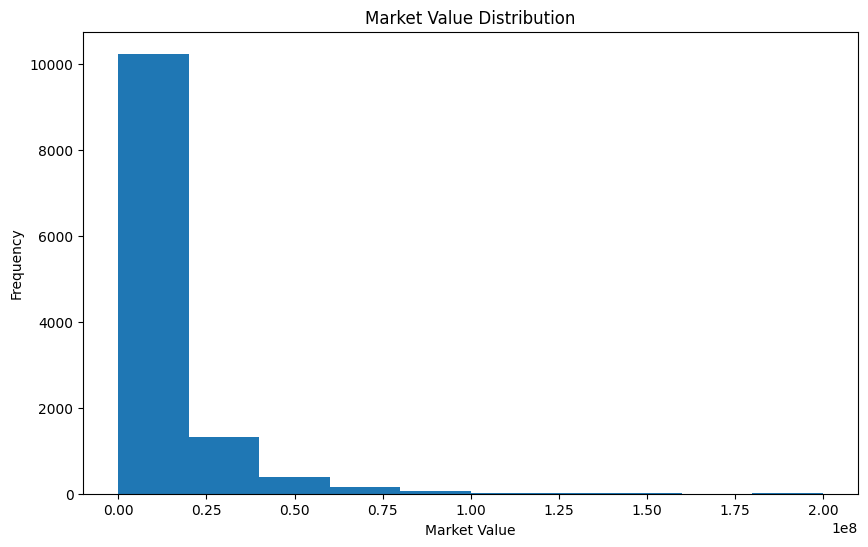

In [283]:
# Plot Numeric columns
stats_model ['player_market_value'].plot(kind='hist', bins=10, figsize=(10, 6) , xlabel = 'Market Value', ylabel = 'Frequency', title = 'Market Value Distribution')


<Axes: title={'center': 'market value by position'}, xlabel='position'>

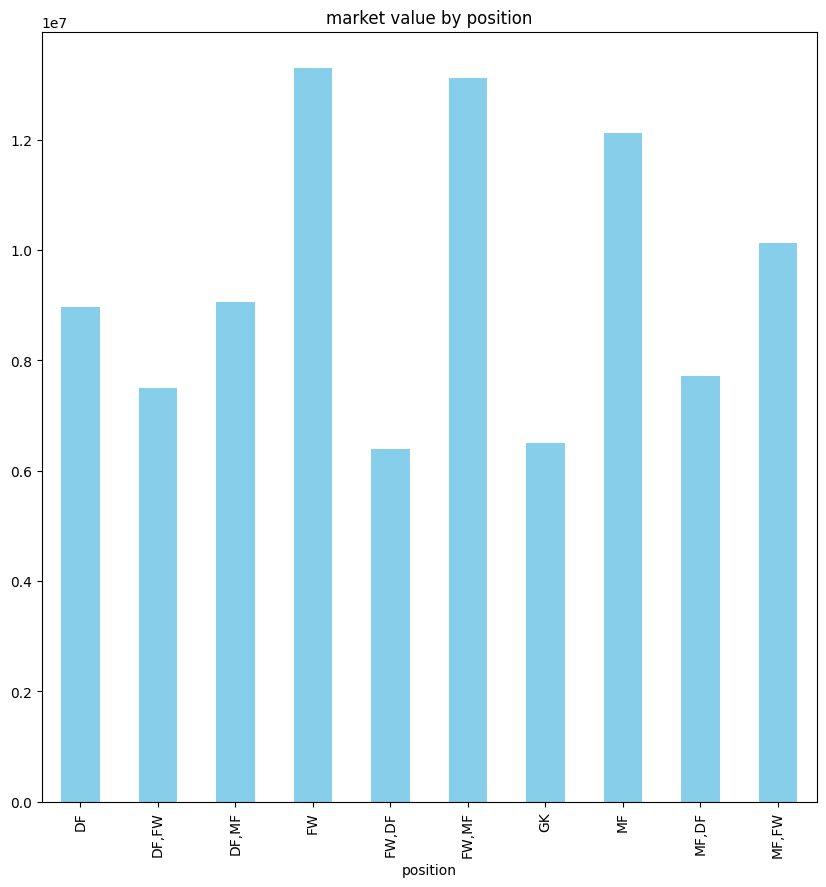

In [284]:
#market_value distribution by position
stats_model.groupby('position')['player_market_value'].mean().plot(kind='bar', color='skyblue', figsize=(10,10), title= 'market value by position')

In [285]:
# Create Age Group
stats_model['age_group'] = pd.cut(
            stats_model['Age'],
            bins=[15, 20, 24, 28, 32, 40],
            labels=[
                'Teen (15-20)',
                'Young Adult (21-24)',
                'Prime (25-28)',
                'Experienced (29-32)',
                'Veteran (33+)'
            ]
)

/tmp/ipython-input-2224568518.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_model.groupby('age_group')['player_market_value'].mean().plot(kind='bar', color='orange', figsize=(10,10), title= 'market value by age group')


<Axes: title={'center': 'market value by age group'}, xlabel='age_group'>

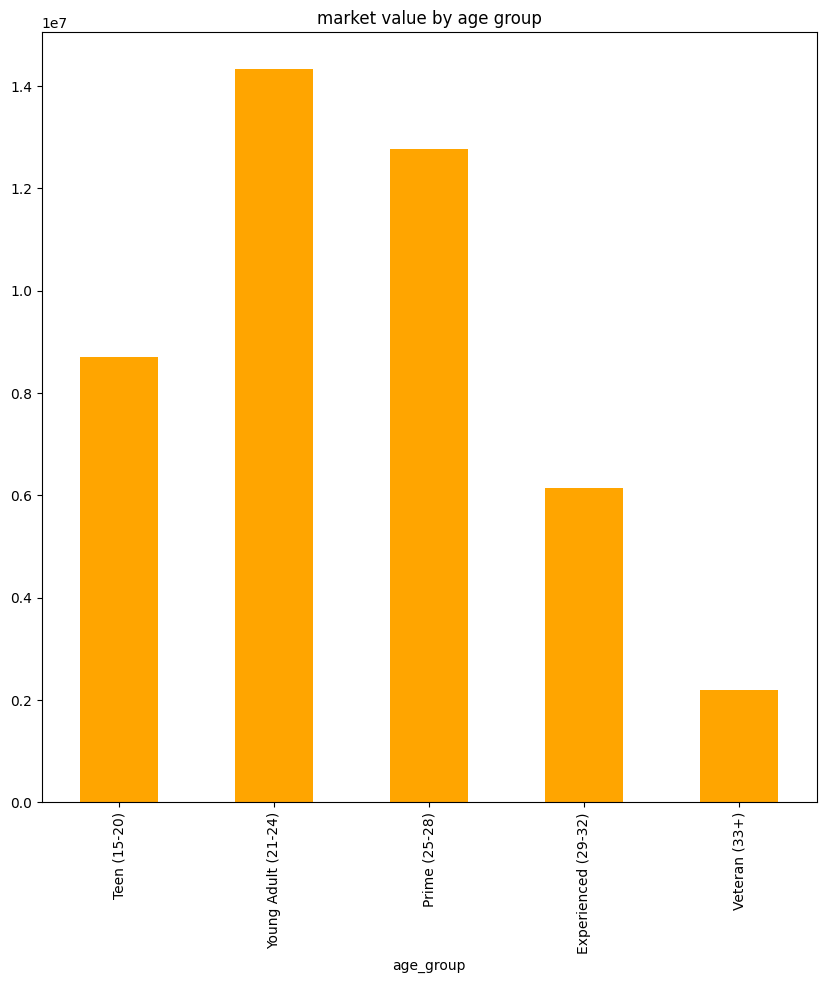

In [286]:
# Market value by Age
stats_model.groupby('age_group')['player_market_value'].mean().plot(kind='bar', color='orange', figsize=(10,10), title= 'market value by age group')

On the charts it can be seen that market value has a right-skewed diagram which indicates that the majority of the players are having low prices on the market.

The other chart shows differences between market value in certain positions. Forwards and FW, MF (whose primary position is forward and the secondary is midfielder) tends to have the highest values. While GK  has the lowest ones.

And finally it can also be said that Young Adults (21-24) has the highest market value on the market, which indicates that making contract with them is expensive.

### Correlation

In [287]:
# Correlation feature-to-feature
num_df_corr= (
    stats_model.select_dtypes(include=["int64", "float64"])
    .replace([np.inf, -np.inf],np.nan)
    .dropna()
)

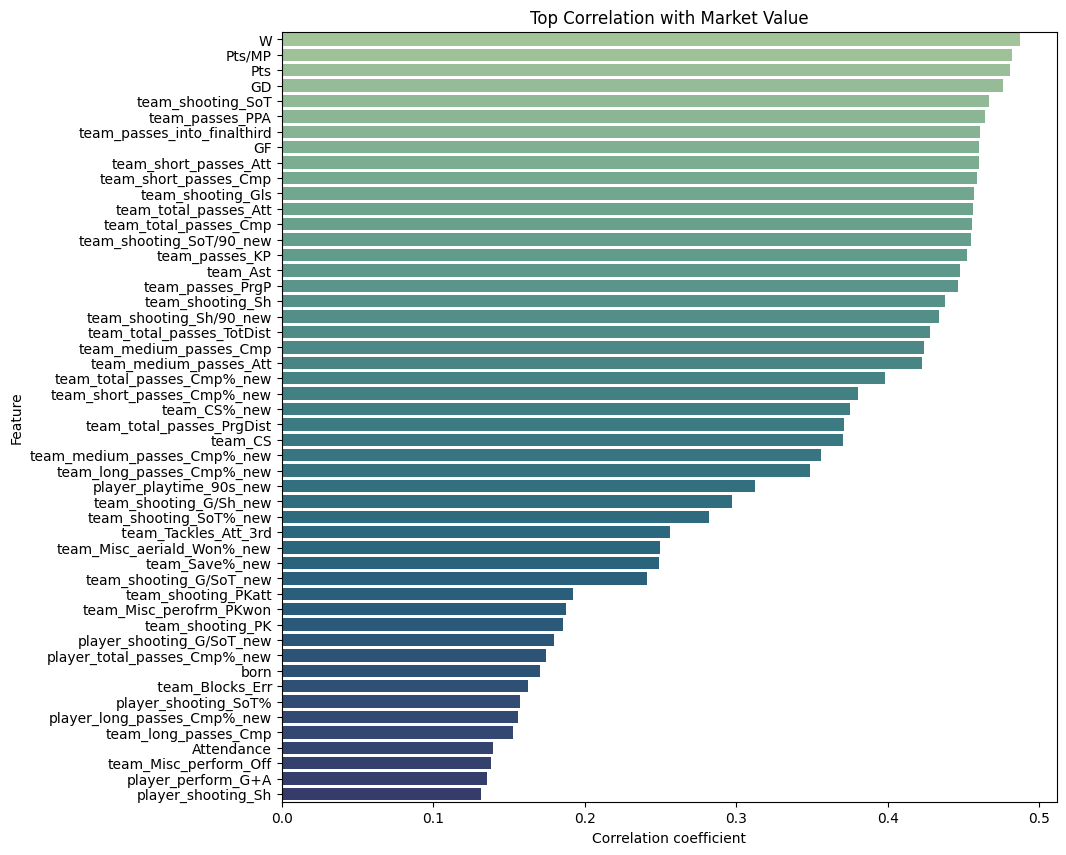

In [321]:
corr_with_target = (num_df_corr.corr(method='pearson')['player_market_value'].drop('player_market_value').sort_values(ascending=False))

top_corr = corr_with_target.head(50).reset_index()
top_corr.columns = ['feature', 'correlation']


plt.figure(figsize=(10, 10))
sns.barplot(
    x='correlation',
    y='feature',
    data=top_corr,
    orient='h',
    palette='crest',
    hue = 'feature'
)

plt.title ("Top Correlation with Market Value")
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.show()

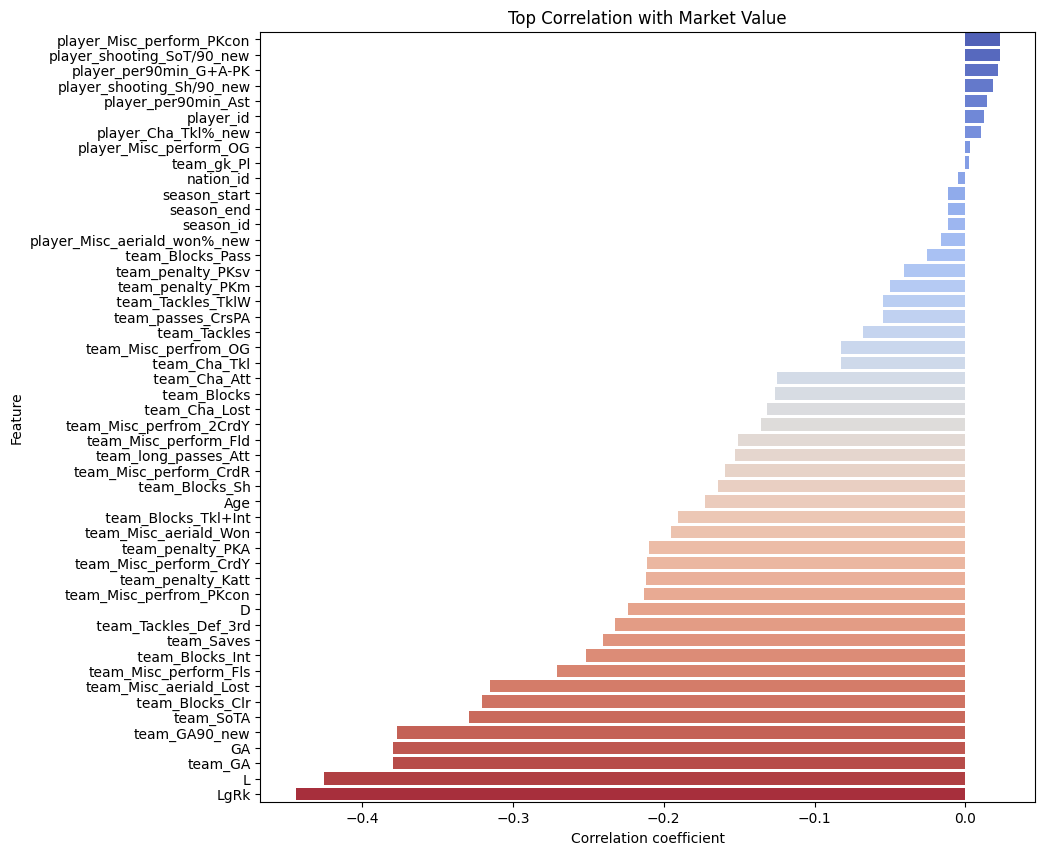

In [322]:
corr_with_target = (num_df_corr.corr(method='pearson')['player_market_value'].drop('player_market_value').sort_values(ascending=False))

top_corr = corr_with_target.tail(50).reset_index()
top_corr.columns = ['feature', 'correlation']


plt.figure(figsize=(10, 10))
sns.barplot(
    x='correlation',
    y='feature',
    data=top_corr,
    orient='h',
    palette='coolwarm',
    hue = 'feature'
)

plt.title ("Top Correlation with Market Value")
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.show()

The charts above indicates that team-level statistics provide stronger correlations with player market value than many individual performance metrics both on positive and in negative way.

In [290]:
# Select the top N feature

N= 20

top_n_feature = (
    corr_with_target
    .abs()
    .sort_values(ascending = False)
    .head(N)
    .index
)

In [291]:
#Feature-Feature correlation
corr_top_n = num_df_corr[top_n_feature].corr(method='pearson')

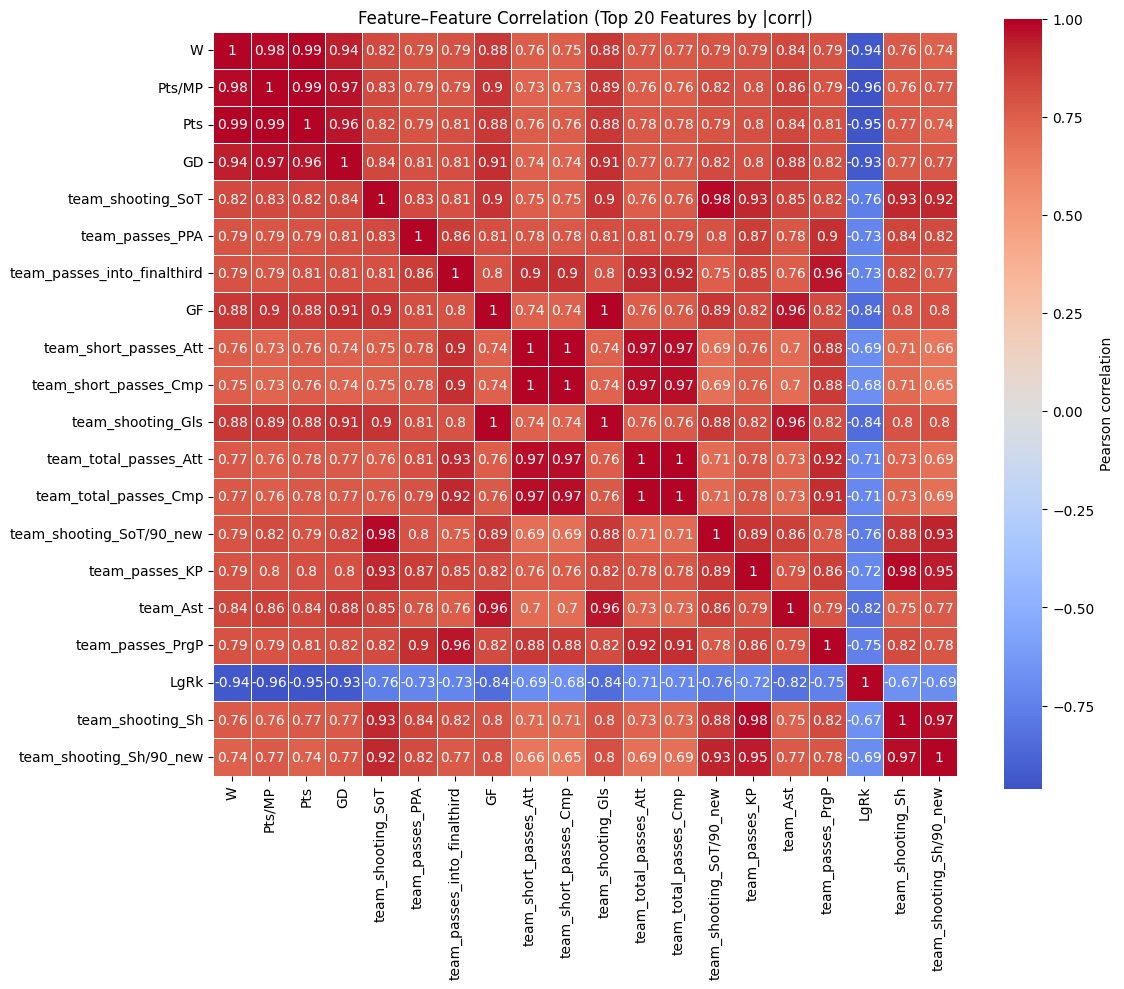

In [292]:
#feature-feature correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_top_n,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    annot= True,
    cbar_kws={"label": "Pearson correlation"}
)
plt.title(f"Feature–Feature Correlation (Top {N} Features by |corr|)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [293]:
#See which player stats correlate with market value the most

player_cols = [
    col for col in stats_model.columns
    if col.startswith('player_')
]

player_target = stats_model[player_cols]

In [294]:
# See which player target columns to include
player_target_corr = (
    player_target
    .select_dtypes(include=["int64", "float64"])
    .replace([np.inf, -np.inf],np.nan)
    .dropna()
)

In [295]:
player_corr = (
    player_target_corr
    .corr(method='pearson')["player_market_value"]
    .drop("player_market_value")
)


In [296]:
# Select top player stats

top_player_stats = (
    player_corr
    .abs()
    .sort_values(ascending = False)
)

In [318]:
# select top 20
top_p_positive = player_corr.sort_values(ascending=False).head(20)
top_n_negative = player_corr.sort_values().head(20)

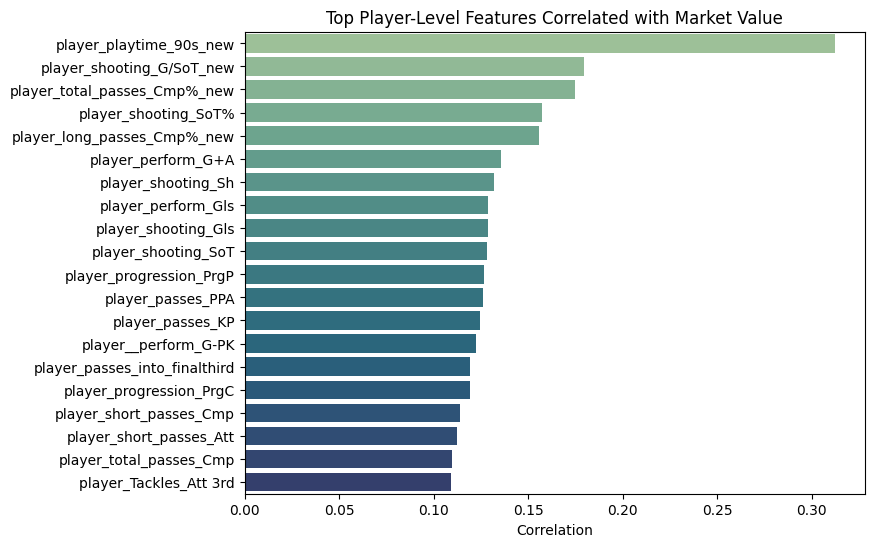

In [319]:
top20 = top_p_positive.head(20).reset_index()
top20.columns = ["feature", "correlation"]

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top20,
    x='correlation',
    y='feature',
    palette='crest',
    hue ='feature'
)
plt.title("Top Player-Level Features Correlated with Market Value")
plt.xlabel("Correlation")
plt.ylabel("")
plt.show()

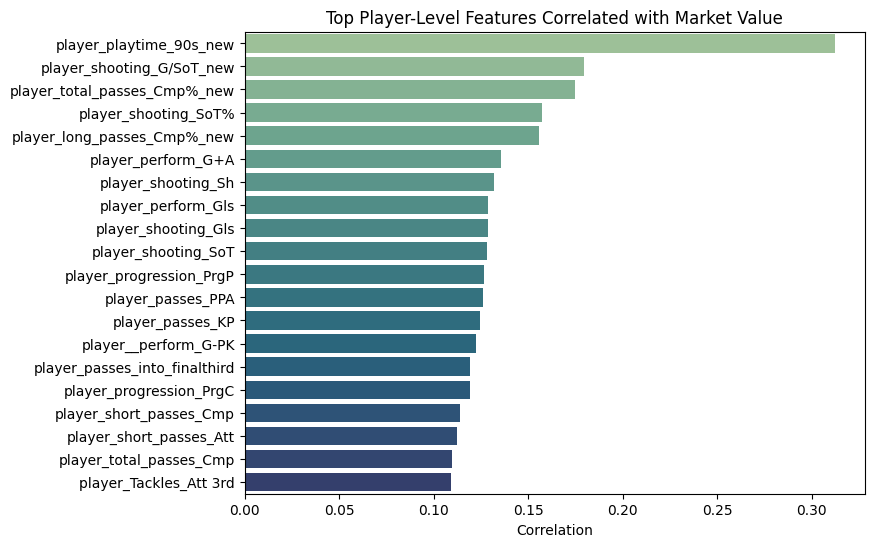

In [320]:
# Top 20 negative

top20n = top_n_negative.tail(20).reset_index()
top20n.columns = ["feature", "correlation"]

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top20,
    x='correlation',
    y='feature',
    palette='crest',
    hue ='feature'
)
plt.title("Top Player-Level Features Correlated with Market Value")
plt.xlabel("Correlation")
plt.ylabel("")
plt.show()

The feature-feature correlation matrix revelas strong clusters among team-level passig, shooting, and success related variables, indicating multicollinearity.

Although correlated features were grouped into conceptual clusters, these variables remain redundant from a modeling perspective, as they represent multiple measurements of the same underlying team performance constructs.

## Machine Learning models

## Linear Regression

A Linear Regression Modell will be implemented, therefore 9 positive and 9 negative features are selected. Positive features, positively influence market value while negative features negatively influence it.

In [298]:
# Show the column names and the NaN values in columns
all_nan = stats_model.isna().sum()
print("Number of NaN values in each column:")
print(all_nan)


Number of NaN values in each column:
player_id               0
player_name             0
position                0
nation_id               0
born                    0
                       ..
league_name             0
league_country          0
player_market_value     0
Age                     0
age_group              16
Length: 182, dtype: int64


In [368]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [385]:
#define feature

target = 'player_market_value'

numeric_features = [
    'Age',
    'LgRk',
    'player_playtime_90s_new',
    'player_perform_G+A',
    'player_total_passes_Cmp',
    'player_Tackles_Def 3rd',
    'player_Blocks_Int',
    'player_Misc_perform_2CrdY',
    'GD',
    'team_shooting_Sh',
    'team_passes_PPA',
    'team_Misc_perform_CrdY',
    'team_Saves',
    'team_Misc_perform_Off'



]


categorical_features = [
    'position',
    'league_name',
    'nation_name'
]

# Defone target variable
X= stats_model[numeric_features + categorical_features]
y = stats_model[target]

In [386]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [387]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [388]:
# MLR Pipeline
mlr_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

In [389]:
# Training
mlr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'LgRk',
                                                   'player_playtime_90s_new',
                                                   'player_perform_G+A',
                                                   'player_total_passes_Cmp',
                                                   'player_Tackles_Def 3rd',
                                                   'player_Blocks_Int',
                                                   'player_Misc_perform_2CrdY',
                                                   'GD', 'team_shooting_Sh',
                                                   'team_passes_PPA',
                                                   'team_Misc_perform_CrdY',
                                                   'team_Saves',
                                                   'team_Misc_perform_Off']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position', 'league_name',
                                                   'nation_name'])])),
                ('model', LinearRegression())])

In [390]:
# Model Performance
y_pred= mlr_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:",mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 173422051090047.8
RMSE: 13168980.639747627
MAE: 8068069.293553512
R²: 0.3716344220157861


In [391]:
# Overfitting check

#train prediction
y_train_pred = mlr_pipeline.predict(X_train)

# Test prediction
y_test_pred = mlr_pipeline.predict(X_test)

# R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# RMSE
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

print("TRAIN R²:", r2_train)
print("TEST  R²:", r2_test)
print("TRAIN RMSE:", rmse_train)
print("TEST  RMSE:", rmse_test)

TRAIN R²: 0.36008122265416465
TEST  R²: 0.3716344220157861
TRAIN RMSE: 12668487.512847085
TEST  RMSE: 13168980.639747627


In [392]:
#Cross Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(mlr_pipeline, X, y, cv=5, scoring="r2")


print("CV R² values:", cv_scores)
print("CV mean R²:", cv_scores.mean())
print("CV std R²:", cv_scores.std())

CV R² values: [0.37863085 0.35751468 0.34197182 0.37296456 0.35285533]
CV mean R²: 0.36078745086074937
CV std R²: 0.013374054247241491
